In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

warnings.filterwarnings(action='ignore')

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 한글 설정
from matplotlib import rc

rc('font', family='Arial Unicode Ms')

pd.set_option('display.max_columns', None)

In [2]:
car_t = pd.read_csv('./train_data_r.csv')
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환 # 직접 채우지 않은 파일

In [3]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             6019 non-null   object 
 10  Power              6019 non-null   object 
 11  Seats              6019 non-null   int64  
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 658.5+ KB


In [4]:
car_tr.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
car_t.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [6]:
car_t['New_Price'] = car_t['New_Price'].fillna('0 Lakh')

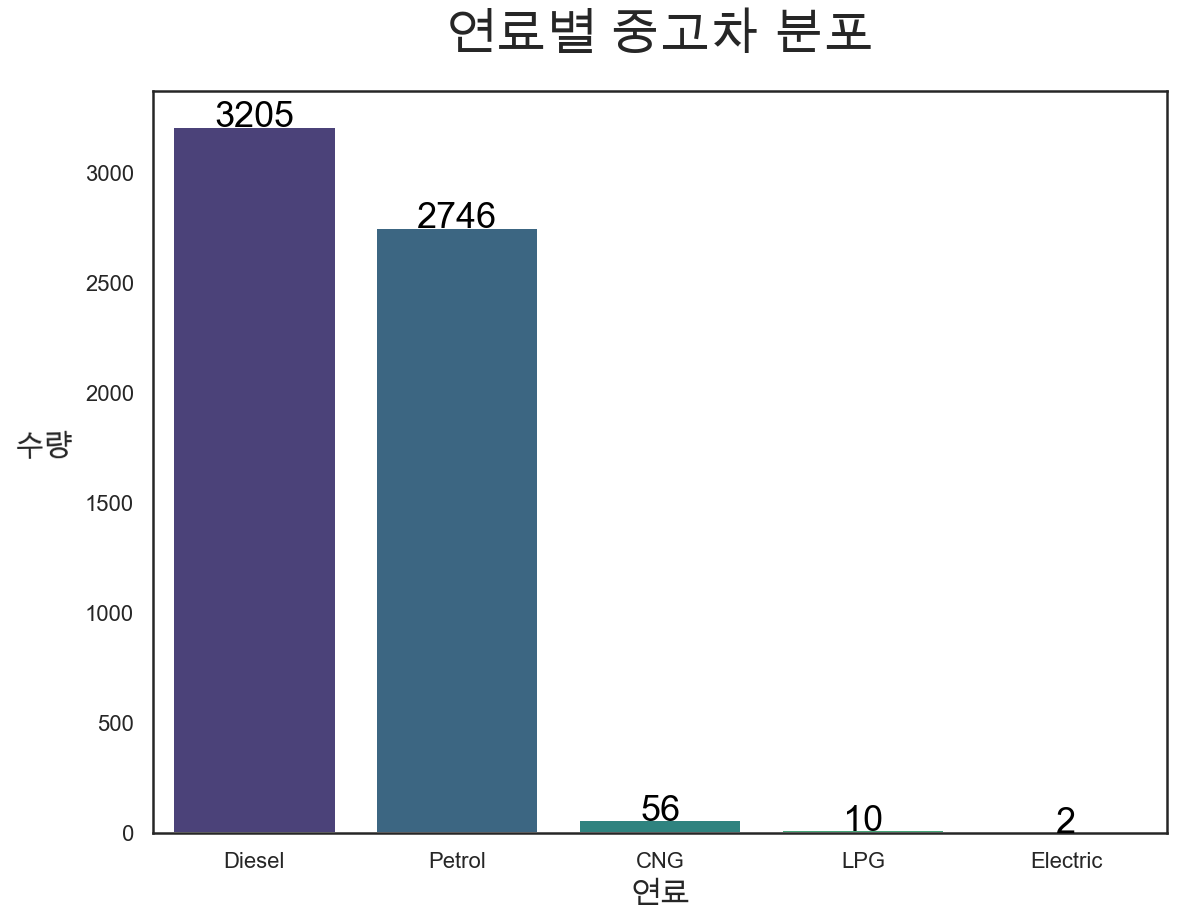

In [7]:
# 연료 분포 그래프
plt.figure(figsize=(20,15))
plt.subplot(221)

g = sns.barplot(data=pd.DataFrame(car_t['Fuel_Type'].value_counts()).T, palette='viridis', ci=False)

plt.title('연료별 중고차 분포', fontsize=25, y=1.04)
plt.xlabel('연료', fontsize=15)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=20)

for i in range(0,5):
    g.text(i,car_t['Fuel_Type'].value_counts()[i], car_t['Fuel_Type'].value_counts()[i], 
    color= 'black', ha='center', fontsize=18)

plt.show()

In [8]:
# Mileage null값 확인
car_t[car_t['Mileage'].isnull()]

Unnamed: 0                       Name Location  Year  Kilometers_Driven  \
4446        4446       Mahindra E Verito D4  Chennai  2016              50000   
4904        4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type Mileage   Engine   Power  Seats  \
4446  Electric    Automatic      First     NaN    72 CC  41 bhp      5   
4904  Electric    Automatic      First     NaN  1798 CC  73 bhp      5   

       New_Price  Price  
4446  13.58 Lakh  13.00  
4904      0 Lakh  12.75

In [9]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])
car_t.reset_index(drop=True, inplace=True)

In [10]:
# 필요없는 컬럼 제거
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
car_t.head(1)

Name Location  Year  Kilometers_Driven Fuel_Type  \
0  Maruti Wagon R LXI CNG   Mumbai  2010              72000       CNG   

  Transmission Owner_Type     Mileage  Engine      Power  Seats New_Price  \
0       Manual      First  26.6 km/kg  998 CC  58.16 bhp      5    0 Lakh   

   Price  
0   1.75

In [12]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [13]:
get_split(car_t, 'Name', 'Brand')
get_split2(car_t, 'Name', 'Car_name')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')
get_split(car_t, 'New_Price', 'New_p')

Brand
Car_name
Mile
Eng
Pow
New_p


In [14]:
car_t.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Brand                0
Car_name             0
Mile                 0
Eng                  0
Pow                  0
New_p                0
dtype: int64

In [15]:
# 형변환
car_t[['Mile', 'Eng', 'Pow', 'New_p']] = car_t[['Mile', 'Eng', 'Pow', 'New_p']].astype(float)

In [16]:
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             6017 non-null   object 
 9   Power              6017 non-null   object 
 10  Seats              6017 non-null   int64  
 11  New_Price          6017 non-null   object 
 12  Price              6017 non-null   float64
 13  Brand              6017 non-null   object 
 14  Car_name           6017 non-null   object 
 15  Mile               6017 non-null   float64
 16  Eng                6017 

In [17]:
car_t['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Smart               1
Isuzu               1
Lamborghini         1
Bentley             1
Name: Brand, dtype: int64

In [18]:
car_t['Brand'][car_t['Brand'] == 'ISUZU'] = 'Isuzu'

In [19]:
car_t['Brand'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
Isuzu               3
Smart               1
Bentley             1
Lamborghini         1
Ambassador          1
Name: Brand, dtype: int64

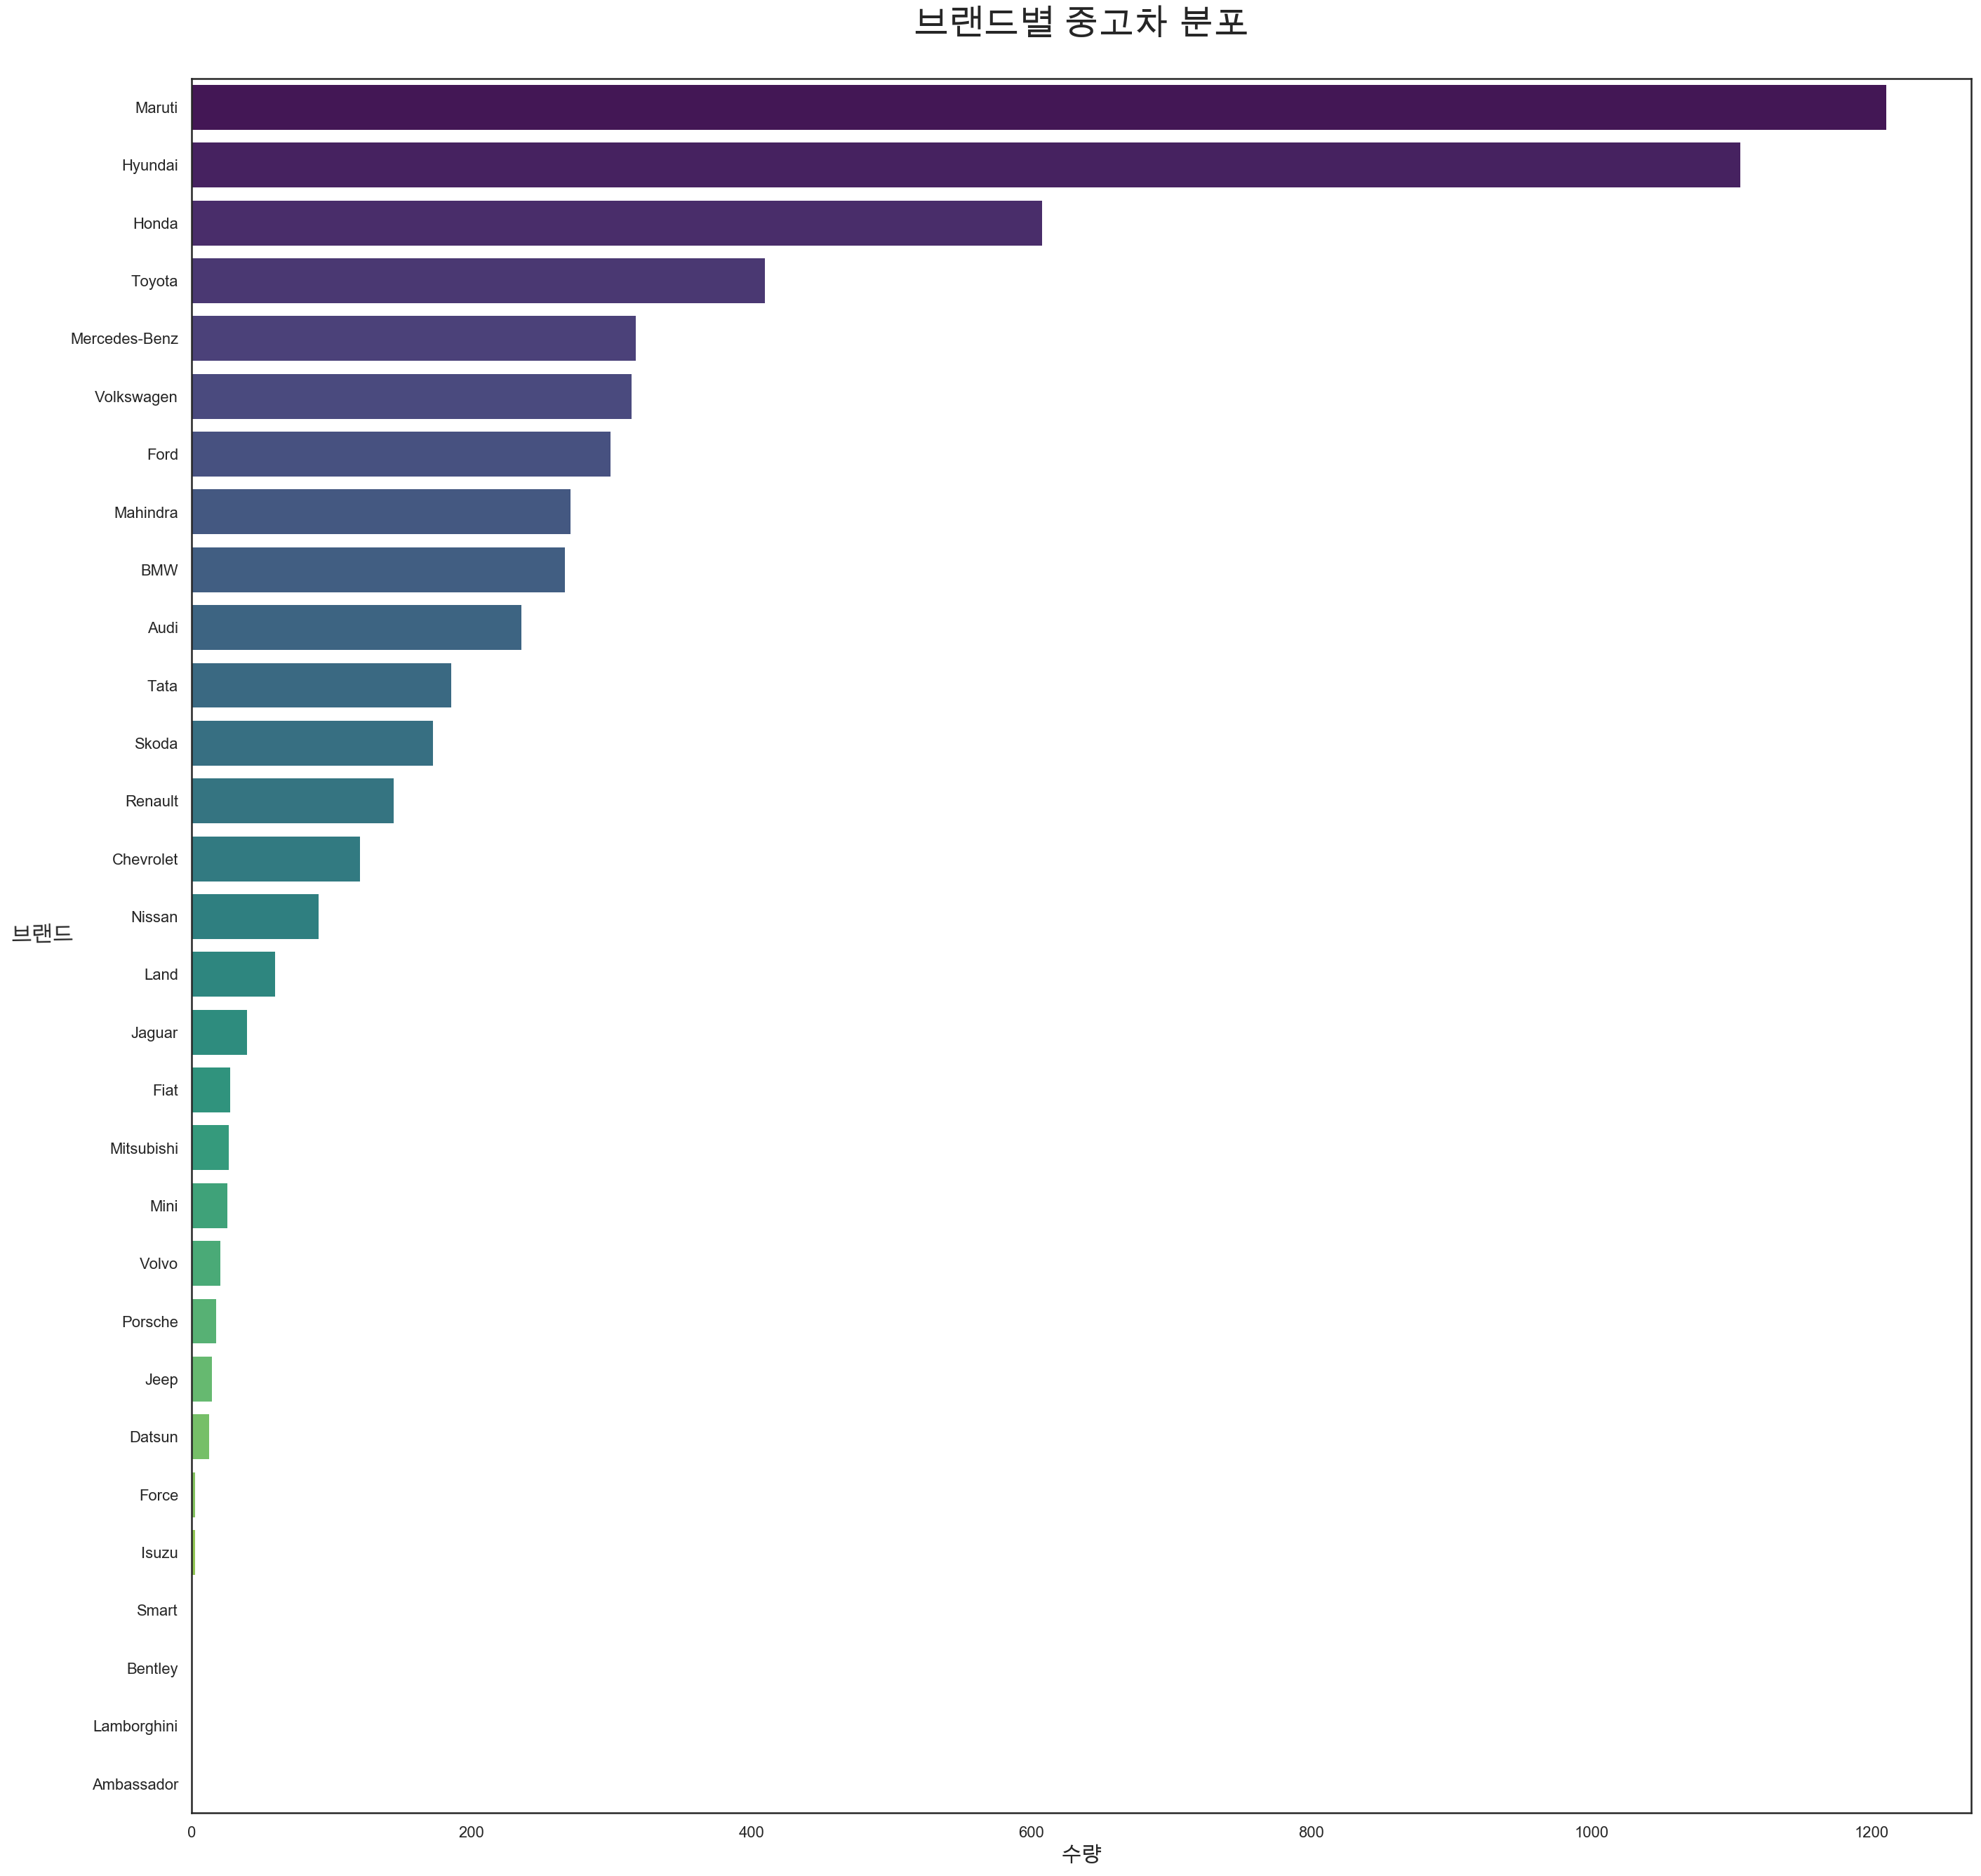

In [20]:
plt.figure(figsize=(50,50))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Brand'].value_counts()).T, palette='viridis', ci=False, orient='h')

plt.title('브랜드별 중고차 분포', fontsize=25, y=1.02)
plt.xlabel('수량', fontsize=15)
plt.ylabel('브랜드', fontsize=15, rotation=1, labelpad=20) 

plt.show()

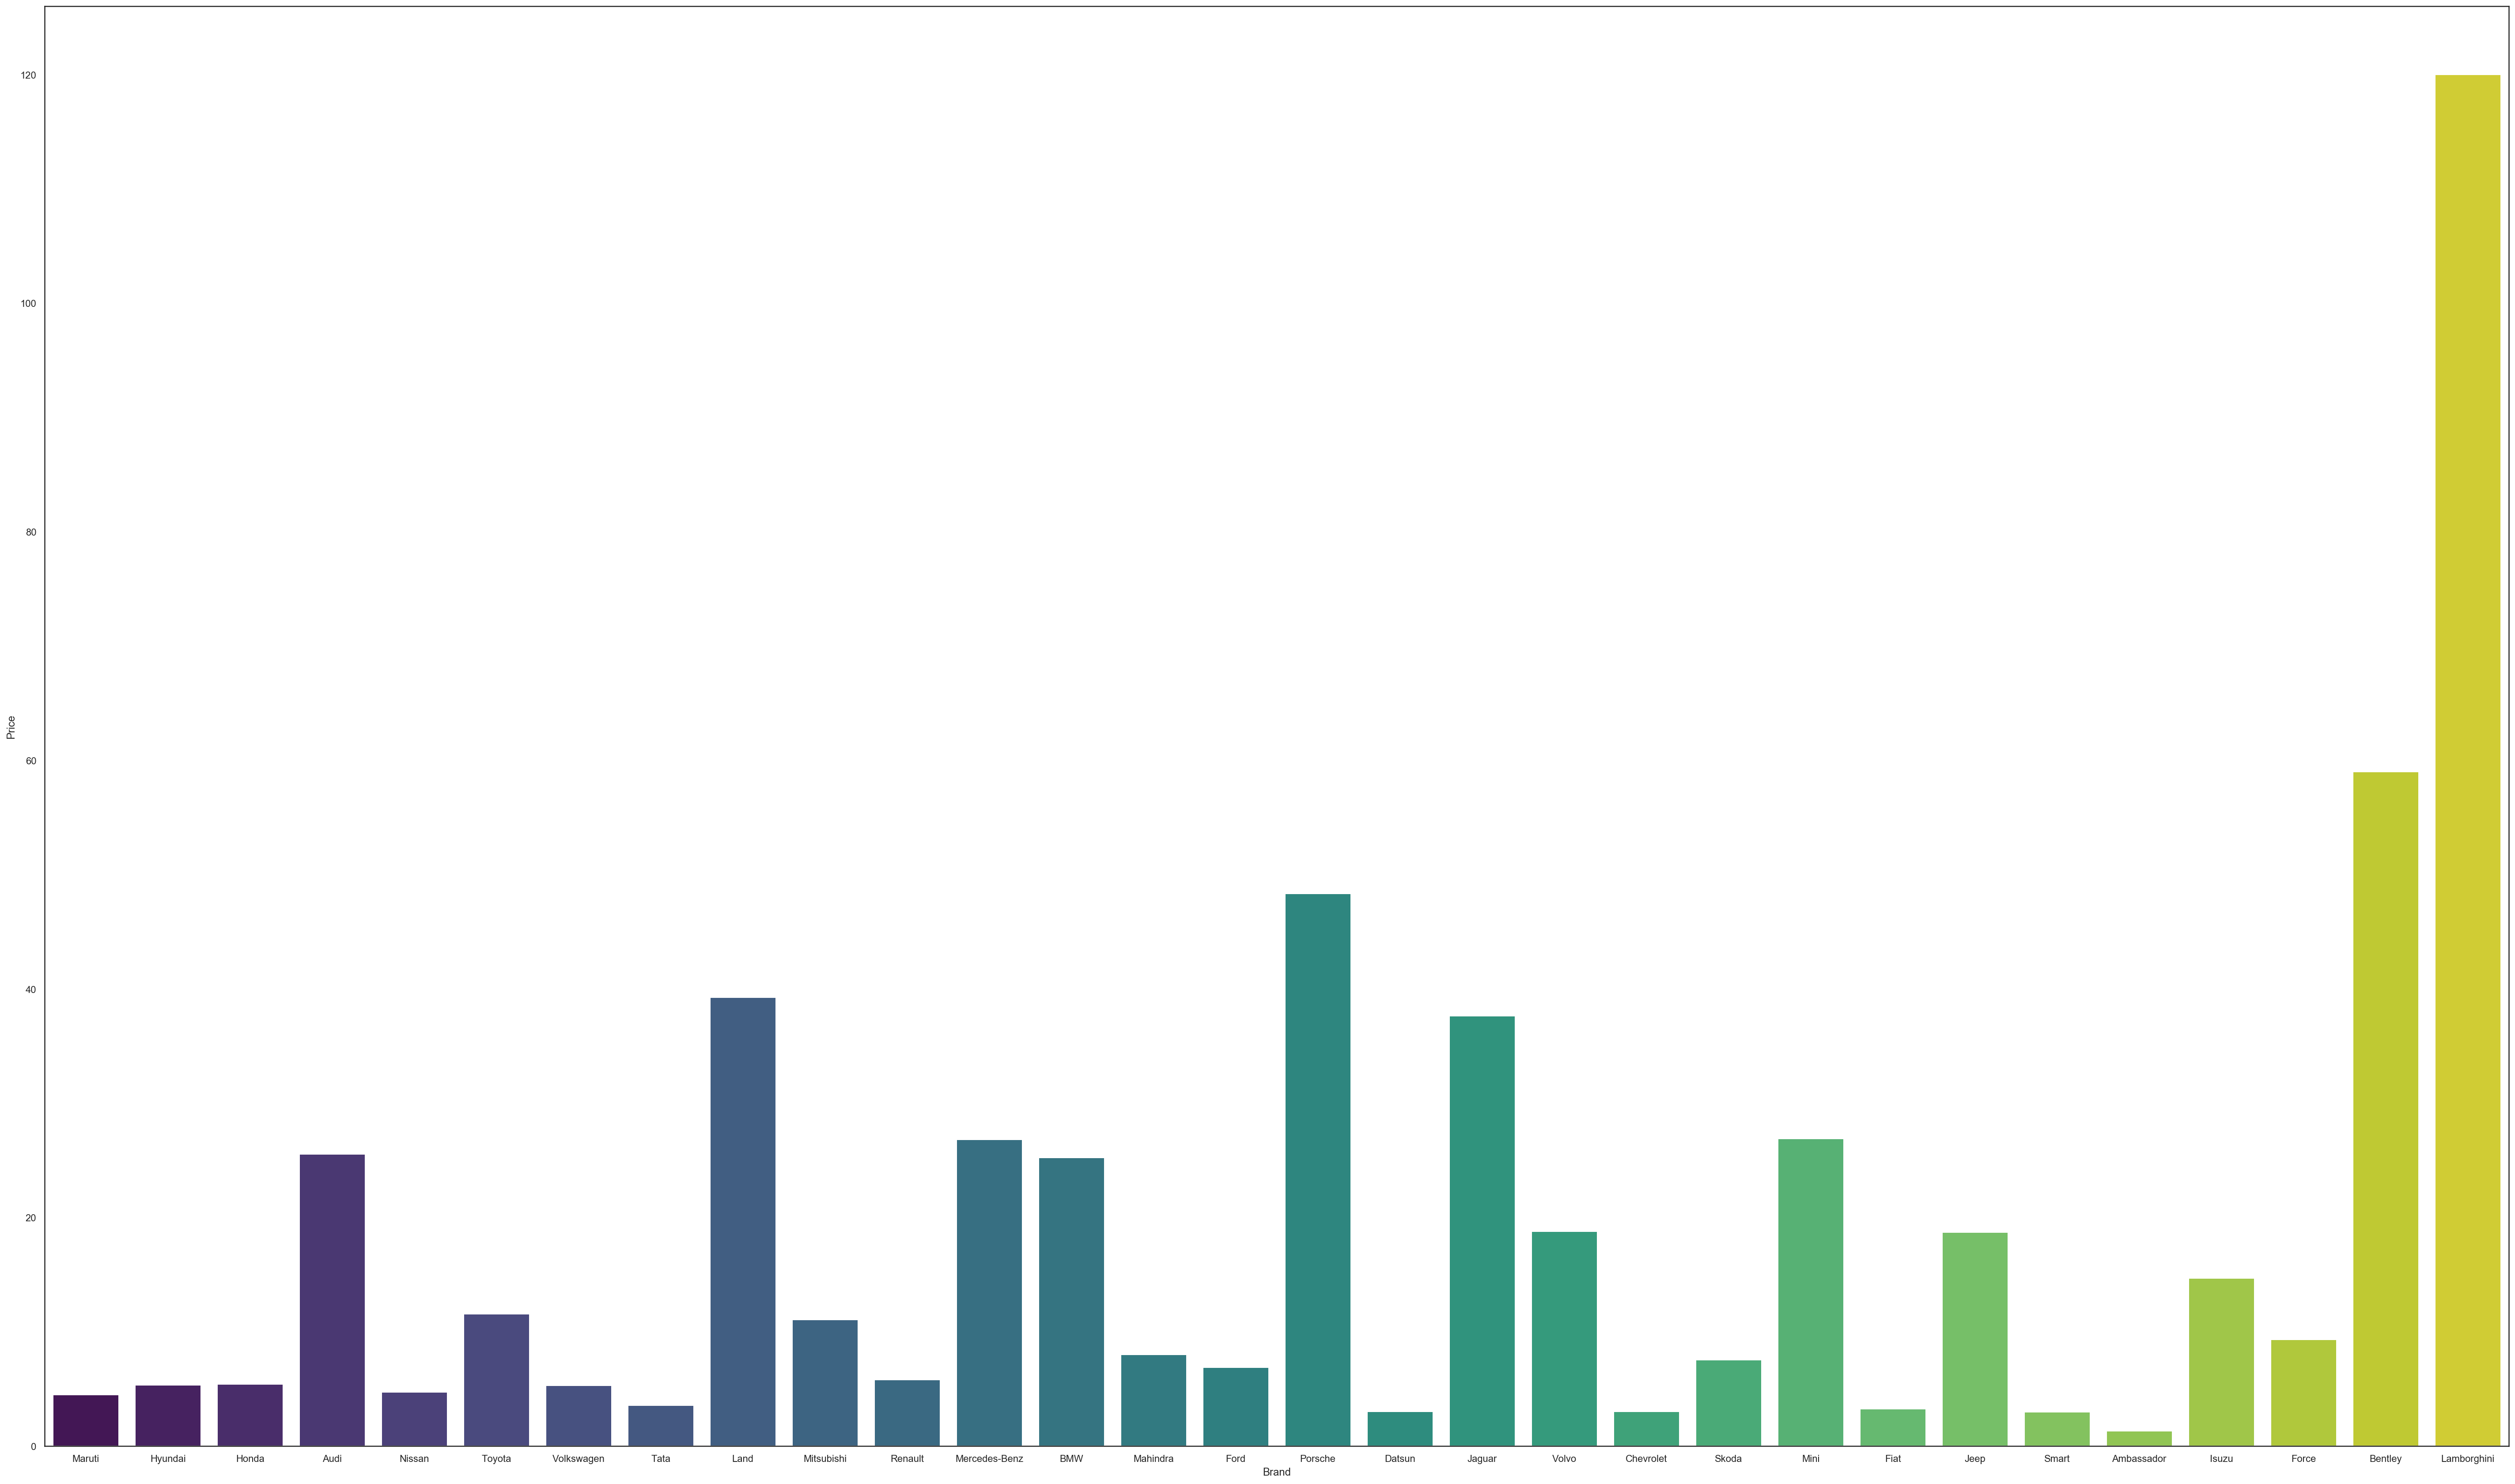

In [21]:
plt.figure(figsize=(50,30))
sns.barplot(
    data= car_t,
    x= "Brand",
    y= "Price",
    palette='viridis', ci=False
)
plt.show()

In [22]:
car_t['Year'].value_counts()

2014    797
2015    744
2016    740
2013    649
2017    587
2012    580
2011    465
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

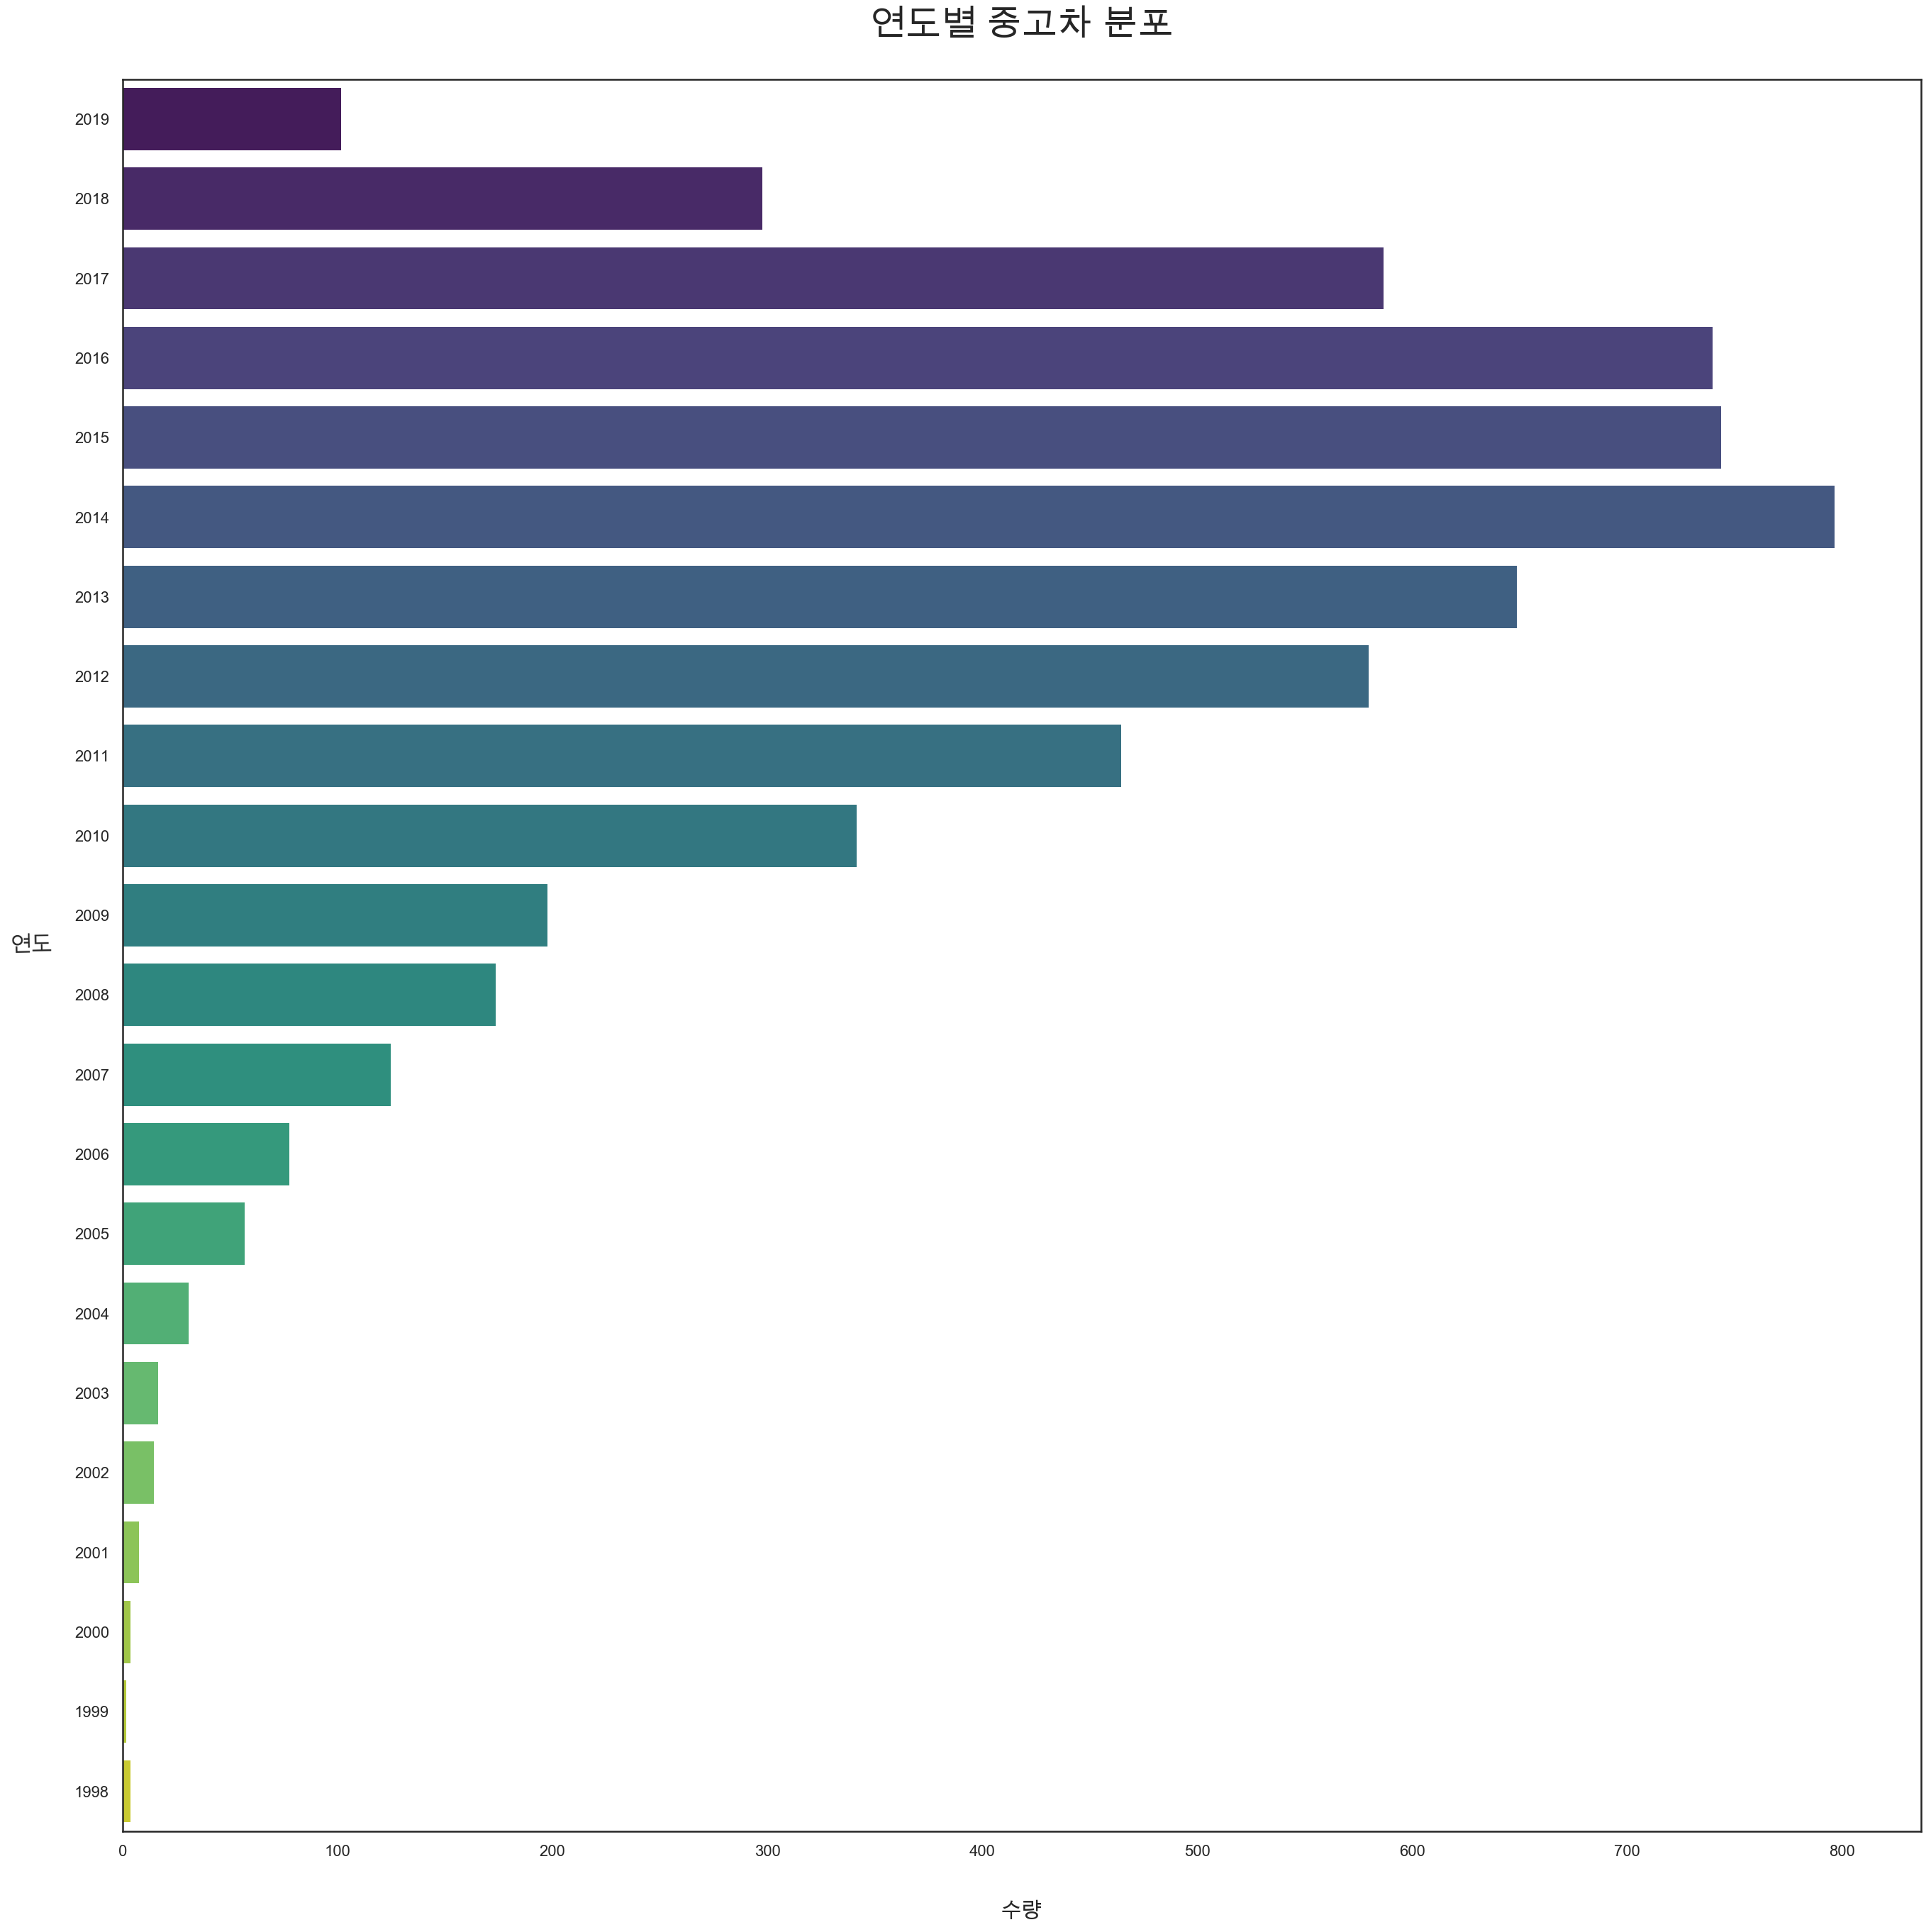

In [23]:
# 연도별 분포 그래프
plt.figure(figsize=(50,50))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Year'].value_counts()).sort_index(ascending=False).T, palette='viridis', ci=False, orient='h')

plt.title('연도별 중고차 분포', fontsize=25, y=1.02)
plt.xlabel('수량', fontsize=15, labelpad=30)
plt.ylabel('연도', fontsize=15, rotation=1, labelpad=30) 

plt.show()

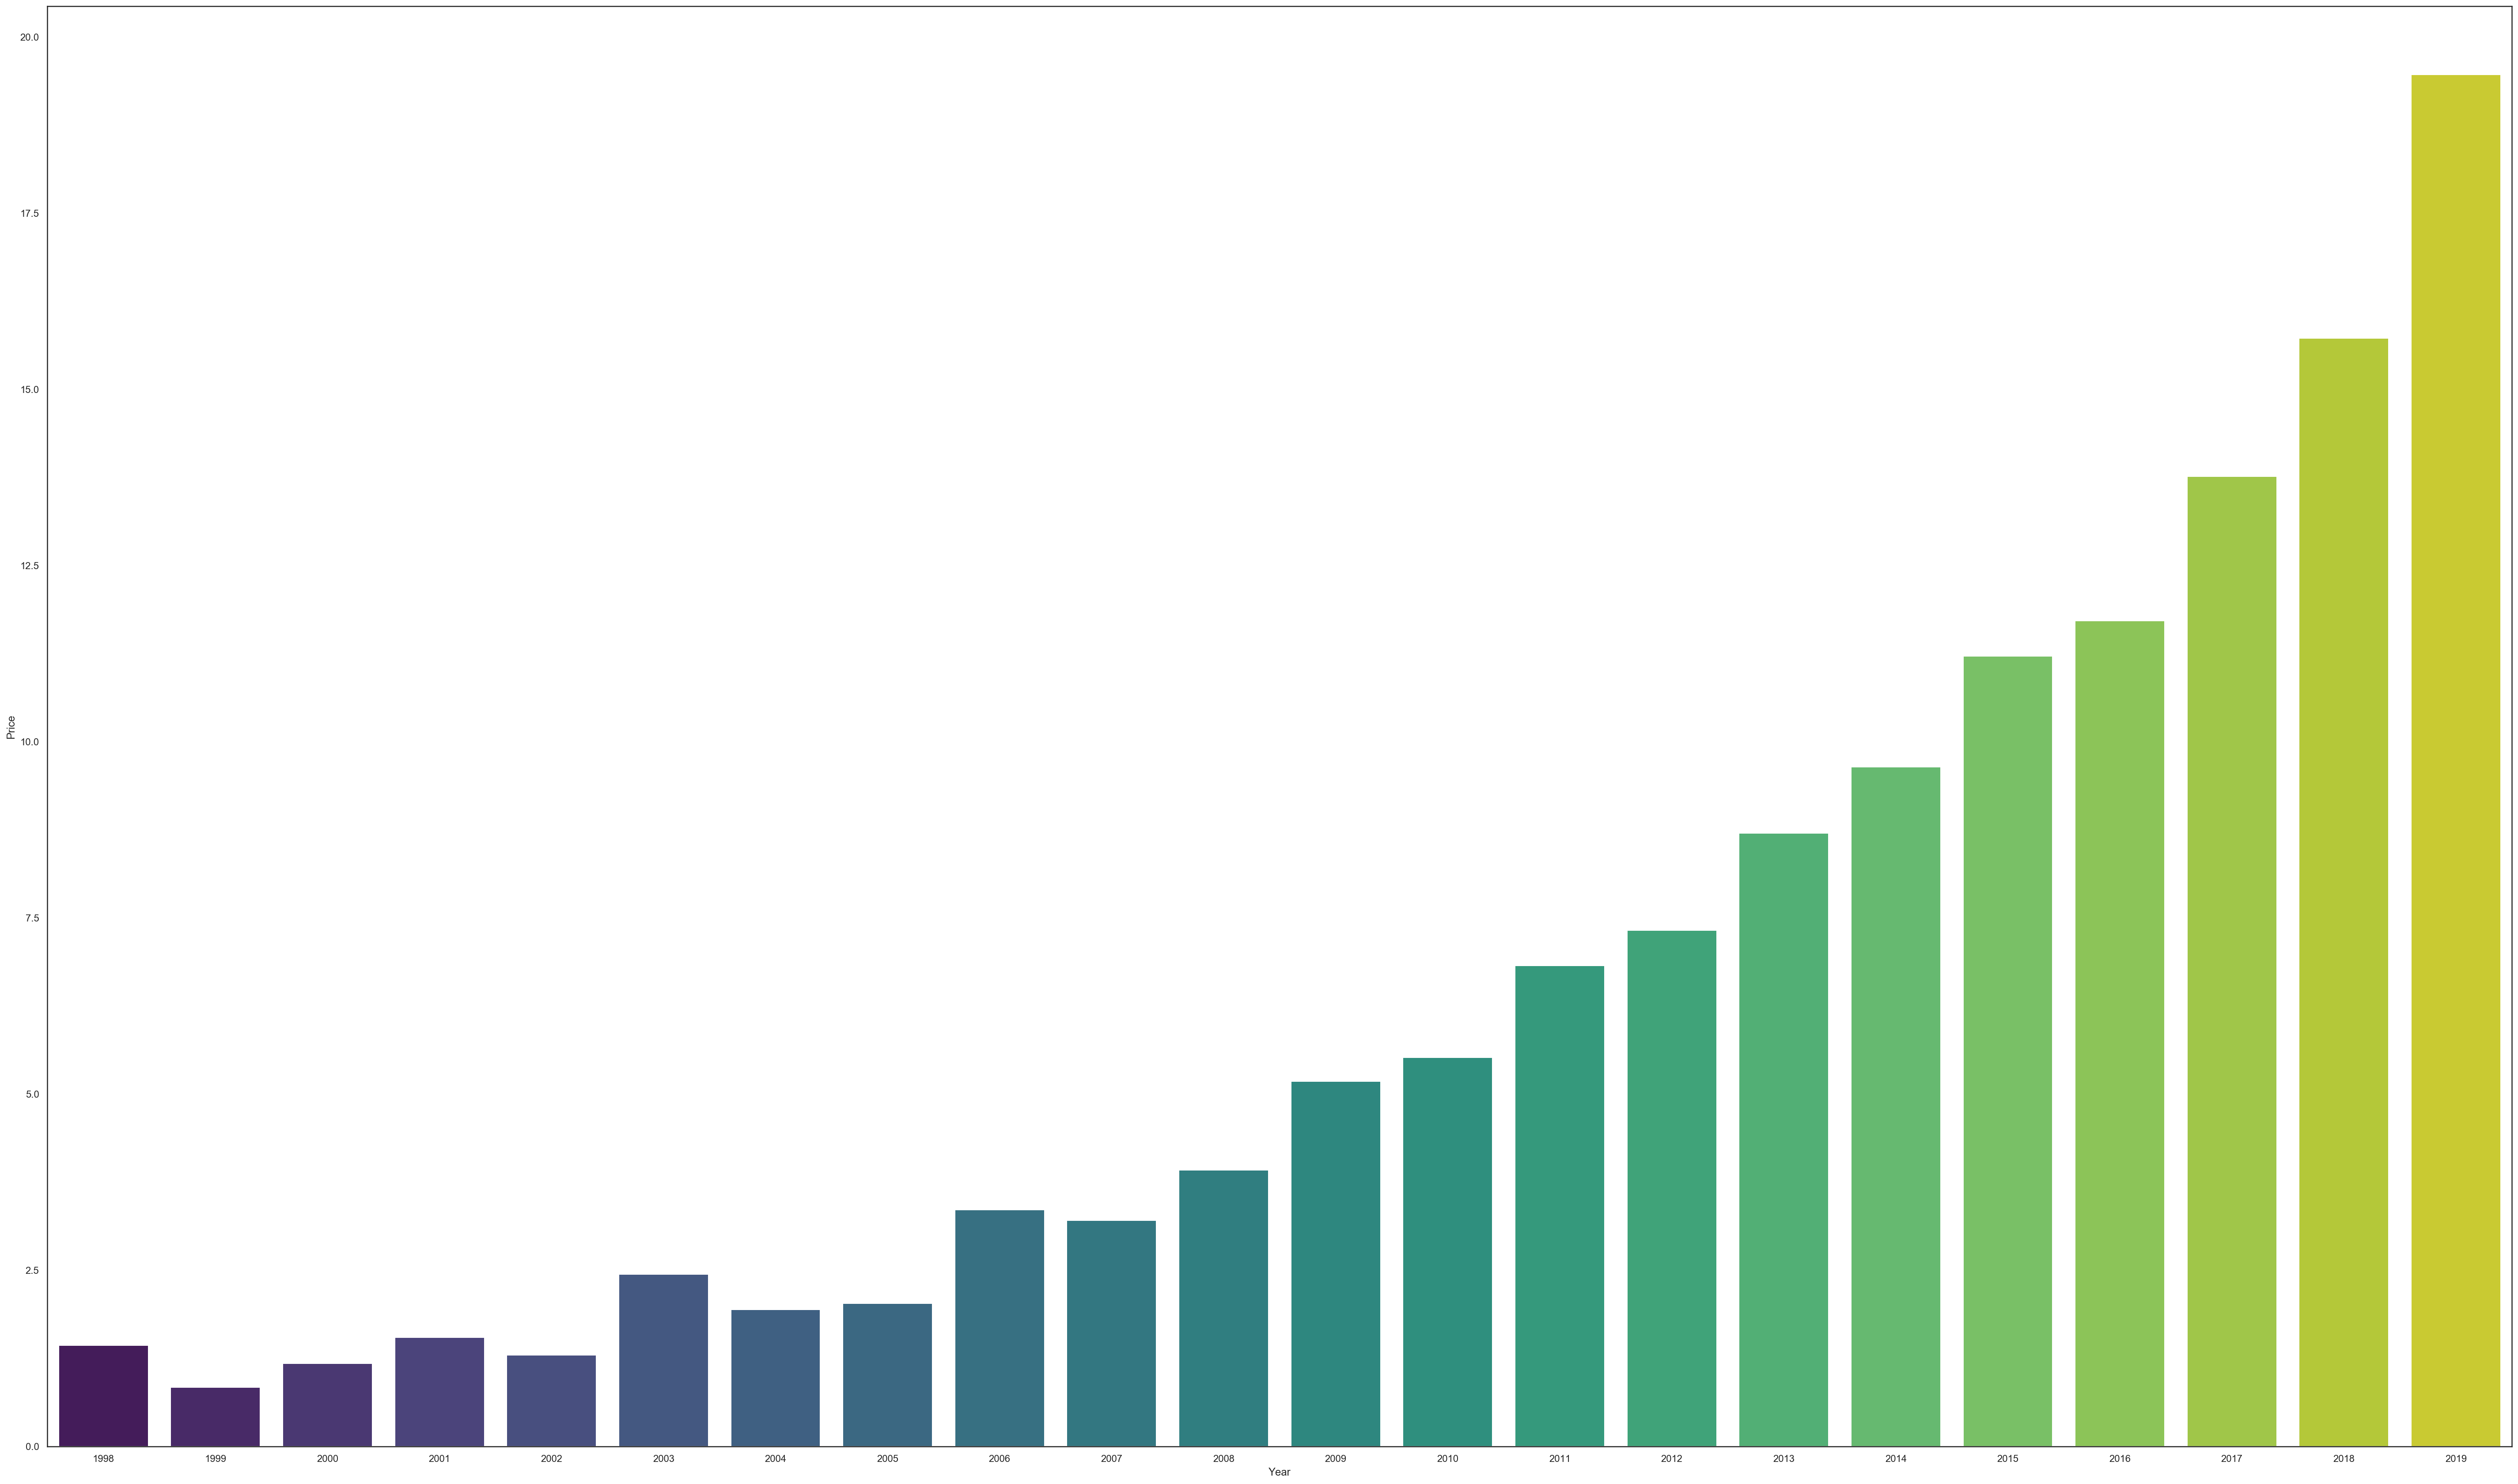

In [24]:
plt.figure(figsize=(50,30))
sns.barplot(
    data= car_t,
    x= "Year",
    y= "Price",
    palette='viridis', ci=False
)
plt.show()

In [25]:
car_t['Location'].value_counts()

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       493
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

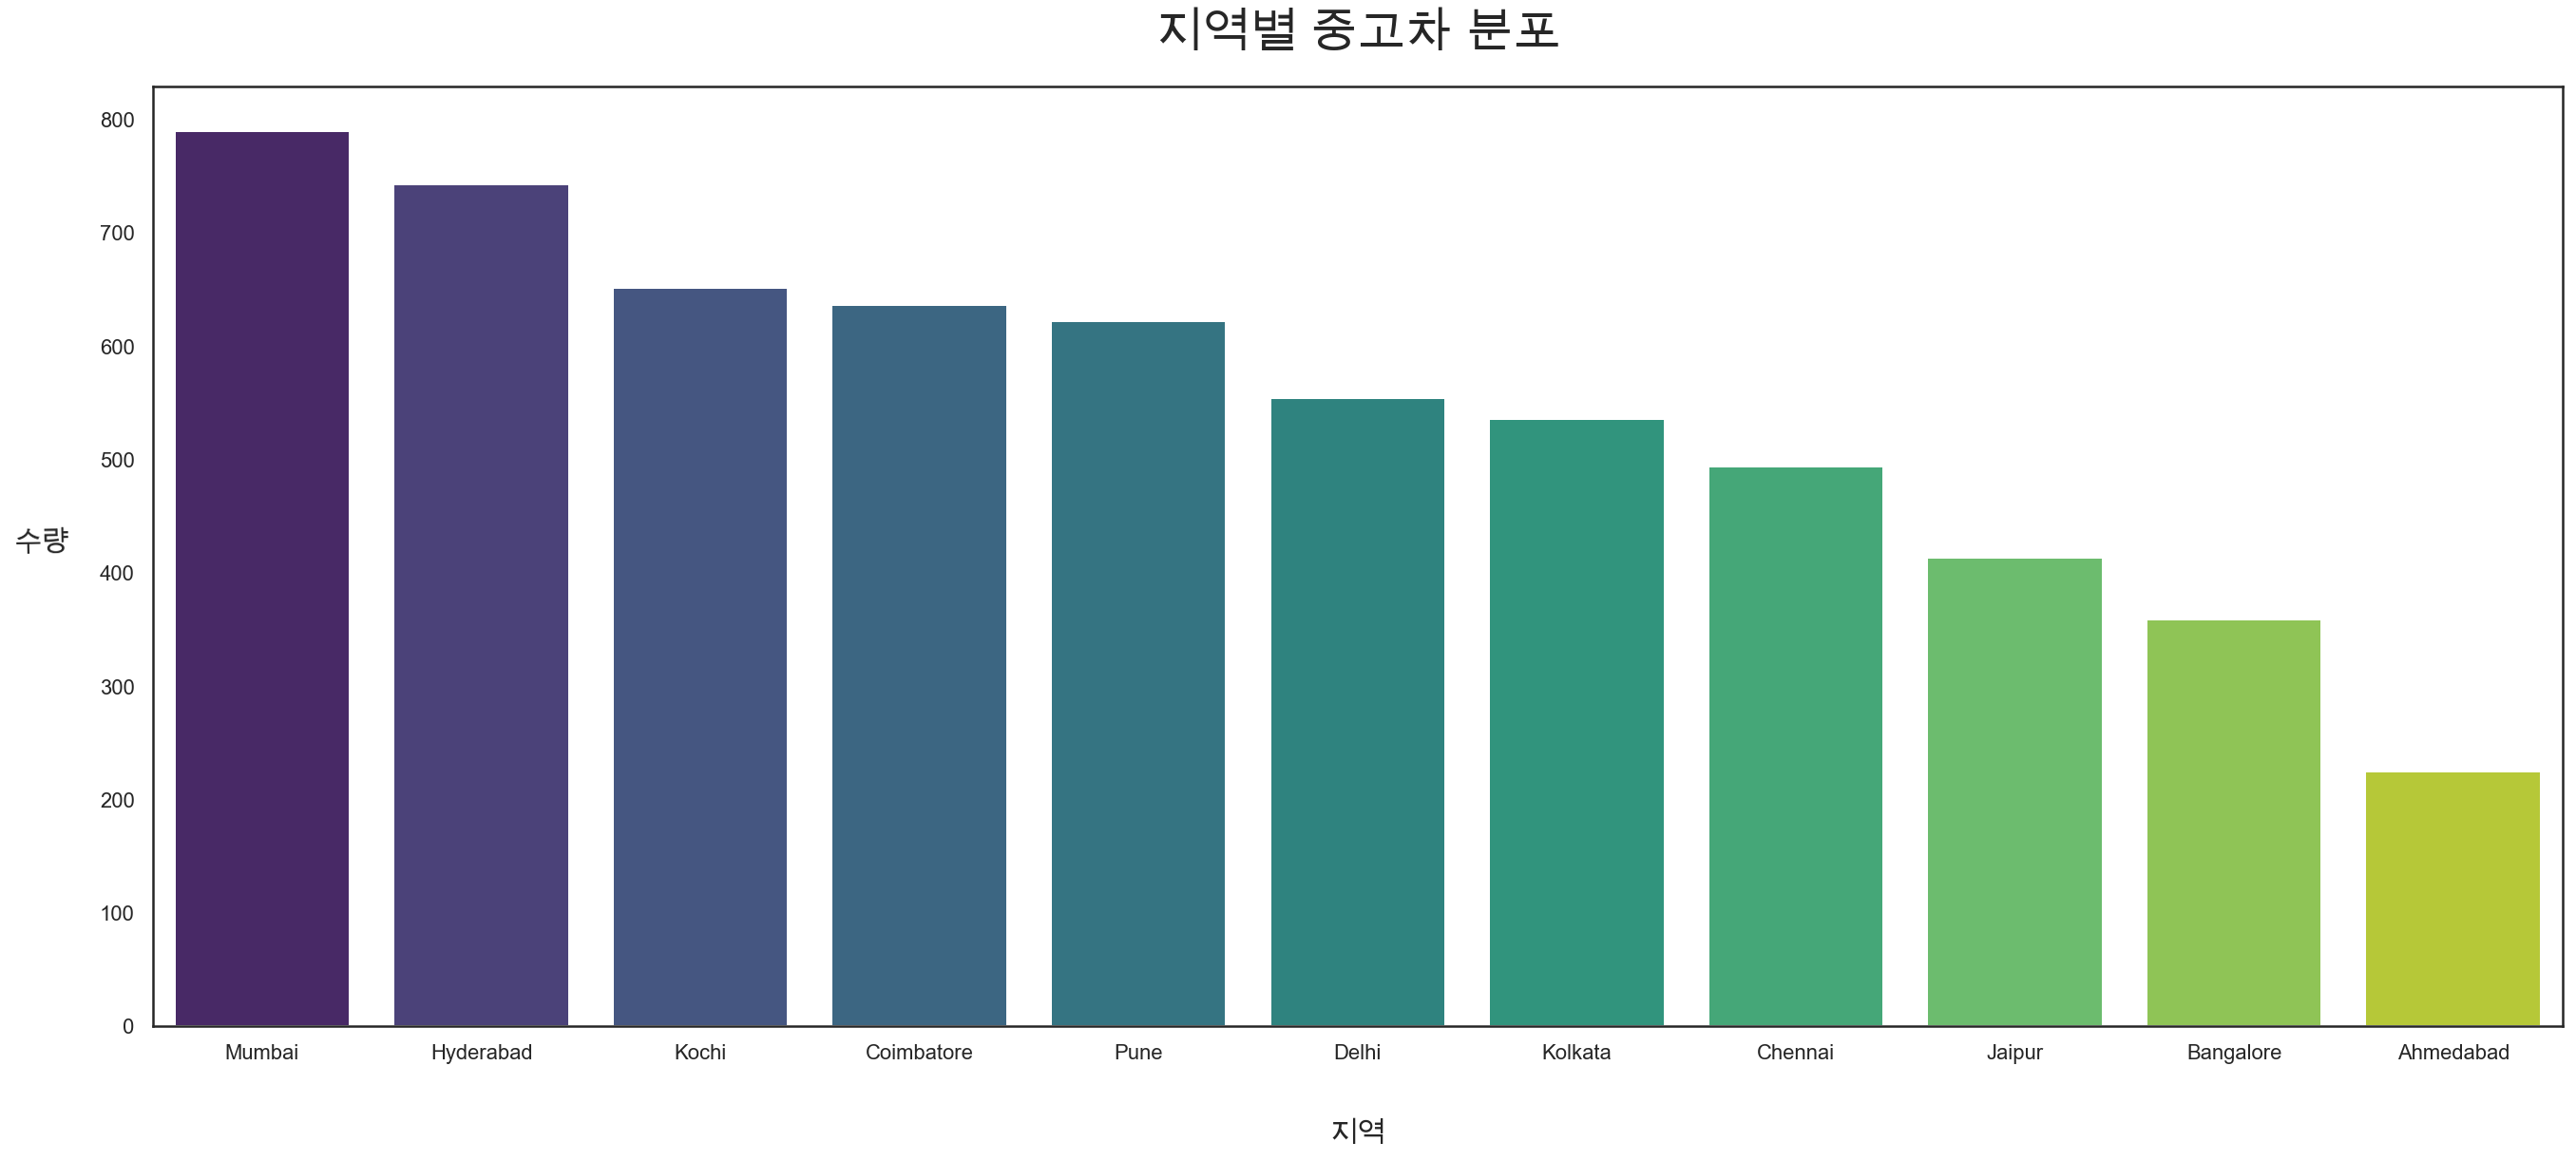

In [26]:
# 지역별 분포 그래프
plt.figure(figsize=(50,20))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Location'].value_counts()).sort_values(by='Location', ascending=False).T, palette='viridis', ci=False)

plt.title('지역별 중고차 분포', fontsize=25, y=1.03)
plt.xlabel('지역', fontsize=15, labelpad=30)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

plt.show()

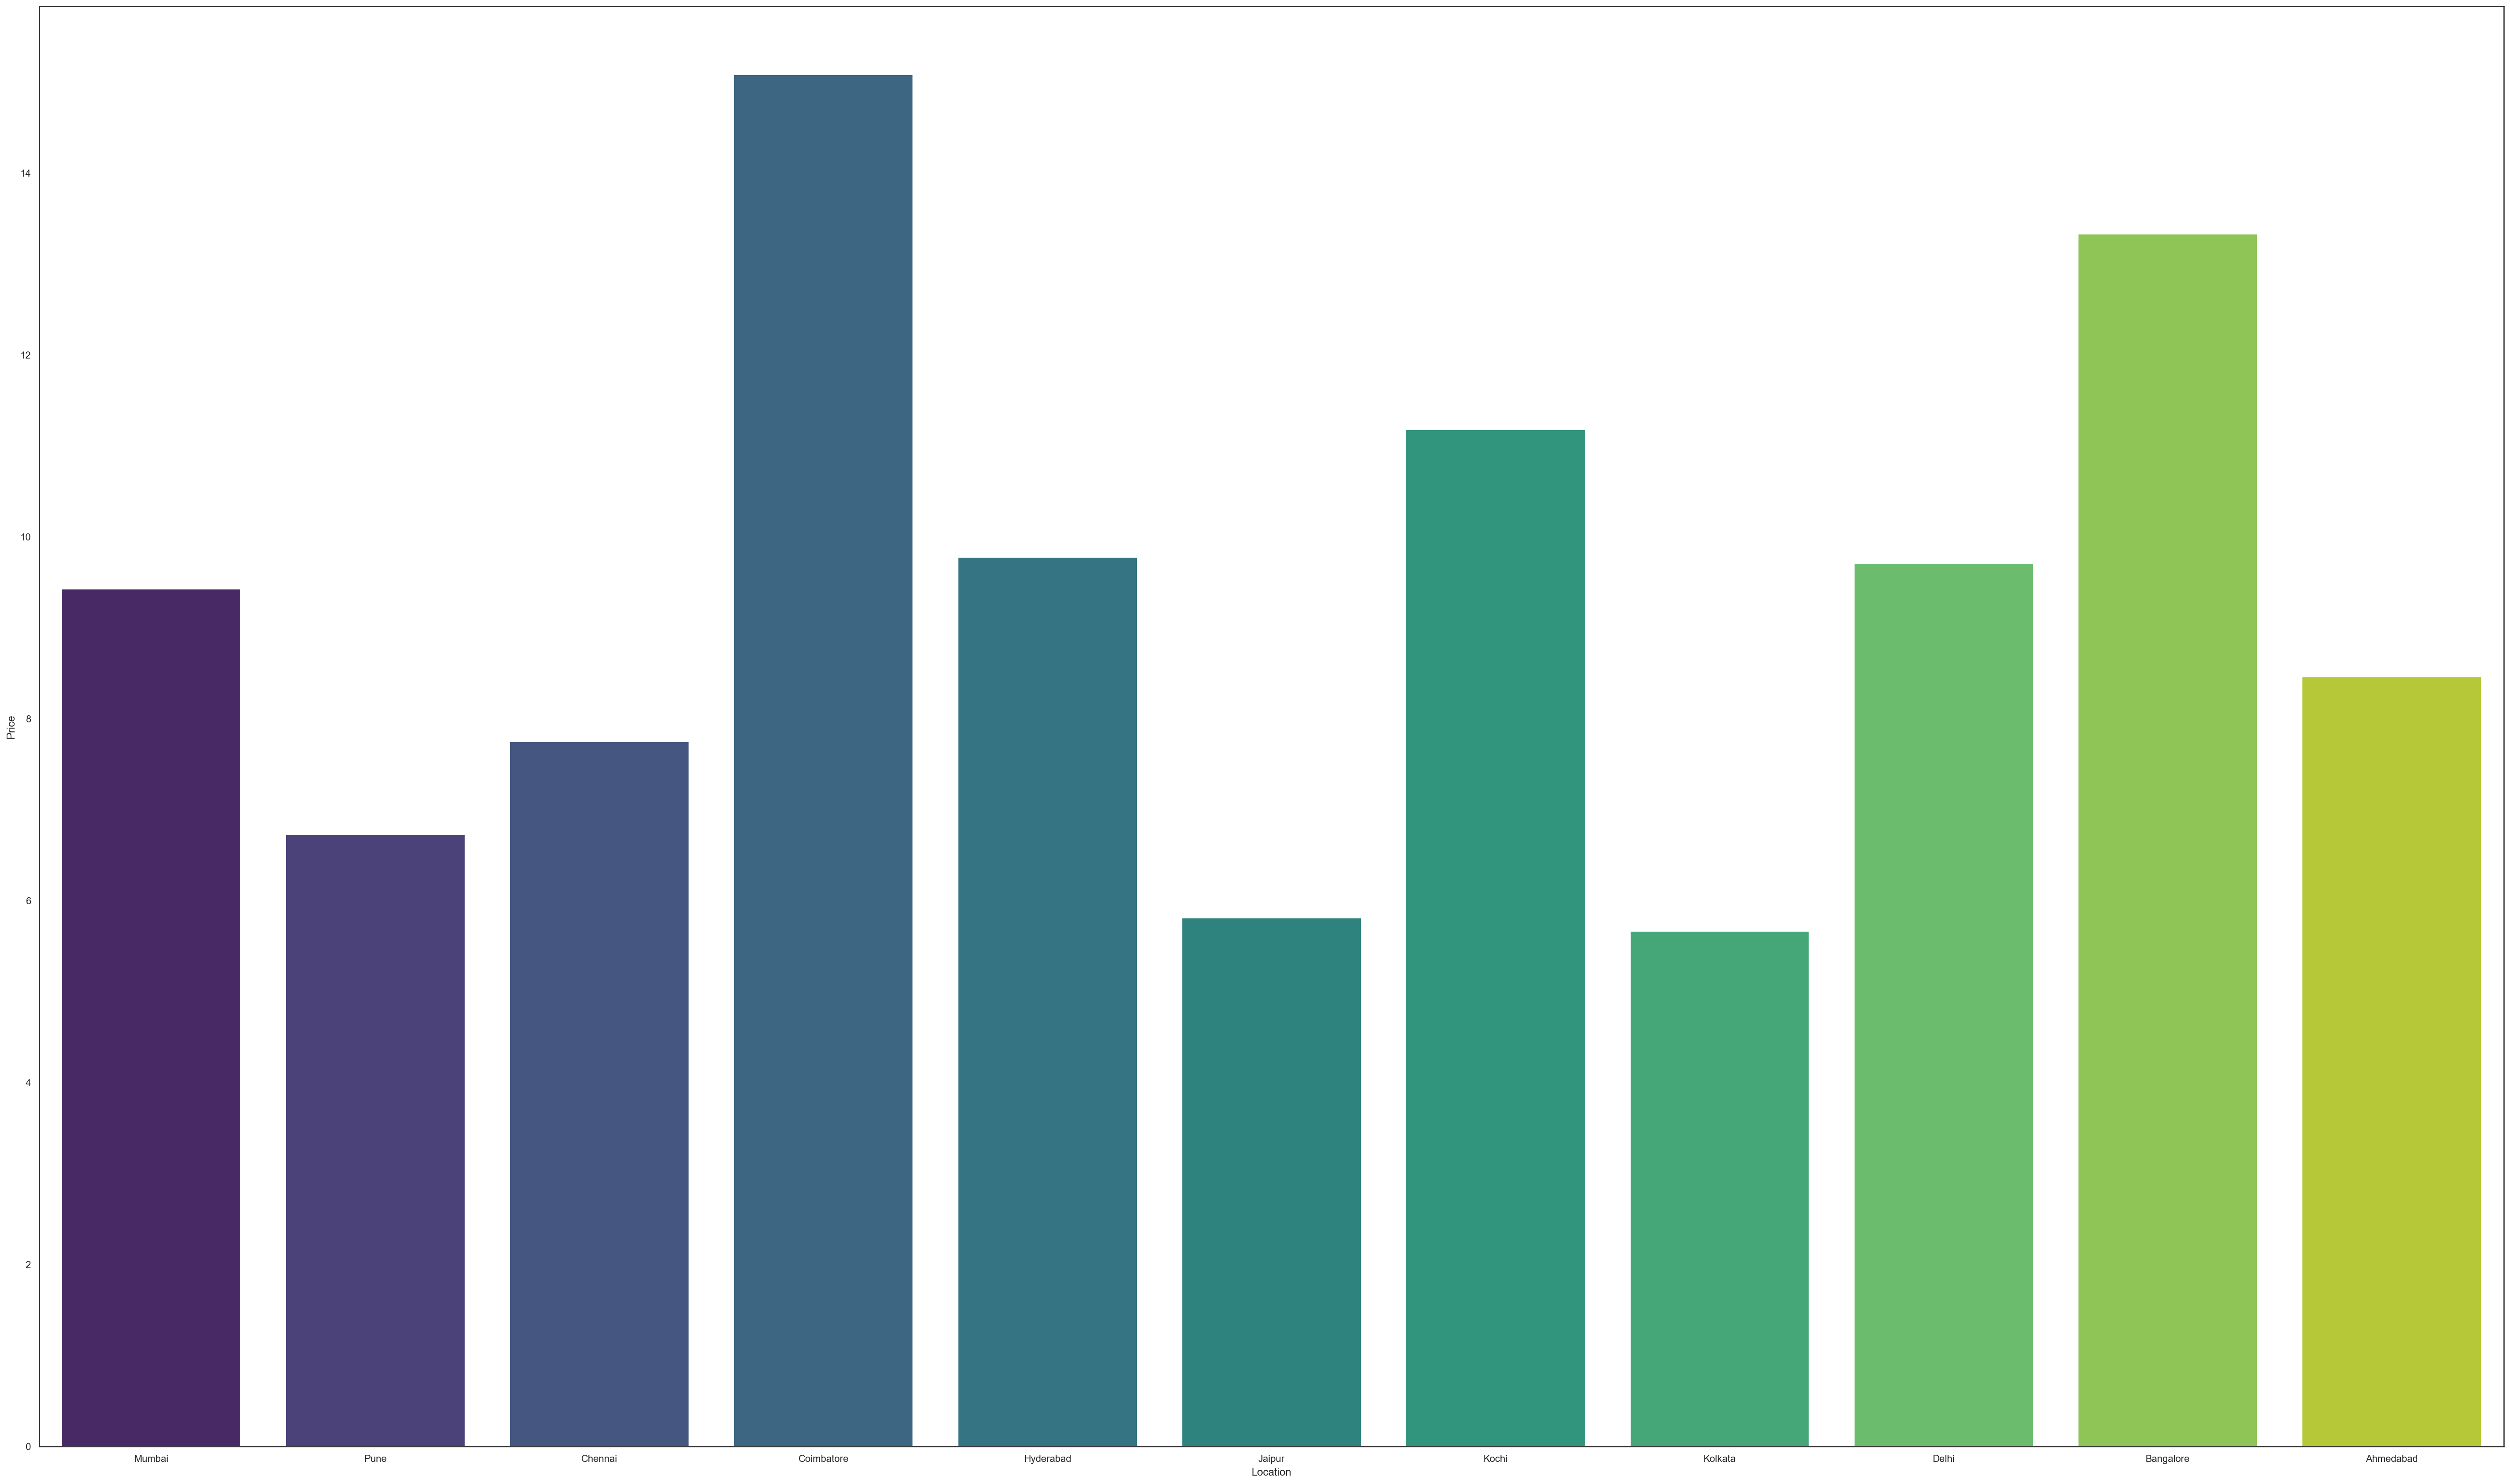

In [27]:
plt.figure(figsize=(50,30))
sns.barplot(
    data= car_t,
    x= "Location",
    y= "Price",
    palette='viridis', ci=False
)
plt.show()

In [28]:
car_t['Transmission'].value_counts()

Manual       4299
Automatic    1718
Name: Transmission, dtype: int64

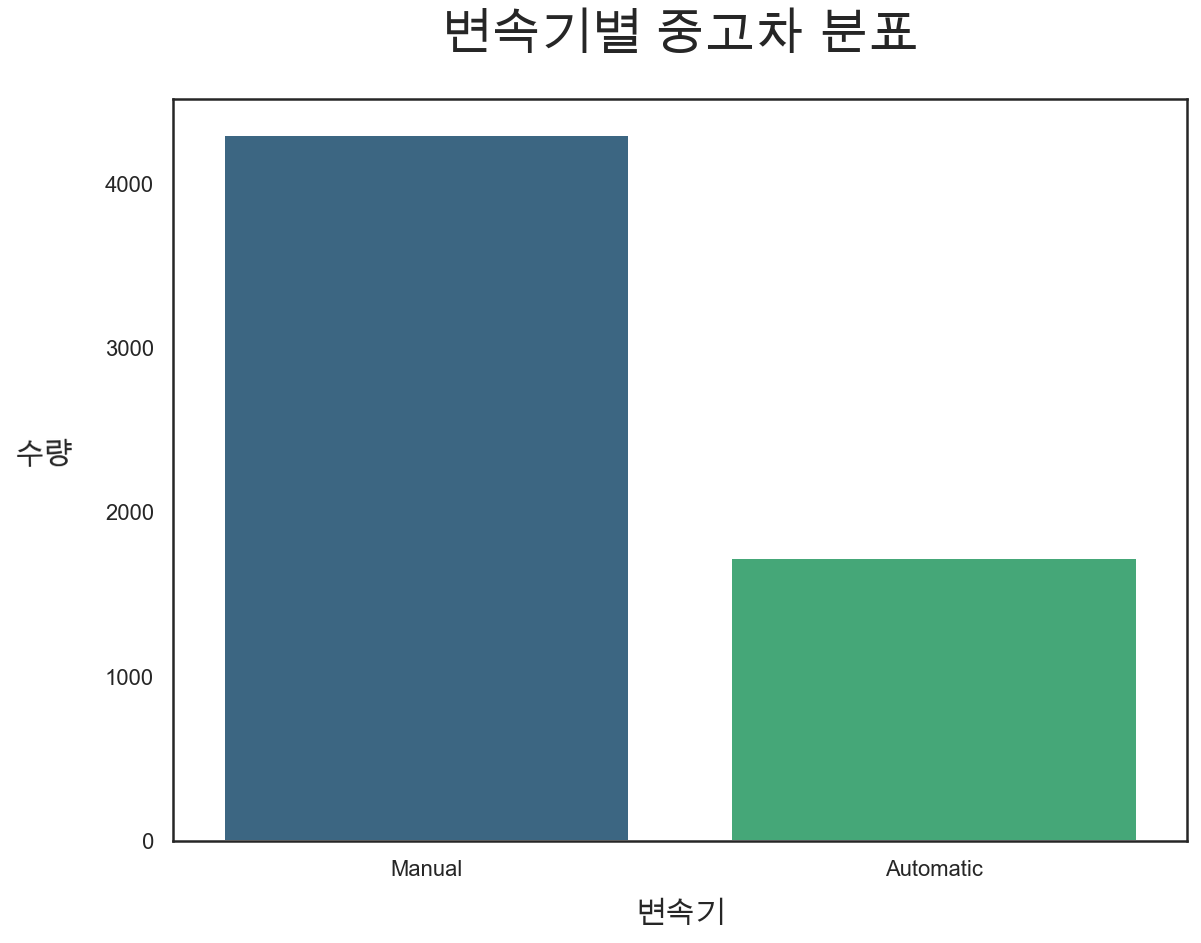

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(221)

sns.barplot(data=pd.DataFrame(car_t['Transmission'].value_counts()).sort_index(ascending=False).T, palette='viridis', ci=False)

plt.title('변속기별 중고차 분표', fontsize=25, y=1.05)
plt.xlabel('변속기', fontsize=15, labelpad=10)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

plt.show()

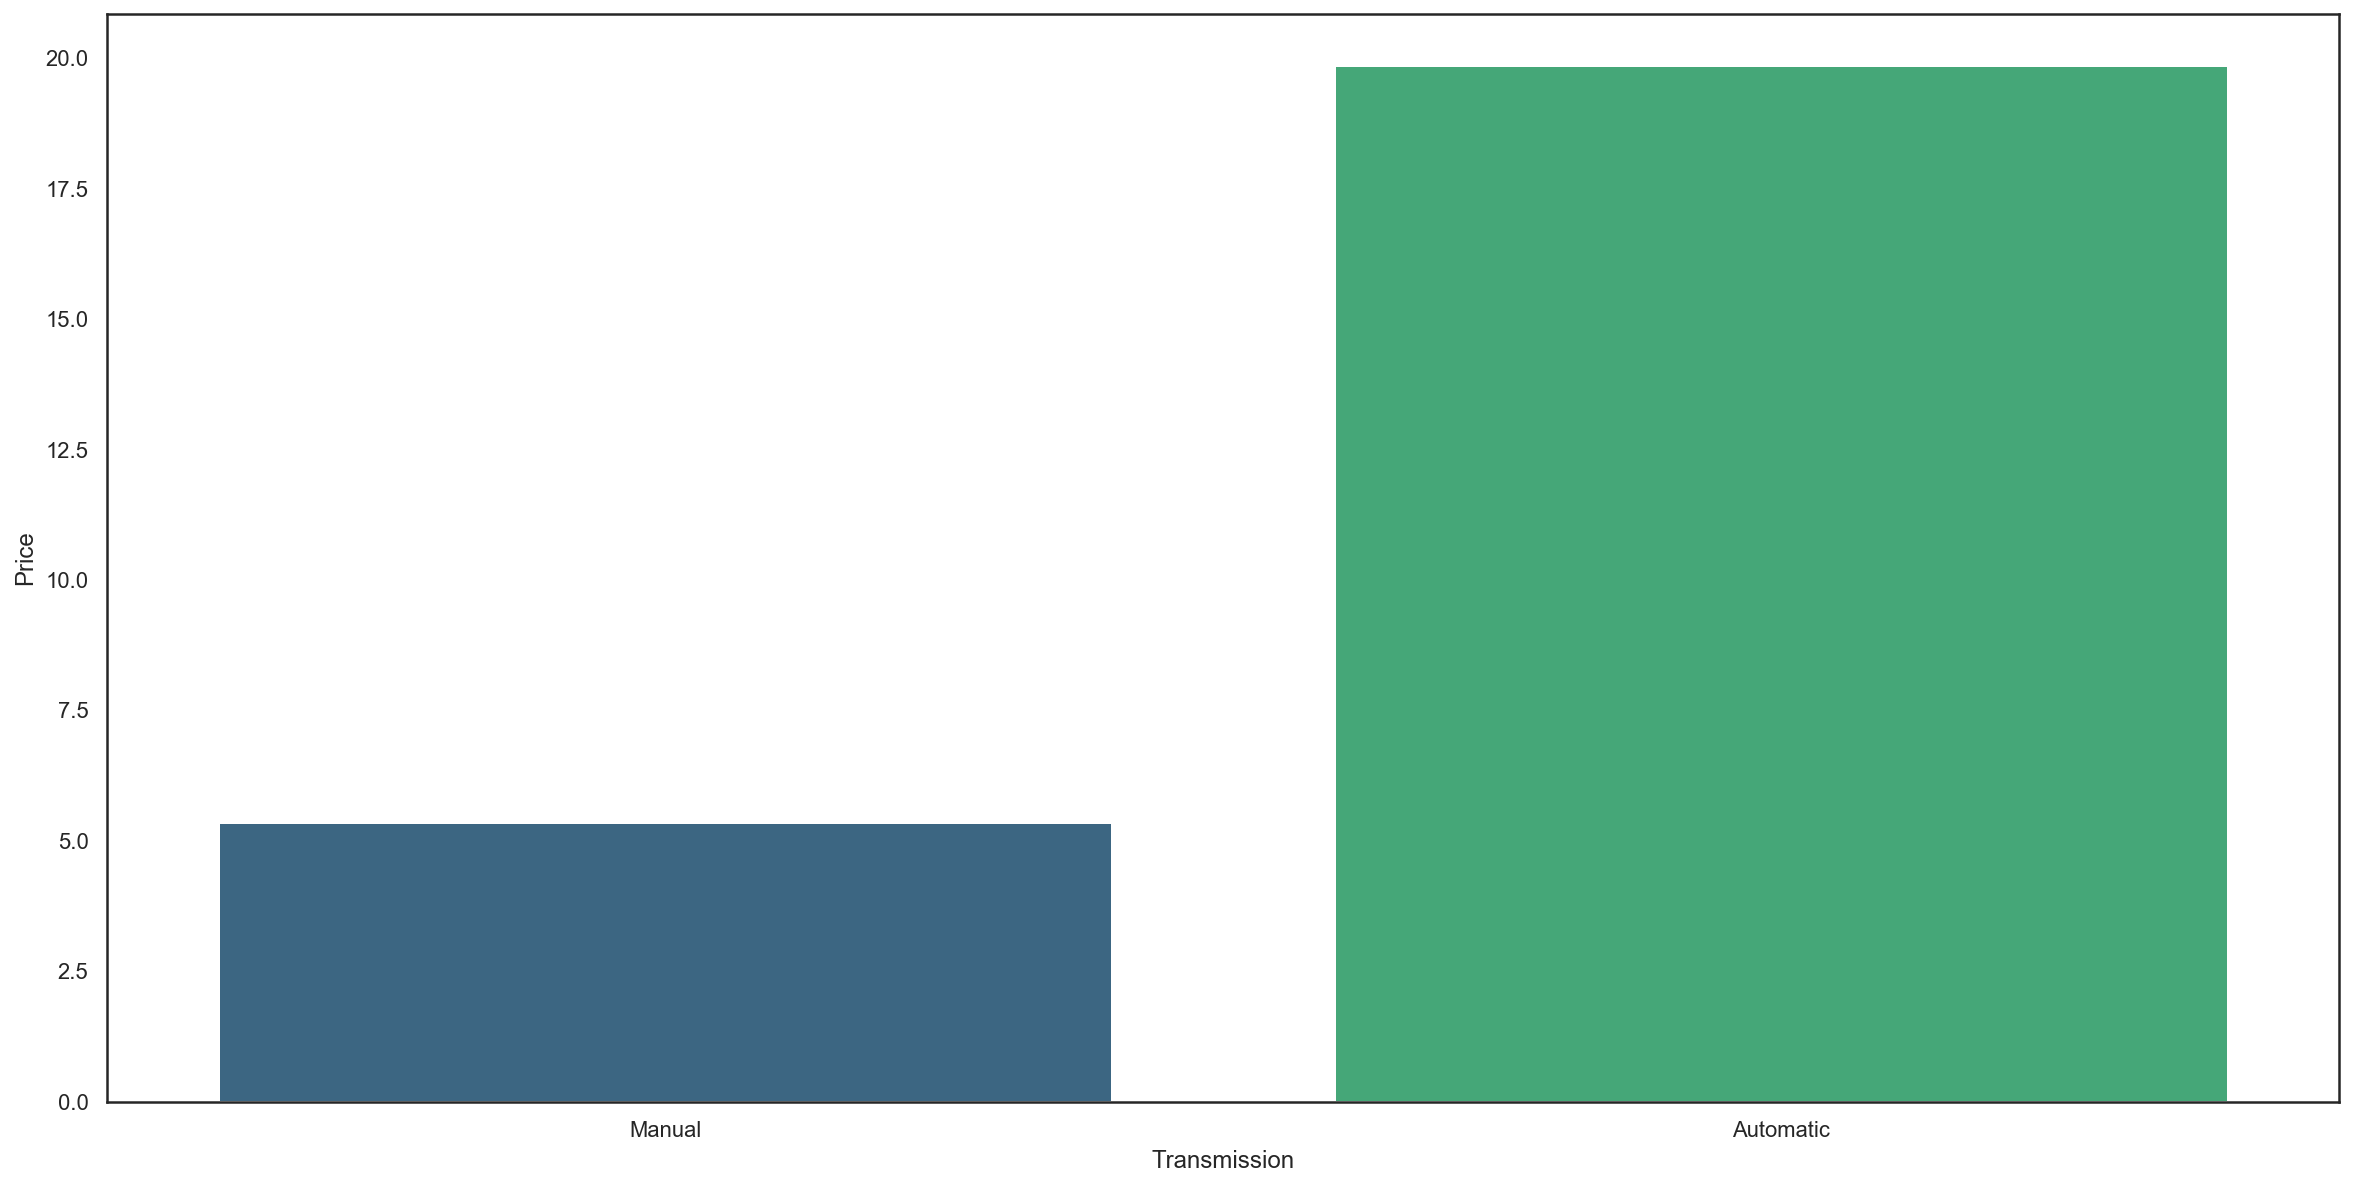

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(
    data= car_t,
    x= "Transmission",
    y= "Price",
    palette='viridis', ci=False
)
plt.show()

In [31]:
car_t['Owner_Type'].value_counts()

First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

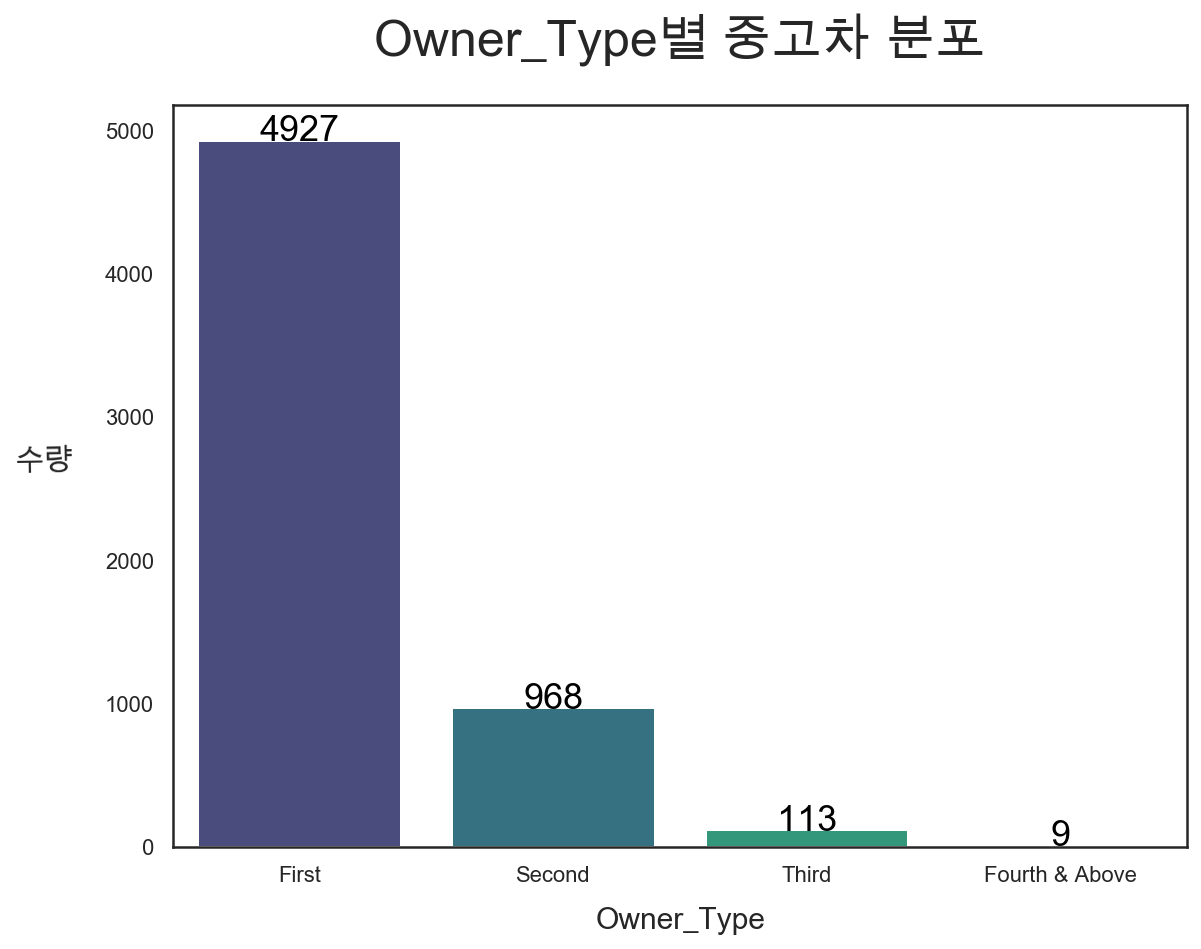

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(221)

g = sns.barplot(data=pd.DataFrame(car_t['Owner_Type'].value_counts()).sort_values(by='Owner_Type', ascending=False).T, palette='viridis', ci=False)

plt.title('Owner_Type별 중고차 분포', fontsize=25, y=1.05)
plt.xlabel('Owner_Type', fontsize=15, labelpad=10)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=30) 

for i in range(0,4):
    g.text(i,car_t['Owner_Type'].value_counts()[i], car_t['Owner_Type'].value_counts()[i], 
    color= 'black', ha='center', fontsize=18)

plt.show()

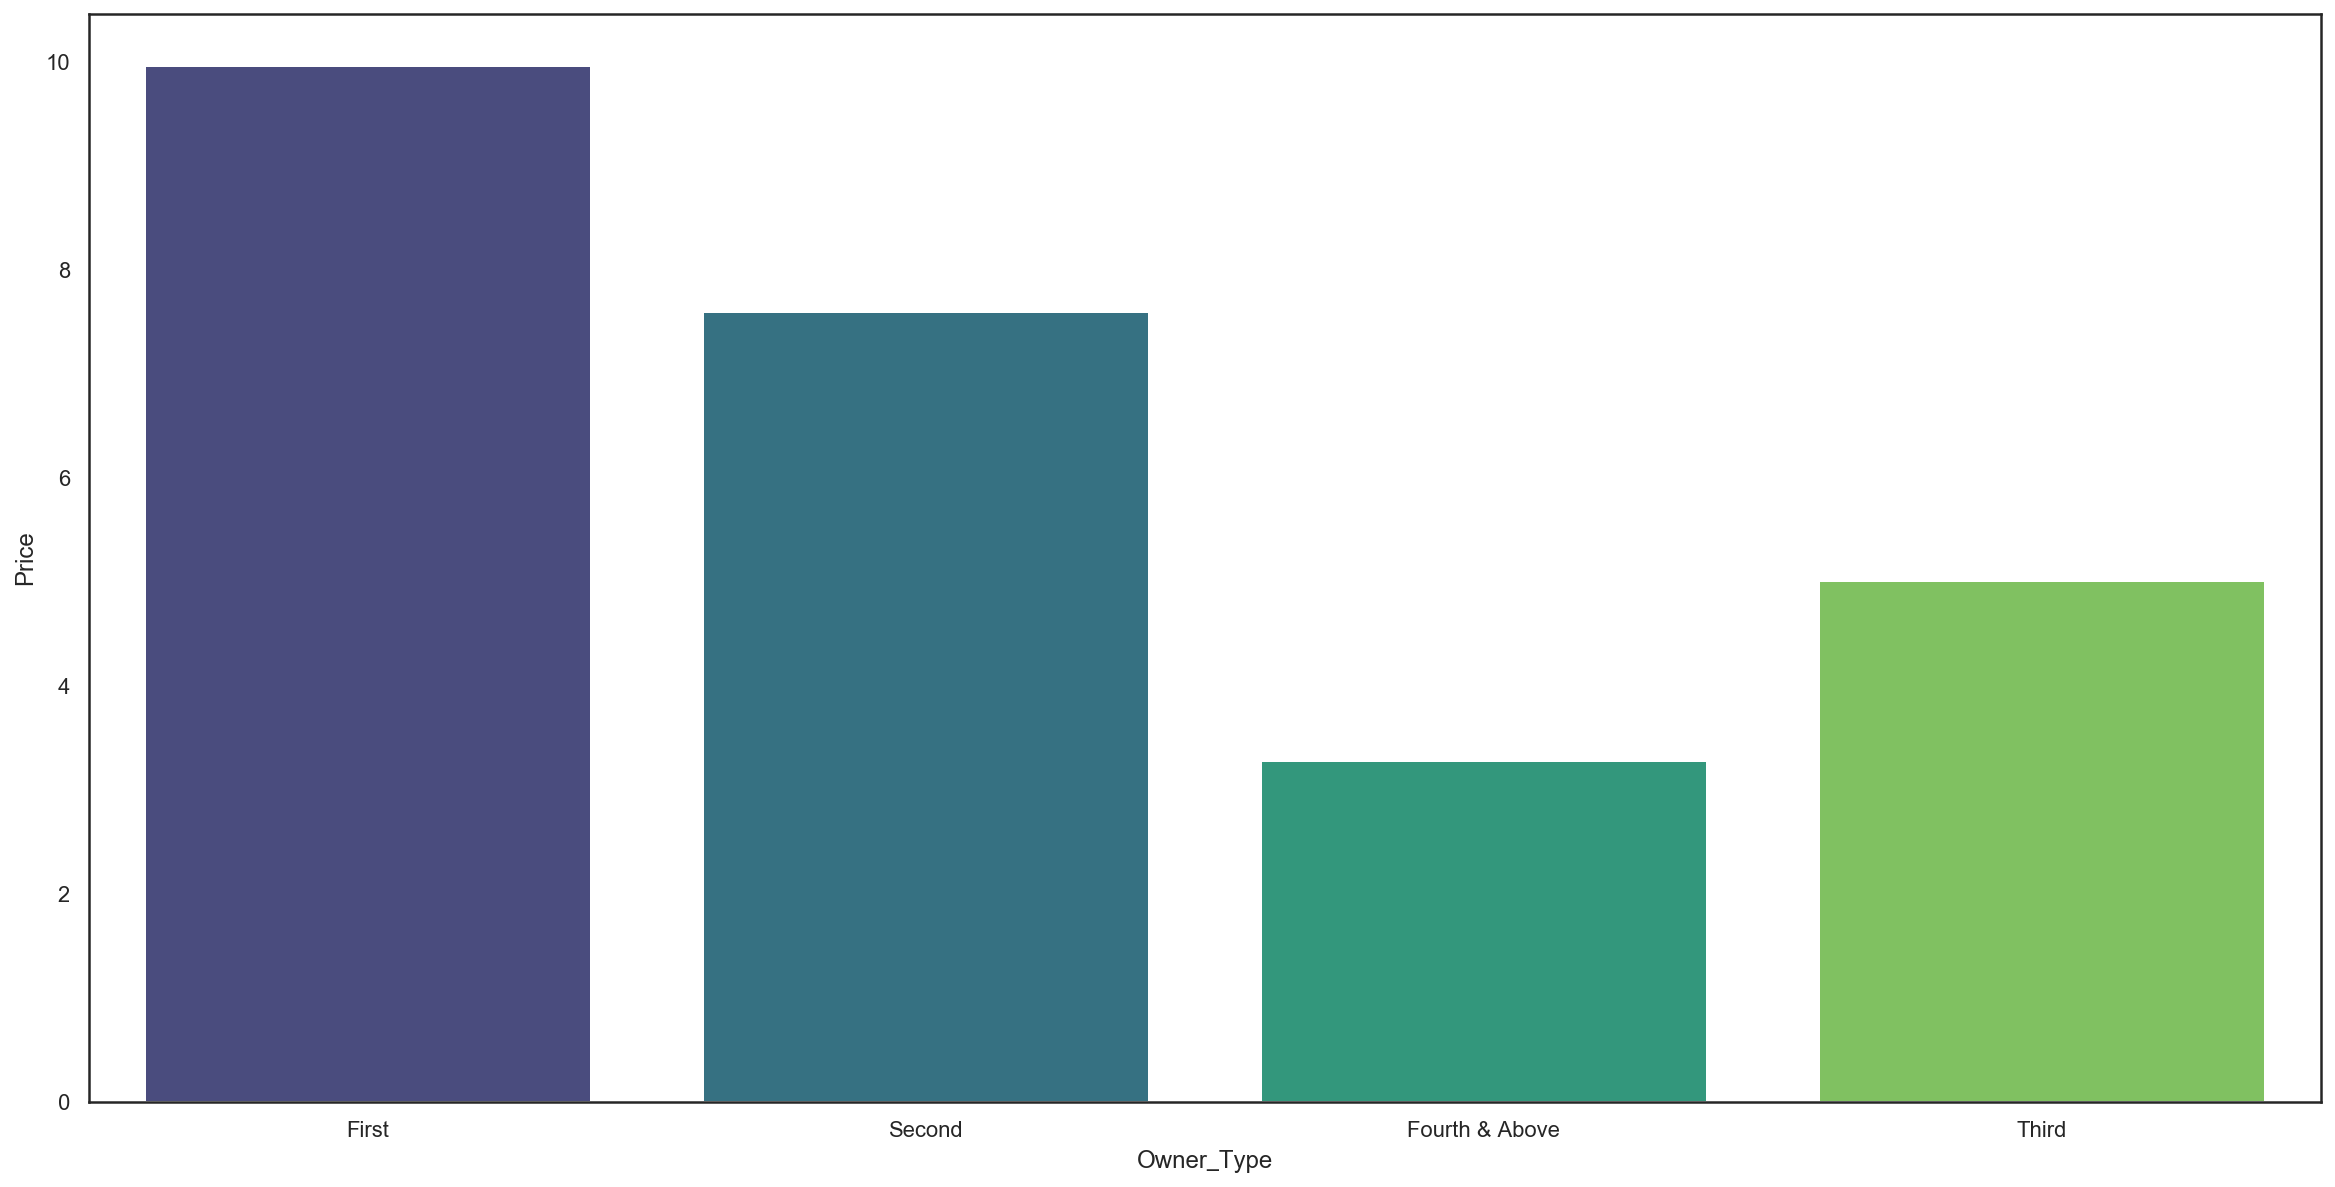

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(
    data= car_t,
    x= "Owner_Type",
    y= "Price",
    palette='viridis', ci=False
)
plt.show()

In [34]:
car_t['Fuel_Type'].value_counts()

Diesel    3205
Petrol    2746
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

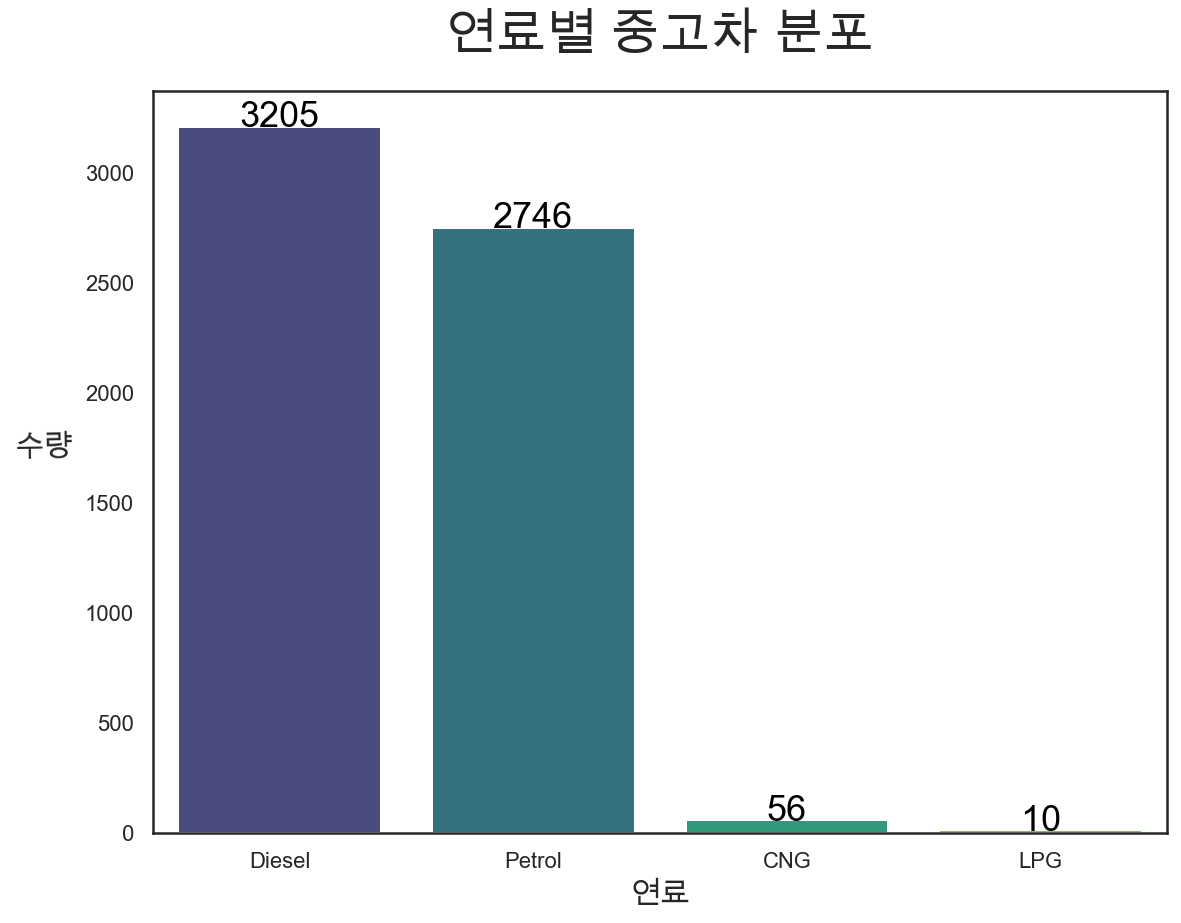

In [35]:
# 연료 분포 그래프
plt.figure(figsize=(20,15))
plt.subplot(221)

g = sns.barplot(data=pd.DataFrame(car_t['Fuel_Type'].value_counts()).T, palette='viridis', ci=False)

plt.title('연료별 중고차 분포', fontsize=25, y=1.04)
plt.xlabel('연료', fontsize=15)
plt.ylabel('수량', fontsize=15, rotation=1, labelpad=20)

for i in range(0,4):
    g.text(i,car_t['Fuel_Type'].value_counts()[i], car_t['Fuel_Type'].value_counts()[i], 
    color= 'black', ha='center', fontsize=18)

plt.show()

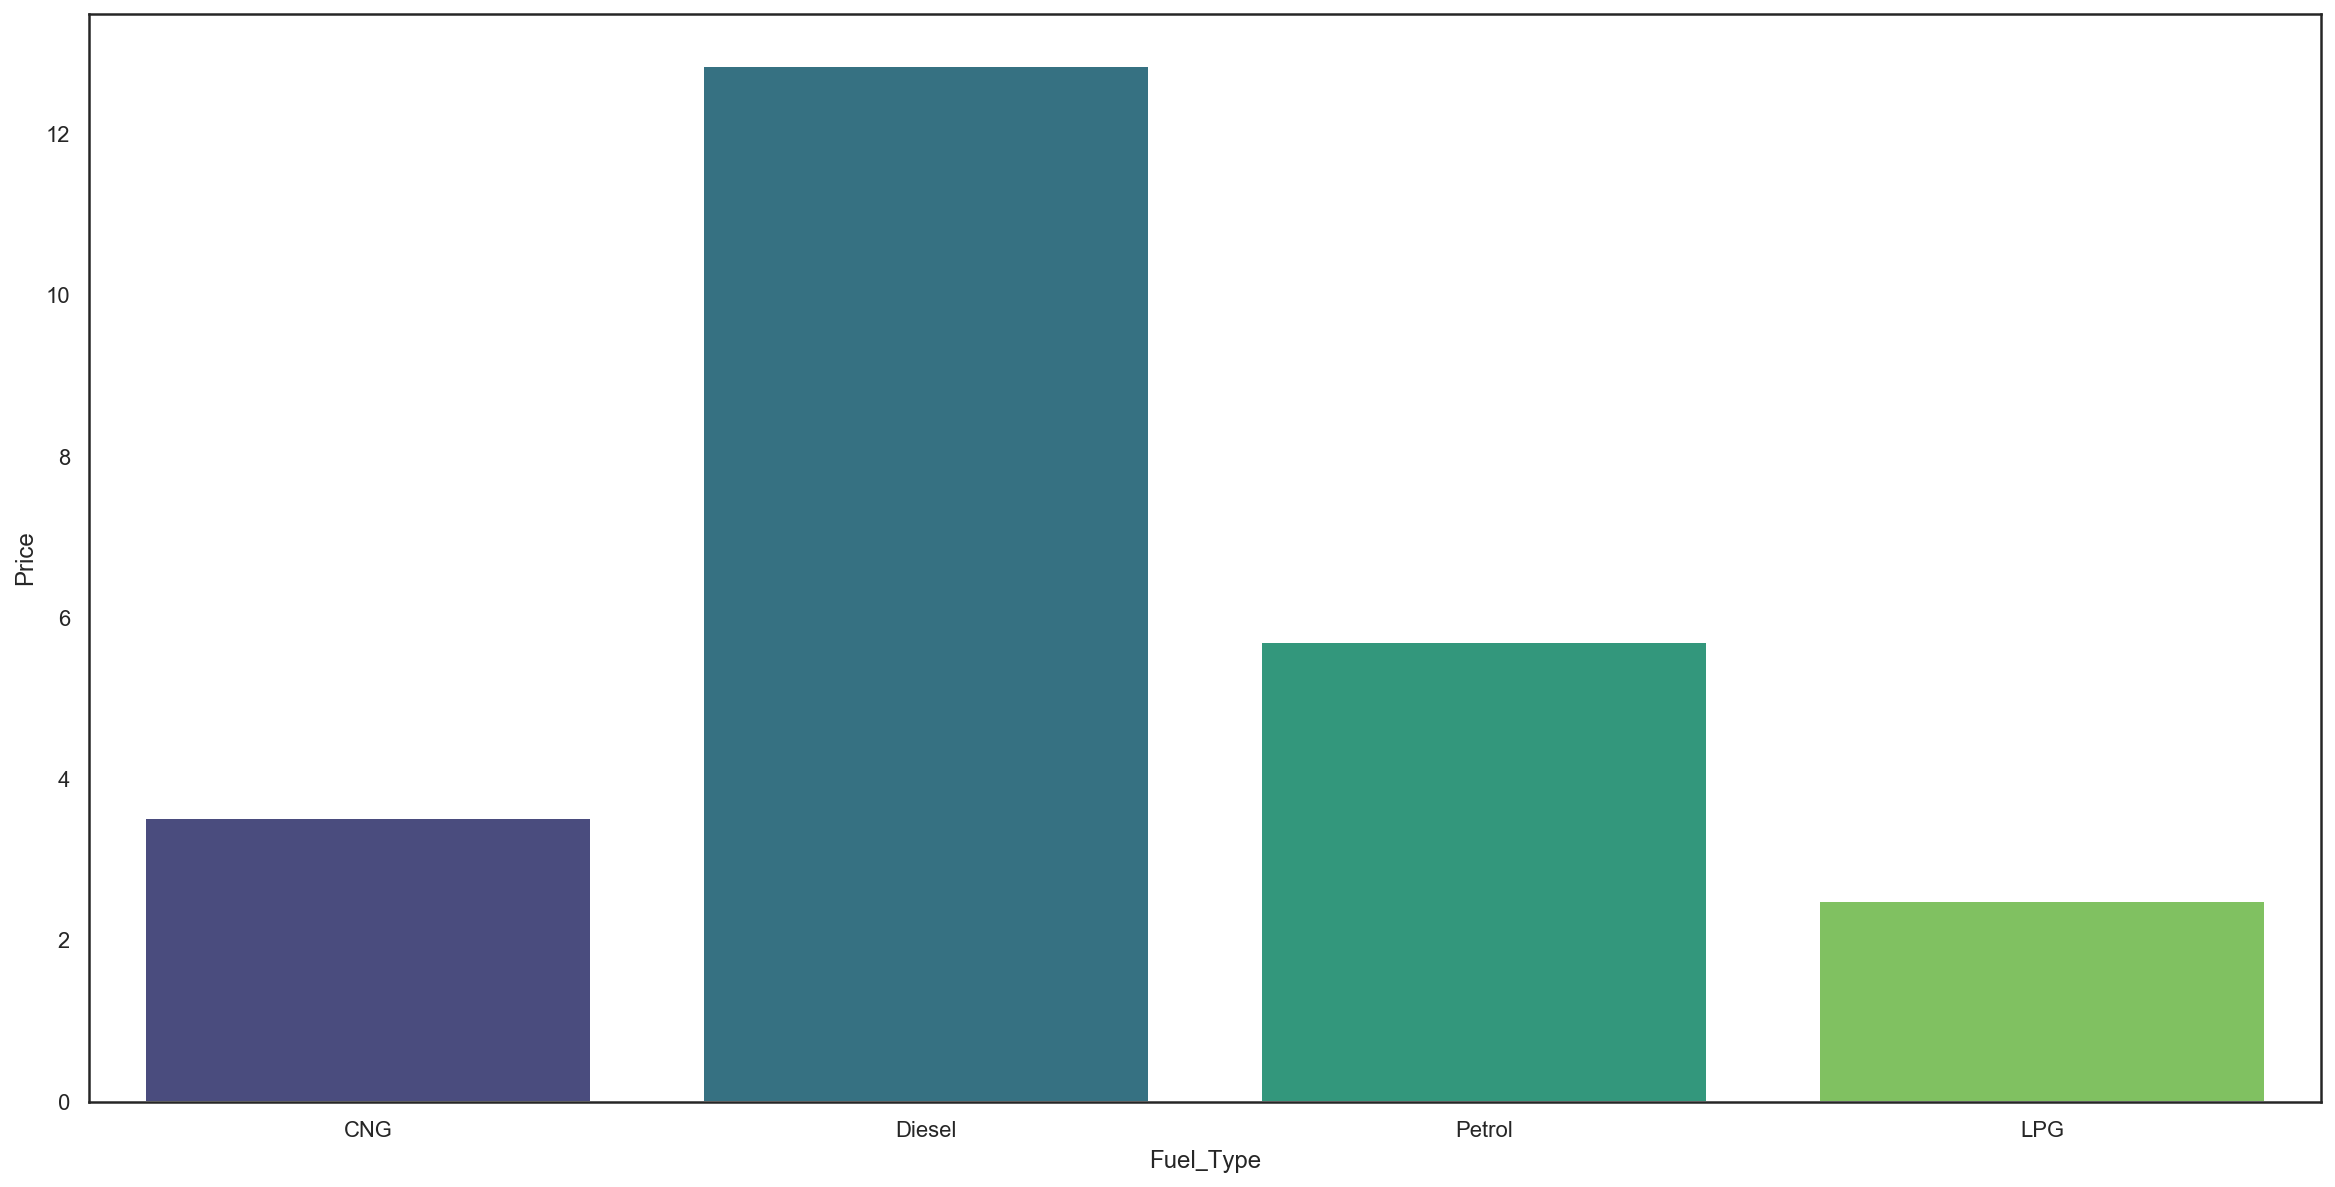

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(
    data= car_t,
    x= "Fuel_Type",
    y= "Price",
    palette='viridis', ci=False
)
plt.show()

In [37]:
# # 각 Fuel_type을 km/L로 계산
# car_t['Mile'][car_t['Fuel_Type'] == 'CNG']= car_t[car_t['Fuel_Type'] == 'CNG']['Mile']*1.64
# car_t['Mile'][car_t['Fuel_Type'] == 'LPG']= car_t[car_t['Fuel_Type'] == 'LPG']['Mile']*1.3

In [38]:
car_td = pd.get_dummies(car_t, columns=['Location', 'Fuel_Type', 'Transmission', 'Brand'])
car_td.head(1)

Name  Year  Kilometers_Driven Owner_Type     Mileage  \
0  Maruti Wagon R LXI CNG  2010              72000      First  26.6 km/kg   

   Engine      Power  Seats New_Price  Price         Car_name  Mile    Eng  \
0  998 CC  58.16 bhp      5    0 Lakh   1.75  Wagon R LXI CNG  26.6  998.0   

     Pow  New_p  Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0  58.16    0.0                   0                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              1                 0              0                 0   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            0              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             1                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

In [39]:
# Owner를 1234로 변환
car_td['Owner'] = range(0,len(car_td))

for i in range(0,len(car_td)):
    if car_td['Owner_Type'][i] == 'First':
        car_td['Owner'][i] = 1

    elif car_td['Owner_Type'][i] == 'Second':
        car_td['Owner'][i] = 2

    elif car_td['Owner_Type'][i] == 'Third':
        car_td['Owner'][i] = 3

    elif car_td['Owner_Type'][i] == 'Fourth & Above':
        car_td['Owner'][i] = 4

In [40]:
car_td = pd.get_dummies(car_t, columns=['Location', 'Fuel_Type', 'Transmission', 'Brand'])
car_td.head(1)

Name  Year  Kilometers_Driven Owner_Type     Mileage  \
0  Maruti Wagon R LXI CNG  2010              72000      First  26.6 km/kg   

   Engine      Power  Seats New_Price  Price         Car_name  Mile    Eng  \
0  998 CC  58.16 bhp      5    0 Lakh   1.75  Wagon R LXI CNG  26.6  998.0   

     Pow  New_p  Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0  58.16    0.0                   0                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              1                 0              0                 0   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            0              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             1                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

In [41]:
car_td.drop(['Name', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price'], axis=1, inplace=True)

In [42]:
car_td.head(1)

Year  Kilometers_Driven  Seats  Price         Car_name  Mile    Eng    Pow  \
0  2010              72000      5   1.75  Wagon R LXI CNG  26.6  998.0  58.16   

   New_p  Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0    0.0                   0                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              1                 0              0                 0   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            0              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             1                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

In [43]:
car_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6017 non-null   int64  
 1   Kilometers_Driven       6017 non-null   int64  
 2   Seats                   6017 non-null   int64  
 3   Price                   6017 non-null   float64
 4   Car_name                6017 non-null   object 
 5   Mile                    6017 non-null   float64
 6   Eng                     6017 non-null   float64
 7   Pow                     6017 non-null   float64
 8   New_p                   6017 non-null   float64
 9   Location_Ahmedabad      6017 non-null   uint8  
 10  Location_Bangalore      6017 non-null   uint8  
 11  Location_Chennai        6017 non-null   uint8  
 12  Location_Coimbatore     6017 non-null   uint8  
 13  Location_Delhi          6017 non-null   uint8  
 14  Location_Hyderabad      6017 non-null   

In [44]:
# car_td.to_csv('./used_car.csv')

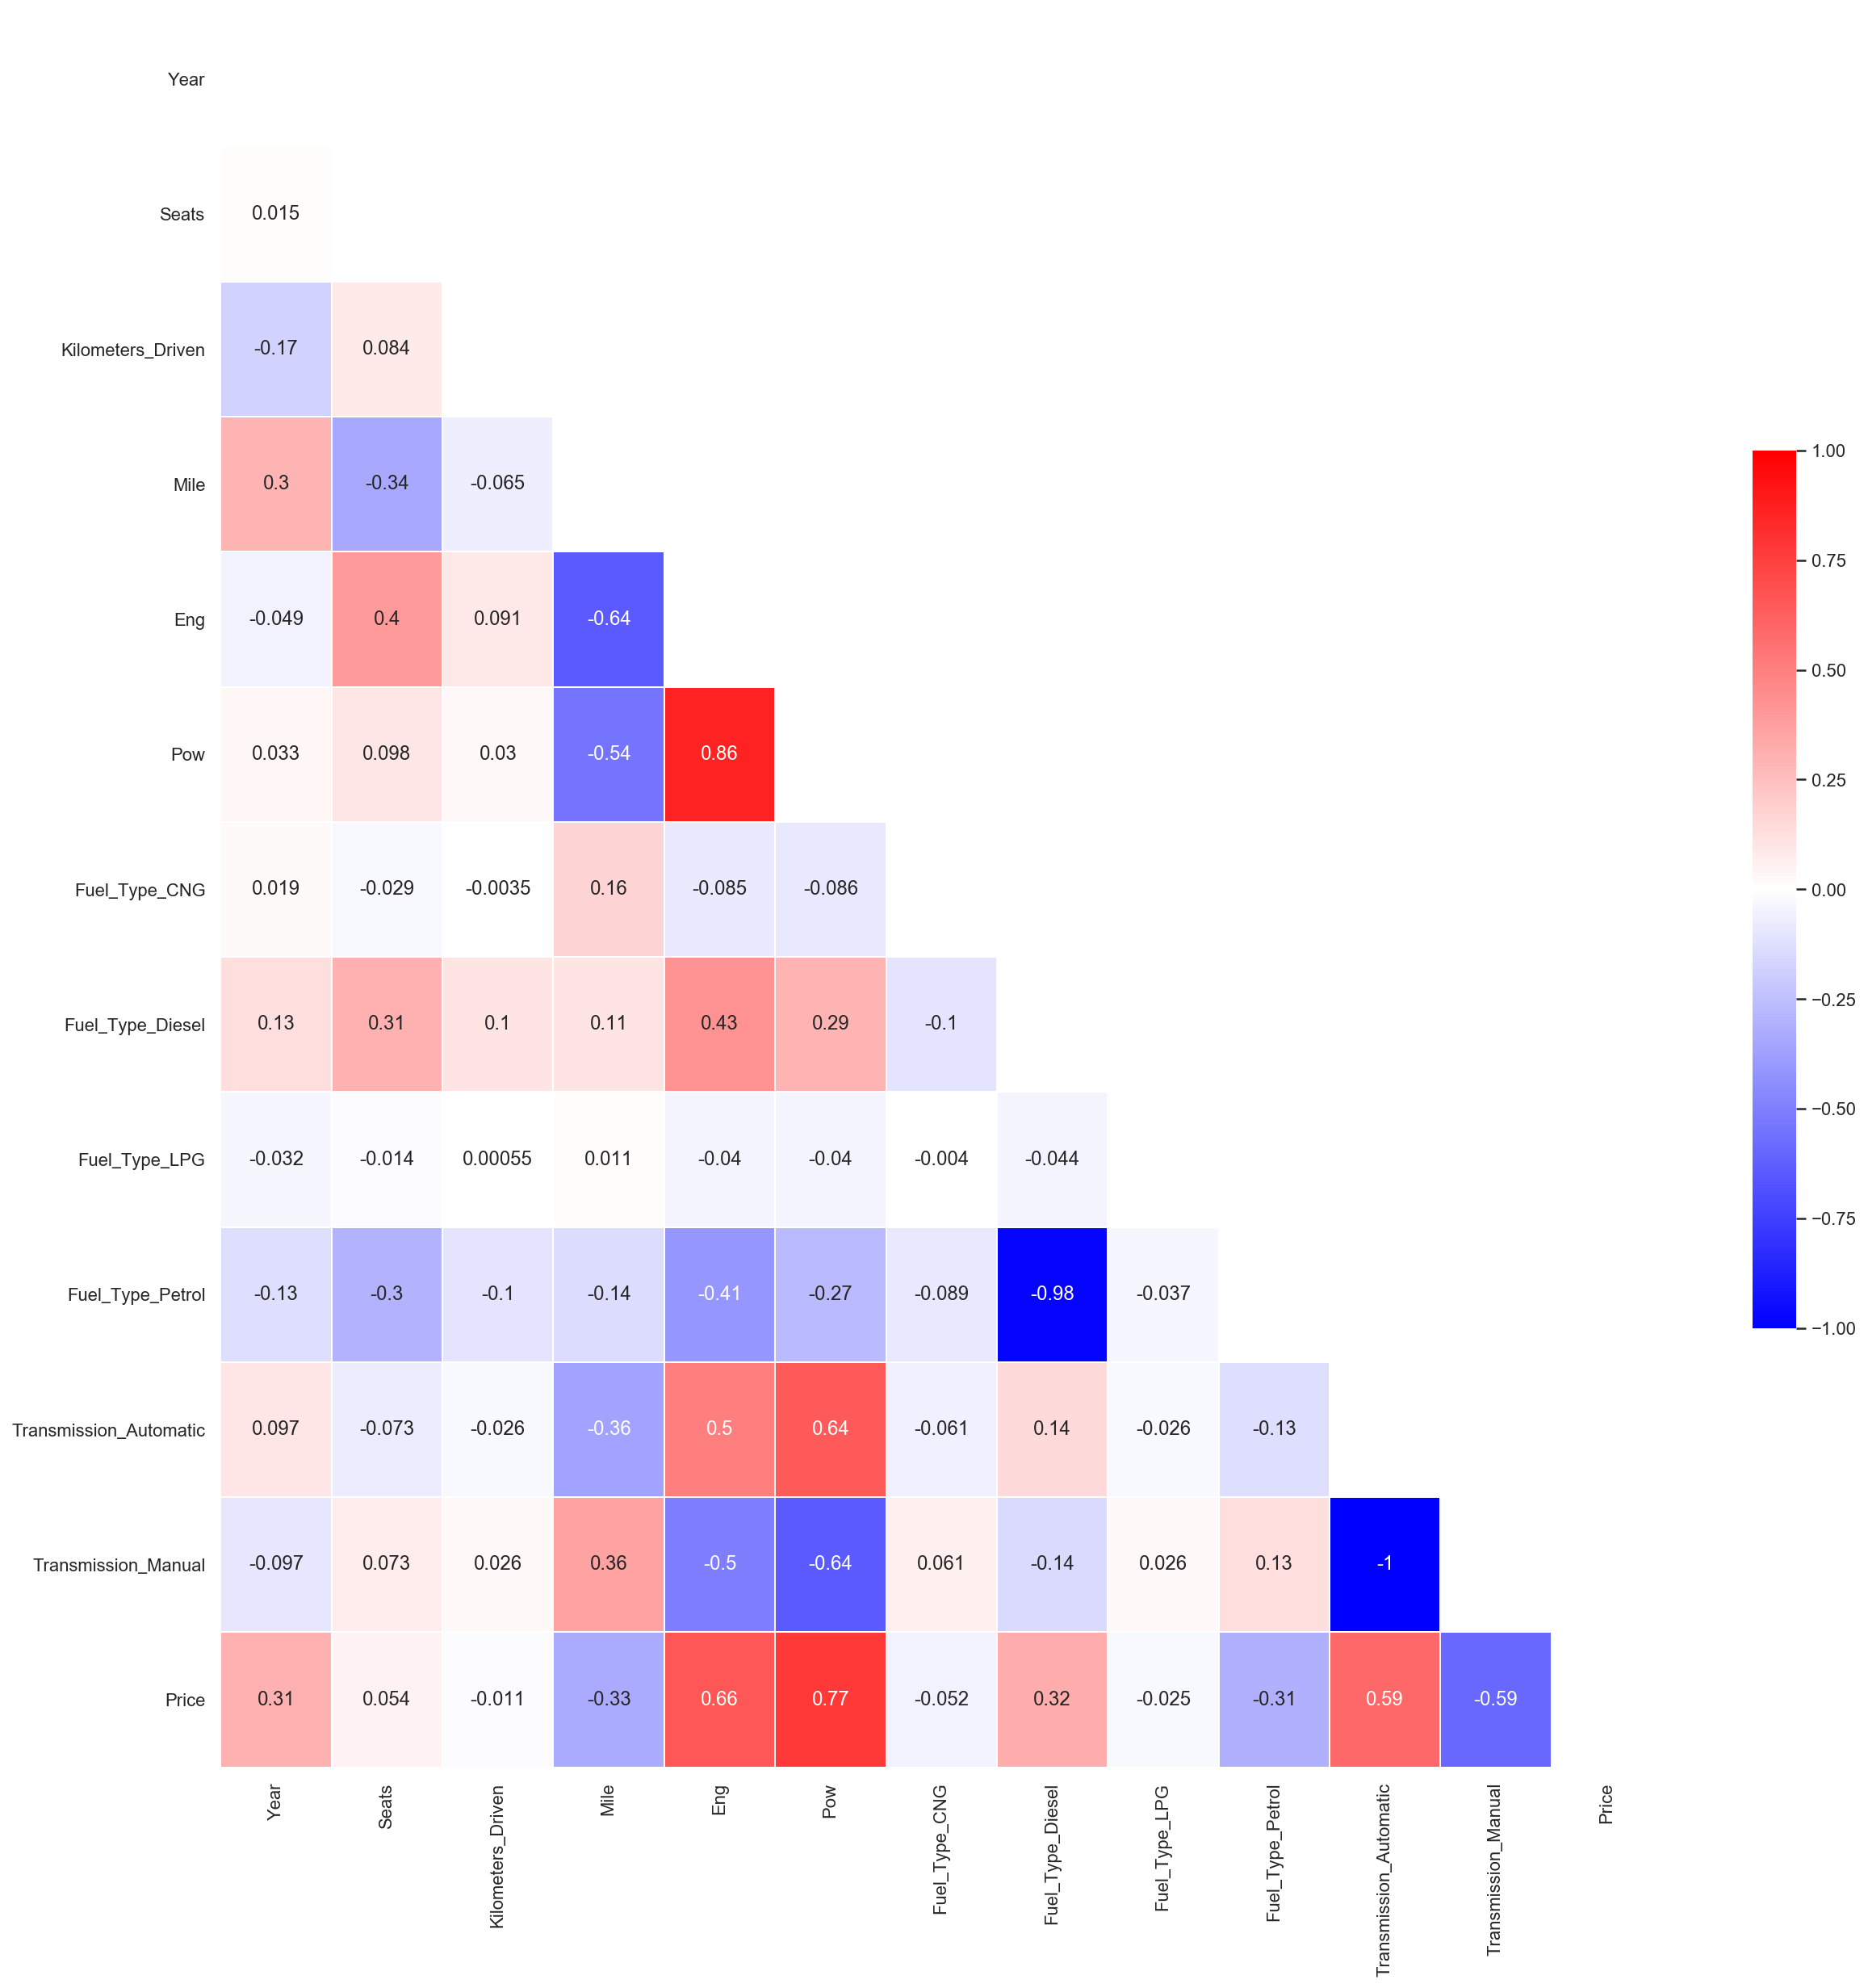

In [150]:
# 주요 변수들로 히트맵
df = car_td[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_LPG','Fuel_Type_Petrol','Transmission_Automatic','Transmission_Manual','Price']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

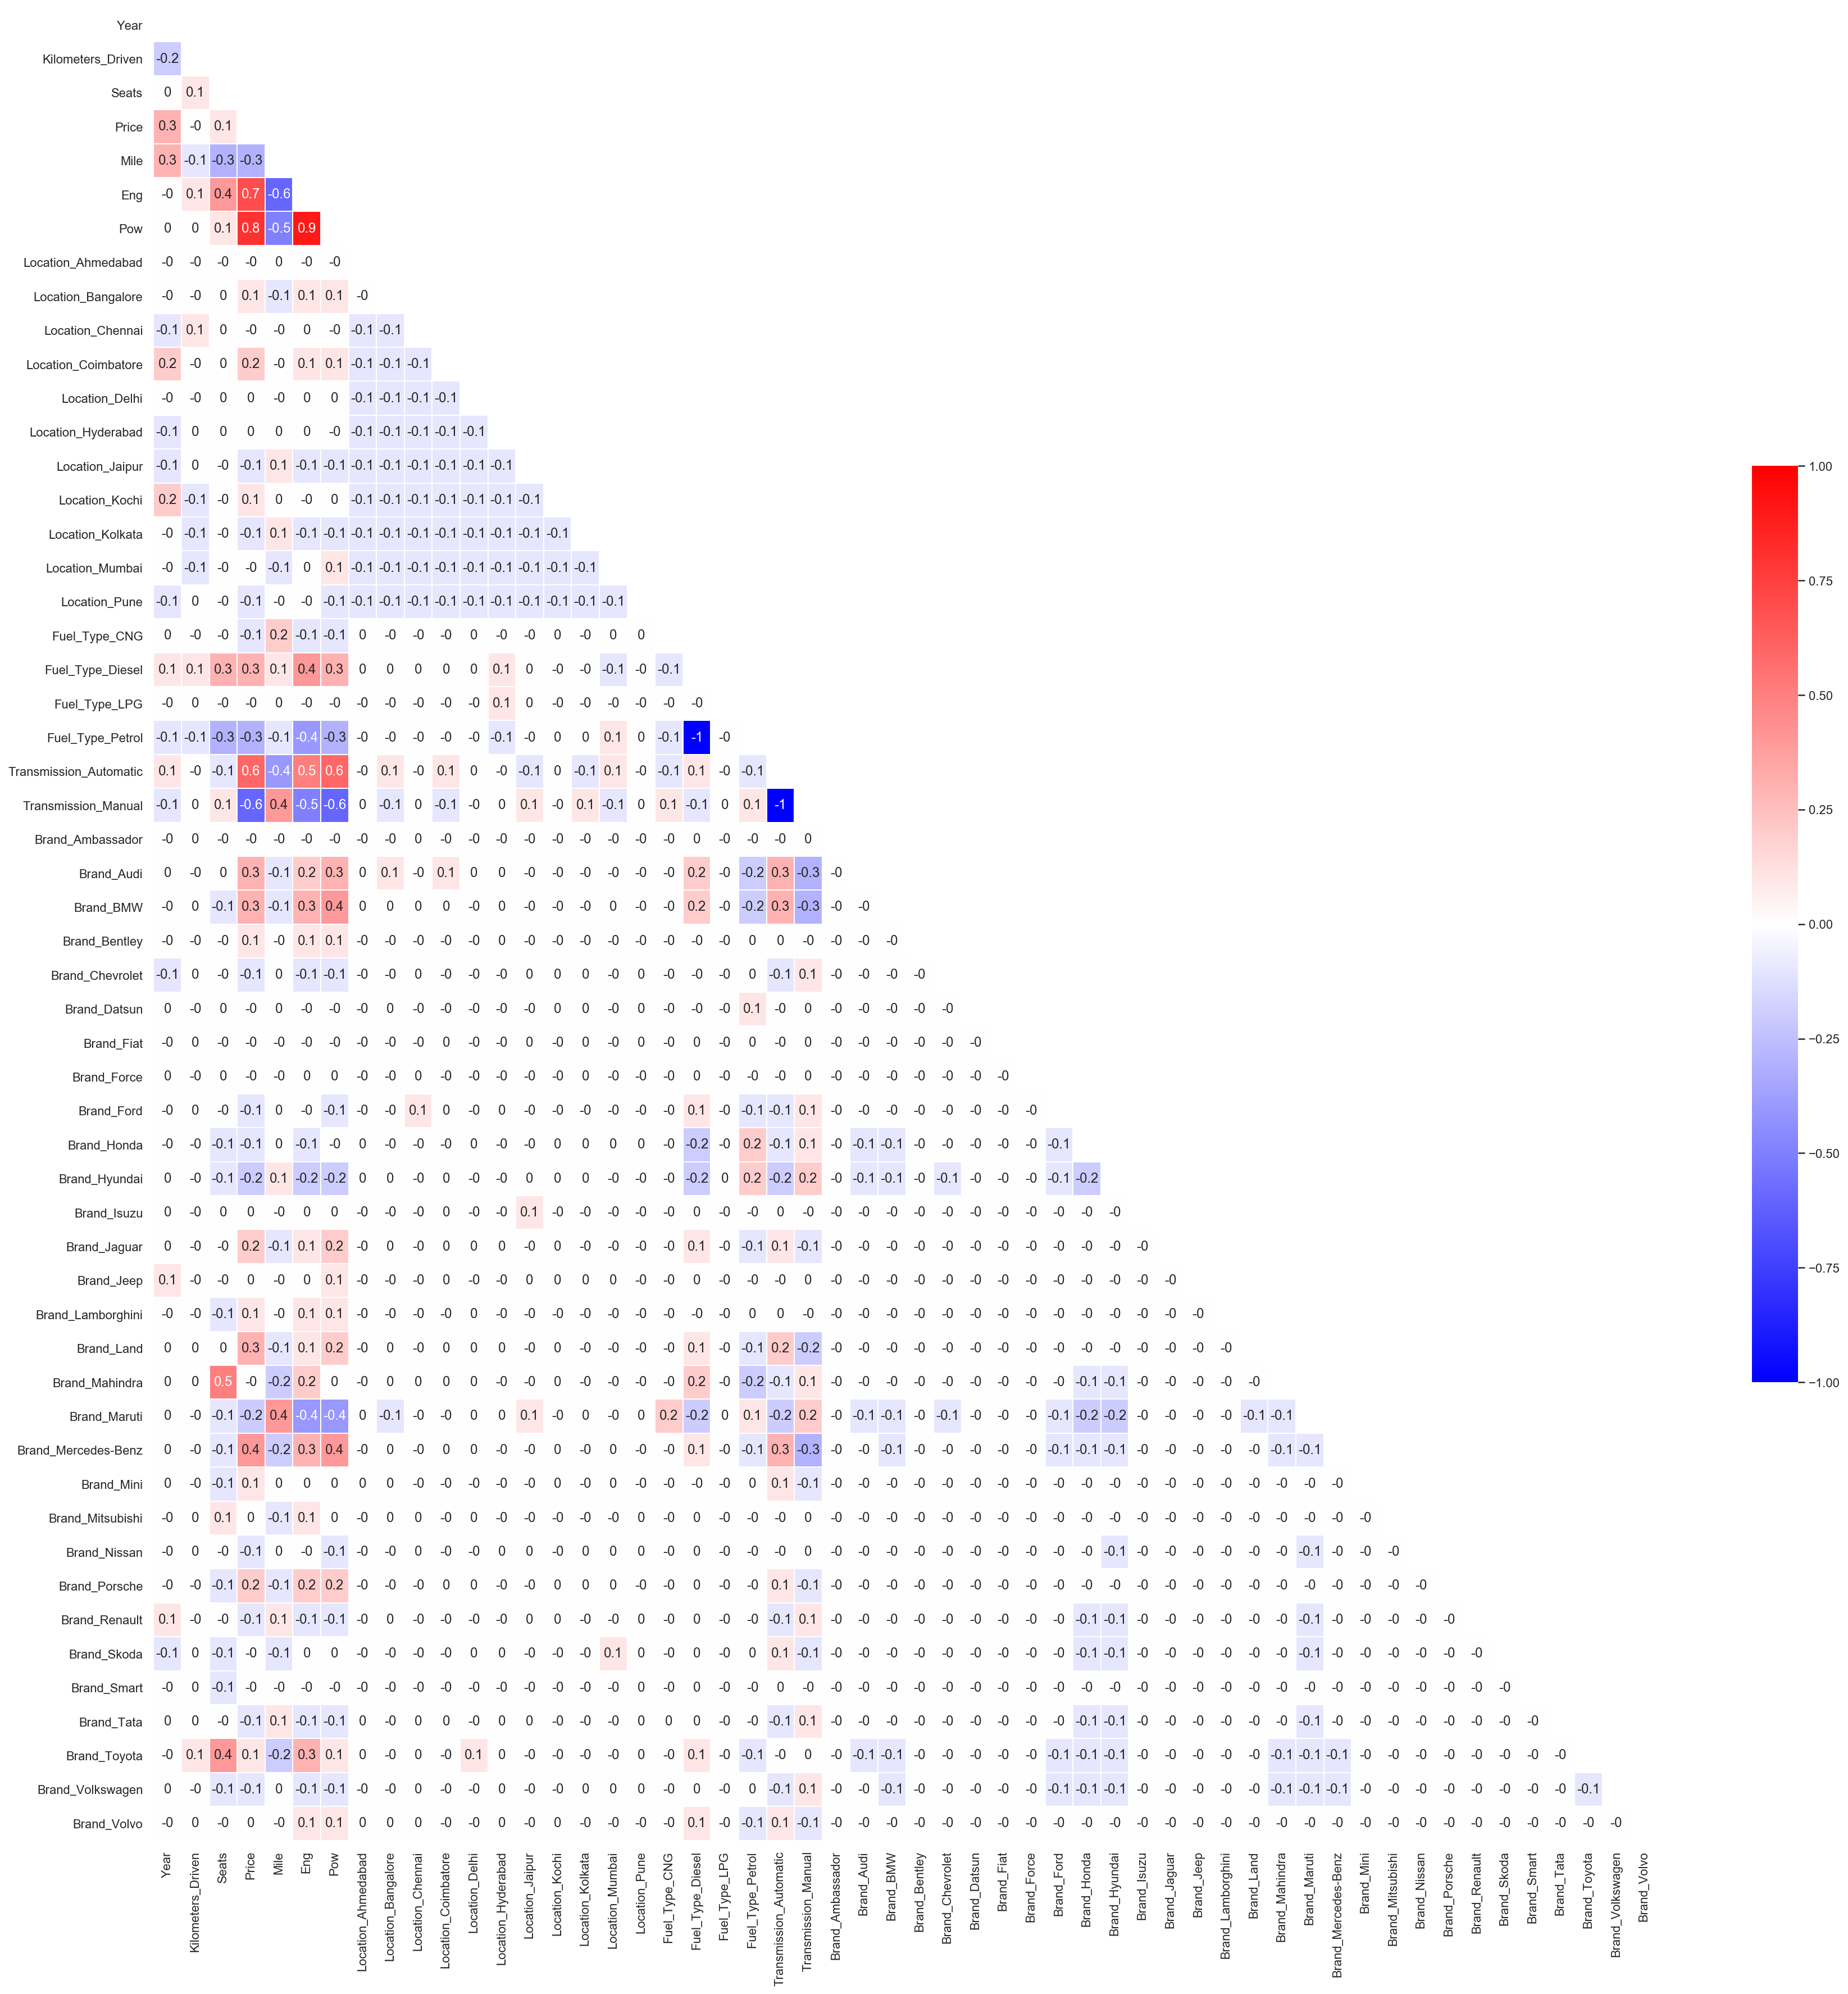

In [151]:
# 모든 컬럼을 변수로 히트맵
df = car_td.corr().round(1)

fig, ax = plt.subplots(figsize=(30,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

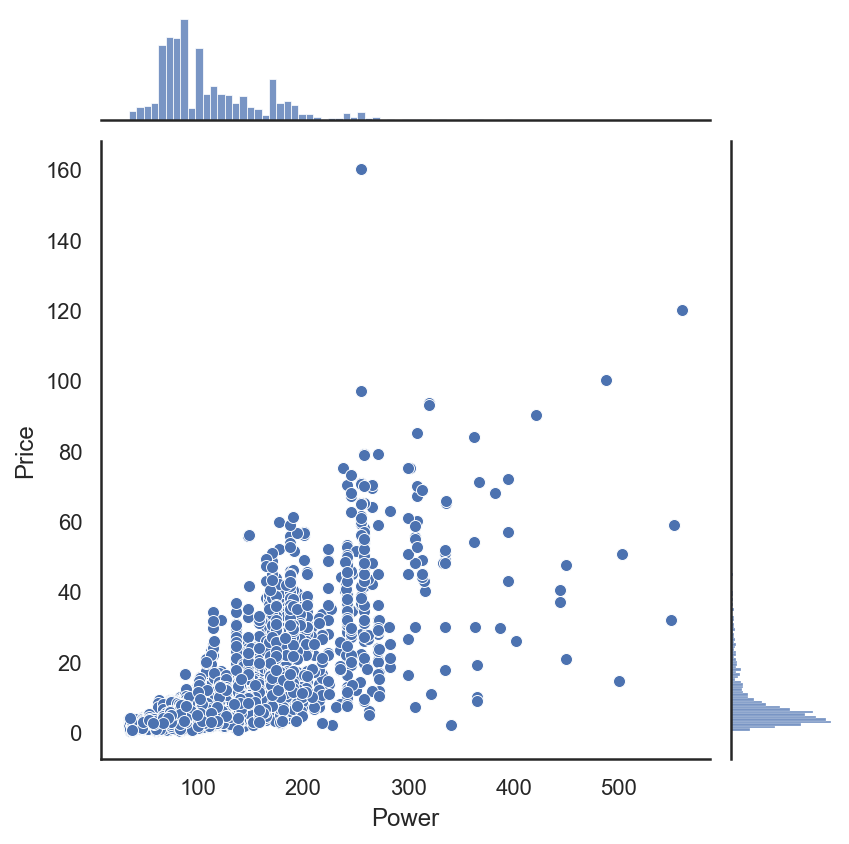

In [47]:
joint = sns.jointplot(x='Pow',y='Price',data=car_td)
joint.set_axis_labels(xlabel='Power',ylabel='Price')

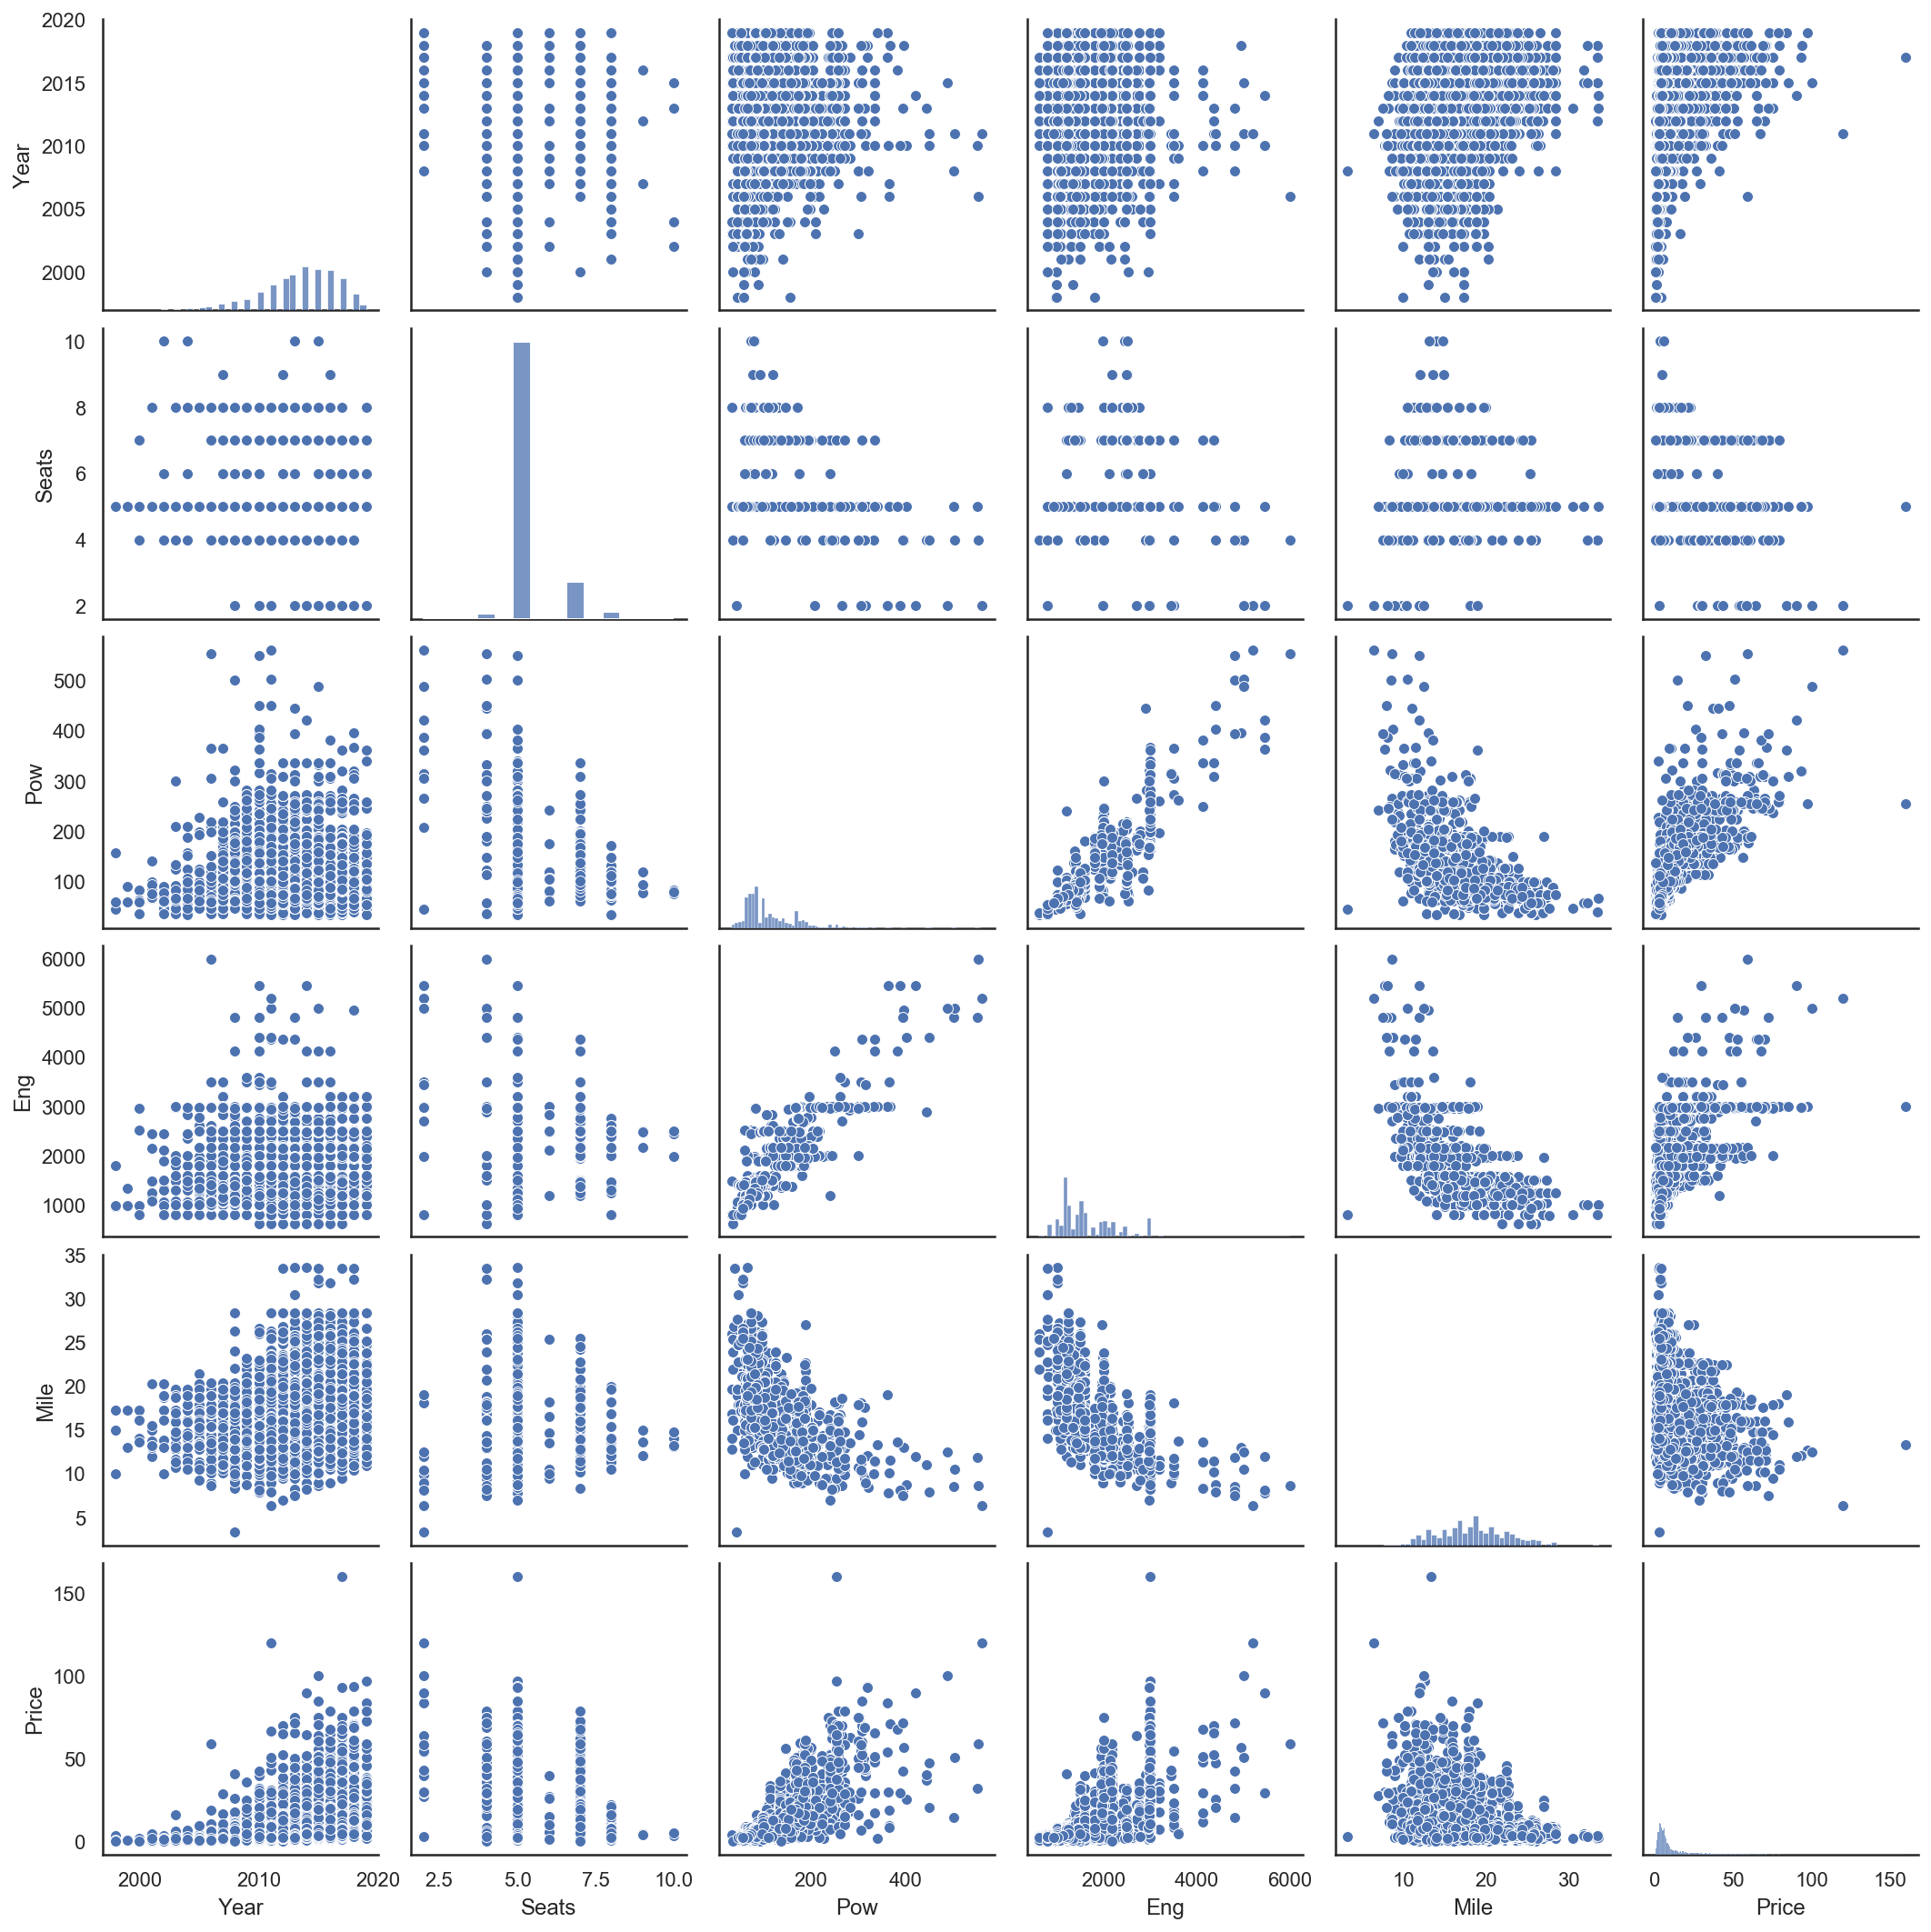

In [48]:
sns.pairplot(data=car_td[['Year','Seats','Pow', 'Eng', 'Mile', 'Price']])

# LinearRegression 모델

In [49]:
# linear 모델 결과 확인
def get_results(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred_test = reg.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [50]:
def get_results_rf(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    pred_test = rf.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

## 1. new Price가 있는 데이터

In [51]:
car_td

Year  Kilometers_Driven  Seats  Price                    Car_name  \
0     2010              72000      5   1.75             Wagon R LXI CNG   
1     2015              41000      5  12.50    Creta 1.6 CRDi SX Option   
2     2011              46000      5   4.50                      Jazz V   
3     2012              87000      7   6.00                  Ertiga VDI   
4     2013              40670      5  17.74  A4 New 2.0 TDI Multitronic   
...    ...                ...    ...    ...                         ...   
6012  2014              27365      5   4.75                   Swift VDI   
6013  2015             100000      5   4.00            Xcent 1.1 CRDi S   
6014  2012              55000      8   2.90                Xylo D4 BSIV   
6015  2013              46000      5   2.65                 Wagon R VXI   
6016  2011              47000      5   2.50                 Beat Diesel   

       Mile     Eng     Pow  New_p  Location_Ahmedabad  Location_Bangalore  \
0     26.60   998.0   58.16   0.00                   0                   0   
1     19.67  1582.0  126.20   0.00                   0                   0   
2     18.20  1199.0   88.70   8.61                   0                   0   
3     20.77  1248.0   88.76   0.00                   0                   0   
4     15.20  1968.0  140.80   0.00                   0                   0   
...     ...     ...     ...    ...                 ...                 ...   
6012  28.40  1248.0   74.00   7.88                   0                   0   
6013  24.40  1120.0   71.00   0.00                   0                   0   
6014  14.00  2498.0  112.00   0.00                   0                   0   
6015  18.90   998.0   67.10   0.00                   0                   0   
6016  25.44   936.0   57.60   0.00                   0                   0   

      Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                    0                    0               0   
1                    0                    0               0   
2                    1                    0               0   
3                    1                    0               0   
4                    0                    1               0   
...                ...                  ...             ...   
6012                 0                    0               1   
6013                 0                    0               0   
6014                 0                    0               0   
6015                 0                    0               0   
6016                 0                    0               0   

      Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
0                      0                0               0                 0   
1                      0                0               0                 0   
2                      0                0               0                 0   
3                      0                0               0                 0   
4                      0                0               0                 0   
...                  ...              ...             ...               ...   
6012                   0                0               0                 0   
6013                   0                1               0                 0   
6014                   0                1               0                 0   
6015                   0                0               0                 1   
6016                   1                0               0                 0   

      Location_Mumbai  Location_Pune  Fuel_Type_CNG  Fuel_Type_Diesel  \
0                   1              0              1                 0   
1                   0              1              0                 1   
2                   0              0              0                 0   
3                   0              0              0                 1   
4                   0              0              0                 1   
...               ...   

In [52]:
car_td_new = car_td[car_td['New_p'] != 0]
car_td_new.reset_index(drop=True, inplace=True)
X = car_td_new.drop(['Car_name','Price'],axis=1)
y = car_td_new['Price']

get_results(X,y)

explained_variance_score: 0.8100720074550669
mean_squared_errors: 33.786583212357115
r2_score: 0.8099473514961424


In [53]:
car_td_new.head(1)

Year  Kilometers_Driven  Seats  Price Car_name  Mile     Eng   Pow  New_p  \
0  2011              46000      5    4.5   Jazz V  18.2  1199.0  88.7   8.61   

   Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0                   0                   0                 1   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                0              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 1   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            1              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             0                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

## 2. new Price가 없는 데이터

In [54]:
def get_results2(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    
    return(mean_squared_error(pred_test, y_test))

In [55]:
# ls_1000 = []

# for _ in range(0,10000):
#     car_8s = car_td[car_td['New_p'] == 0].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Car_name','Price'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

# ls_1000_pd = pd.DataFrame(ls_1000)

# len(ls_1000_pd[ls_1000_pd[0]>=46])/10000*100

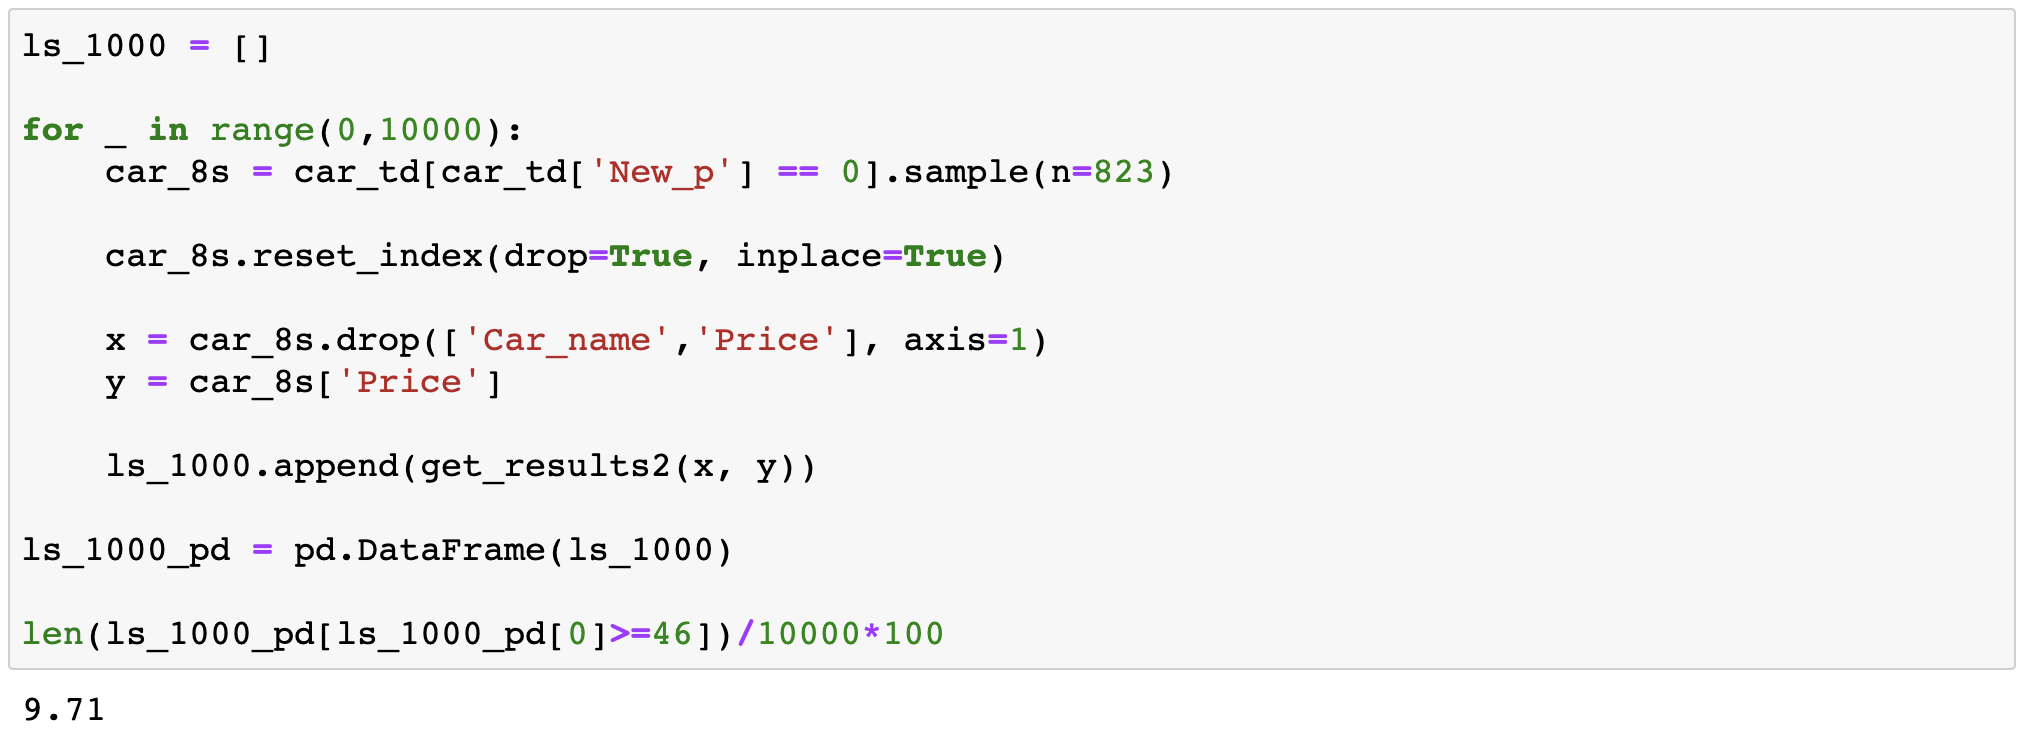

In [56]:
# new price columns 삭제

In [57]:
car_td.drop(['New_p'], axis=1, inplace=True)

In [58]:
X = car_td.drop(['Car_name', 'Price', 'Seats'], axis=1)
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7846017132495814
mean_squared_errors: 27.21974660384275
r2_score: 0.7835985970265971


## 3. 다중공선성

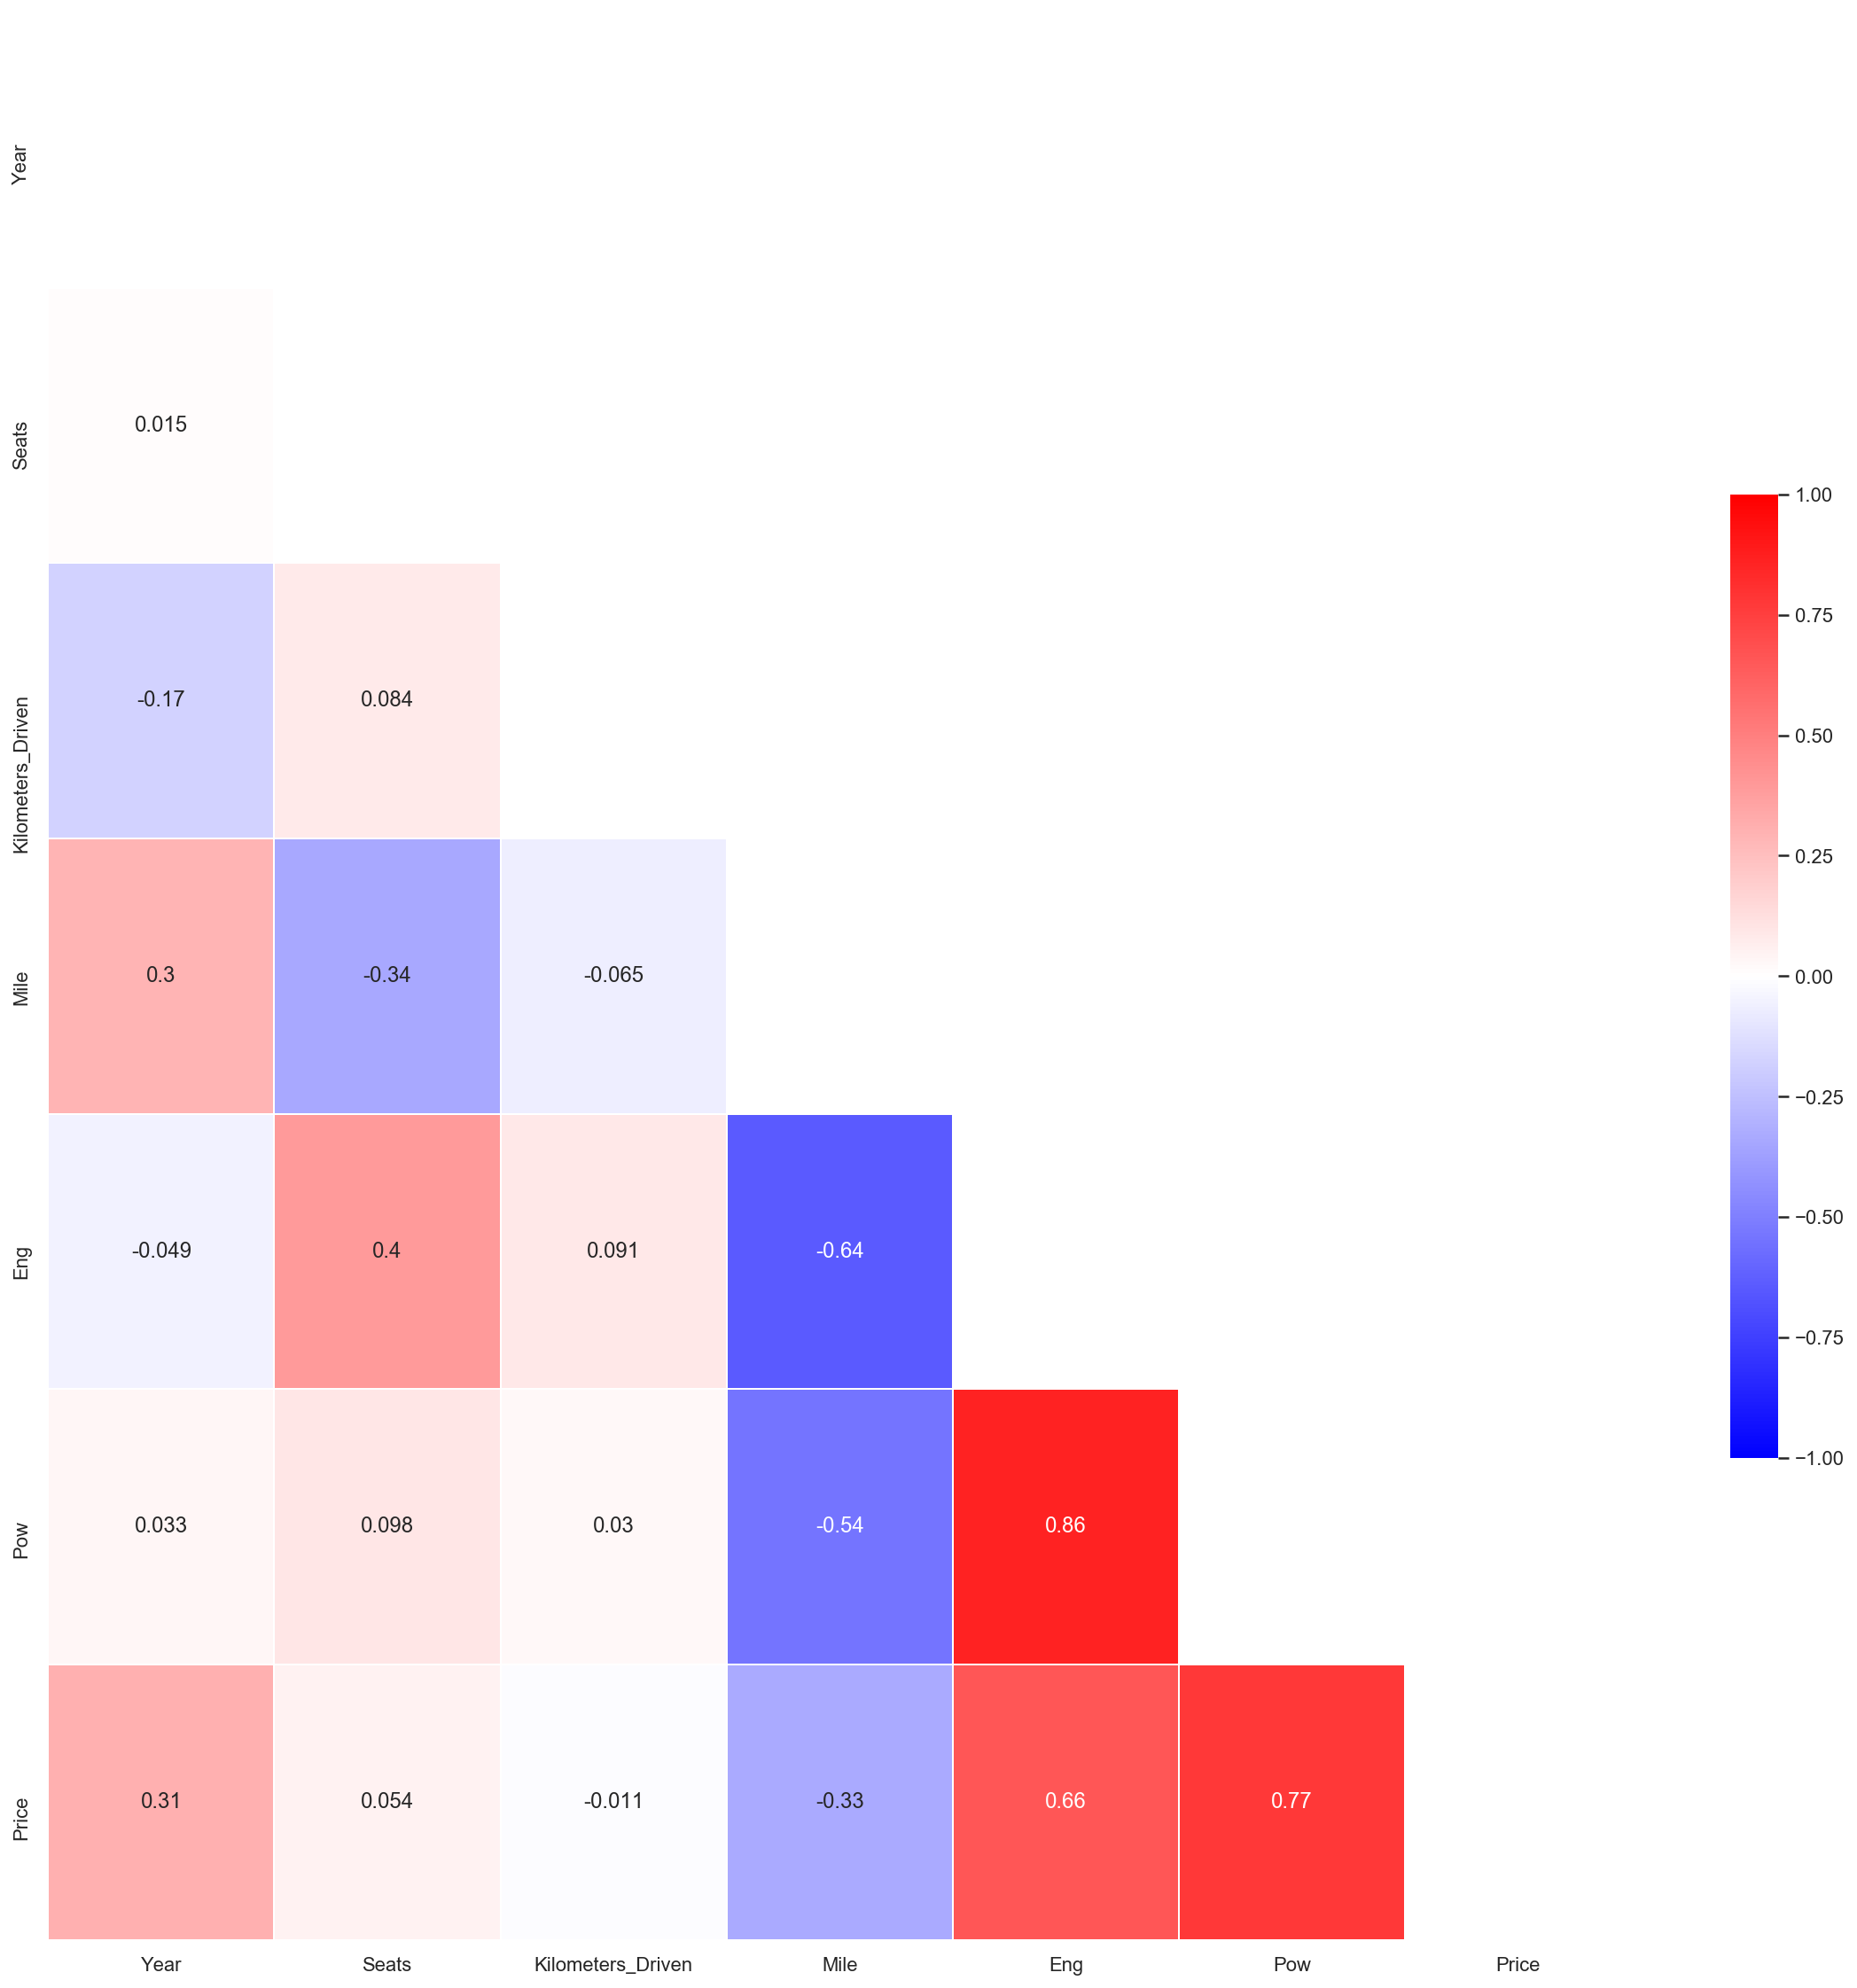

In [59]:
df = car_td[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()

fig, ax = plt.subplots(figsize=(20,20))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

In [60]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7855616598004009
mean_squared_errors: 27.08237664460512
r2_score: 0.7846907104962069


In [61]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9246493048682116
mean_squared_errors: 0.011452974939501334
r2_score: 0.9246452582504397


In [62]:
math.pow(10,0.011452974939501334)

1.0267222529814608

In [63]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Pow'], axis=1) # Pow제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7650144625271635
mean_squared_errors: 29.692204701983314
r2_score: 0.7639421538929554


In [64]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Pow'], axis=1) # Pow제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9130838043644021
mean_squared_errors: 0.013210194794038236
r2_score: 0.9130836466136999


## 4. Scaler

### 4-1 MinMaxScaler

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
mm = MinMaxScaler()
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7855616598012627
mean_squared_errors: 27.082376644497415
r2_score: 0.7846907104970631


In [67]:
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7560585960173081
mean_squared_errors: 30.80677156611781
r2_score: 0.7550811664408414


### 4-2 StandardScaler

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
ss = StandardScaler()
X = ss.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: -3.407096772648218e+24
mean_squared_errors: 4.2879431096496386e+26
r2_score: -3.408984360887913e+24


### 4-3 RobustScaler

In [70]:
from sklearn.preprocessing import RobustScaler

In [71]:
rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7855616598012631
mean_squared_errors: 27.082376644497437
r2_score: 0.784690710497063


In [72]:
rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7560585632476541
mean_squared_errors: 30.80676040044397
r2_score: 0.7550812552097605


## 5. 정확도

In [73]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.7671415608719593
Accuracy on Testing set:  0.7846907104962069


In [74]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.9242938029667036
Accuracy on Testing set:  0.9246452582504397


## 6. cross validation

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [76]:
skf = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5)

In [77]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

In [78]:
reg = LinearRegression()

In [79]:
cross_validate(reg, X, y, cv=kf)

{'fit_time': array([0.01577401, 0.01315618, 0.01416087, 0.01402903, 0.01197267]),
 'score_time': array([0.00302005, 0.00314403, 0.00355315, 0.00309467, 0.00295711]),
 'test_score': array([0.77979944, 0.60609284, 0.7781031 , 0.70929998, 0.78724735])}

In [80]:
score = cross_val_score(reg, X, y, cv=kf)
score.mean()

0.7321085436886486

In [81]:
# 로그변환

In [82]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

In [83]:
reg = LinearRegression()

In [84]:
cross_validate(reg, X, y, cv=kf)

{'fit_time': array([0.0152719 , 0.01275802, 0.01403999, 0.01254392, 0.0116179 ]),
 'score_time': array([0.00292516, 0.00367713, 0.00308919, 0.00295877, 0.00289607]),
 'test_score': array([0.93129577, 0.89337362, 0.9128456 , 0.92205216, 0.92577189])}

In [85]:
score = cross_val_score(reg, X, y, cv=kf)
score.mean()

0.9170678071131488

In [86]:
# RandomForest

In [87]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

rf = RandomForestRegressor()

cross_validate(rf, X, y, cv=kf)

{'fit_time': array([1.68255997, 1.60892892, 1.61322999, 1.62671781, 1.6211729 ]),
 'score_time': array([0.04772711, 0.03043008, 0.03022599, 0.0317359 , 0.03061008]),
 'test_score': array([0.94731022, 0.90320788, 0.93417666, 0.94433684, 0.94090576])}

In [88]:
score = cross_val_score(rf, X, y, cv=kf)
score.mean()

0.934940821446428

## 7. columns 제거

In [89]:
'Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'

('Fuel_Type_CNG',
 'Fuel_Type_LPG',
 'Brand_Smart',
 'Brand_Bentley',
 'Brand_Lamborghini',
 'Brand_Ambassador',
 'Brand_Isuzu',
 'Brand_Force',
 'Brand_Datsun',
 'Brand_Jeep',
 'Brand_Porsche',
 'Brand_Volvo',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Fiat',
 'Brand_Jaguar',
 'Brand_Land',
 'Brand_Nissan')

In [90]:
# Nissan             91
# Land               60
# Jaguar             40
# Fiat               28
# Mitsubishi         27
# Mini               26
# Volvo              21
# Porsche            18
# Jeep               15
# Datsun             13
# Force               3
# Isuzu               3
# Bentley             1
# Lamborghini         1
# Ambassador          1
# Smart               1

In [91]:
# Maruti           1211
# Hyundai          1107
# Honda             608
# Toyota            410
# Mercedes-Benz     318
# Volkswagen        315
# Ford              300
# Mahindra          271
# BMW               267
# Audi              236
# Tata              186
# Skoda             173
# Renault           145
# Chevrolet         121

---

## MSE

In [92]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7855616598004009
mean_squared_errors: 27.08237664460512
r2_score: 0.7846907104962069


In [93]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9246493048682116
mean_squared_errors: 0.011452974939501334
r2_score: 0.9246452582504397


In [94]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results_rf(X, y)

explained_variance_score: 0.91628747269937
mean_squared_errors: 10.532895814946096
r2_score: 0.9162617688951875


In [143]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results_rf(X, y)

explained_variance_score: 0.9437807409508661
mean_squared_errors: 0.008549150098297379
r2_score: 0.9437509466982666


In [96]:
math.pow(10,0.008589203873942151)

1.019974240740009

# 브랜드별 그래프

In [97]:
car_t['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [98]:
car_t = car_t[(car_t['Fuel_Type'] == 'Diesel') | (car_t['Fuel_Type'] == 'Petrol')]

In [99]:
car_t['Fuel_Type'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [100]:
def get_Brand_df(Brand):
    car = car_t[car_t['Brand'] == Brand]

    car.reset_index(drop=True, inplace=True)

    car['Owner'] = range(0,len(car))

    for i in range(0,len(car)):
        if car['Owner_Type'][i] == 'First':
            car['Owner'][i] = 1

        elif car['Owner_Type'][i] == 'Second':
            car['Owner'][i] = 2

        elif car['Owner_Type'][i] == 'Third':
            car['Owner'][i] = 3

        elif car['Owner_Type'][i] == 'Fourth & Above':
            car['Owner'][i] = 4

    car = pd.get_dummies(car, columns=['Location','Fuel_Type', 'Transmission'])

    car = car.drop(['Name', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'New_p'], axis=1)

    return(car)

In [101]:
def get_graph(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    predicted = reg.predict(X_test)

    actual = y_test

    act_df = pd.DataFrame(actual)
    pred_df = pd.DataFrame(predicted)

    act_df.reset_index(inplace=True)

    act_pred_df = pd.concat([act_df, pred_df], axis=1)

    act_pred_df.columns = ['index','actual', 'predicted']

    plt.figure(figsize=(15,10))
    plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

    plt.xlabel('predicted', fontsize=14)

    plt.ylabel('actual', fontsize=14)
    plt.axis([0, 10, 0, 10])  
    line = plt.plot([0,10], [0,10])
    plt.setp(line, color='r', linewidth=3.0)

    plt.show()

In [206]:
def get_graph_rf(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)

    predicted = rf_reg.predict(X_test)

    actual = y_test

    act_df = pd.DataFrame(actual)
    pred_df = pd.DataFrame(predicted)

    act_df.reset_index(inplace=True)

    act_pred_df = pd.concat([act_df, pred_df], axis=1)

    act_pred_df.columns = ['index','actual', 'predicted']

    plt.figure(figsize=(15,10))
    plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

    plt.xlabel('predicted', fontsize=14)

    plt.ylabel('actual', fontsize=14)
    plt.title(i, fontsize=20, y=1.05)
    plt.axis([0, 2, 0, 2])  
    line = plt.plot([0,2], [0,2])
    plt.setp(line, color='r', linewidth=3.0)

    plt.show()

Hyundai
explained_variance_score: 0.9216861851764786
mean_squared_errors: 0.005307451150954077
r2_score: 0.9216829842454981
None


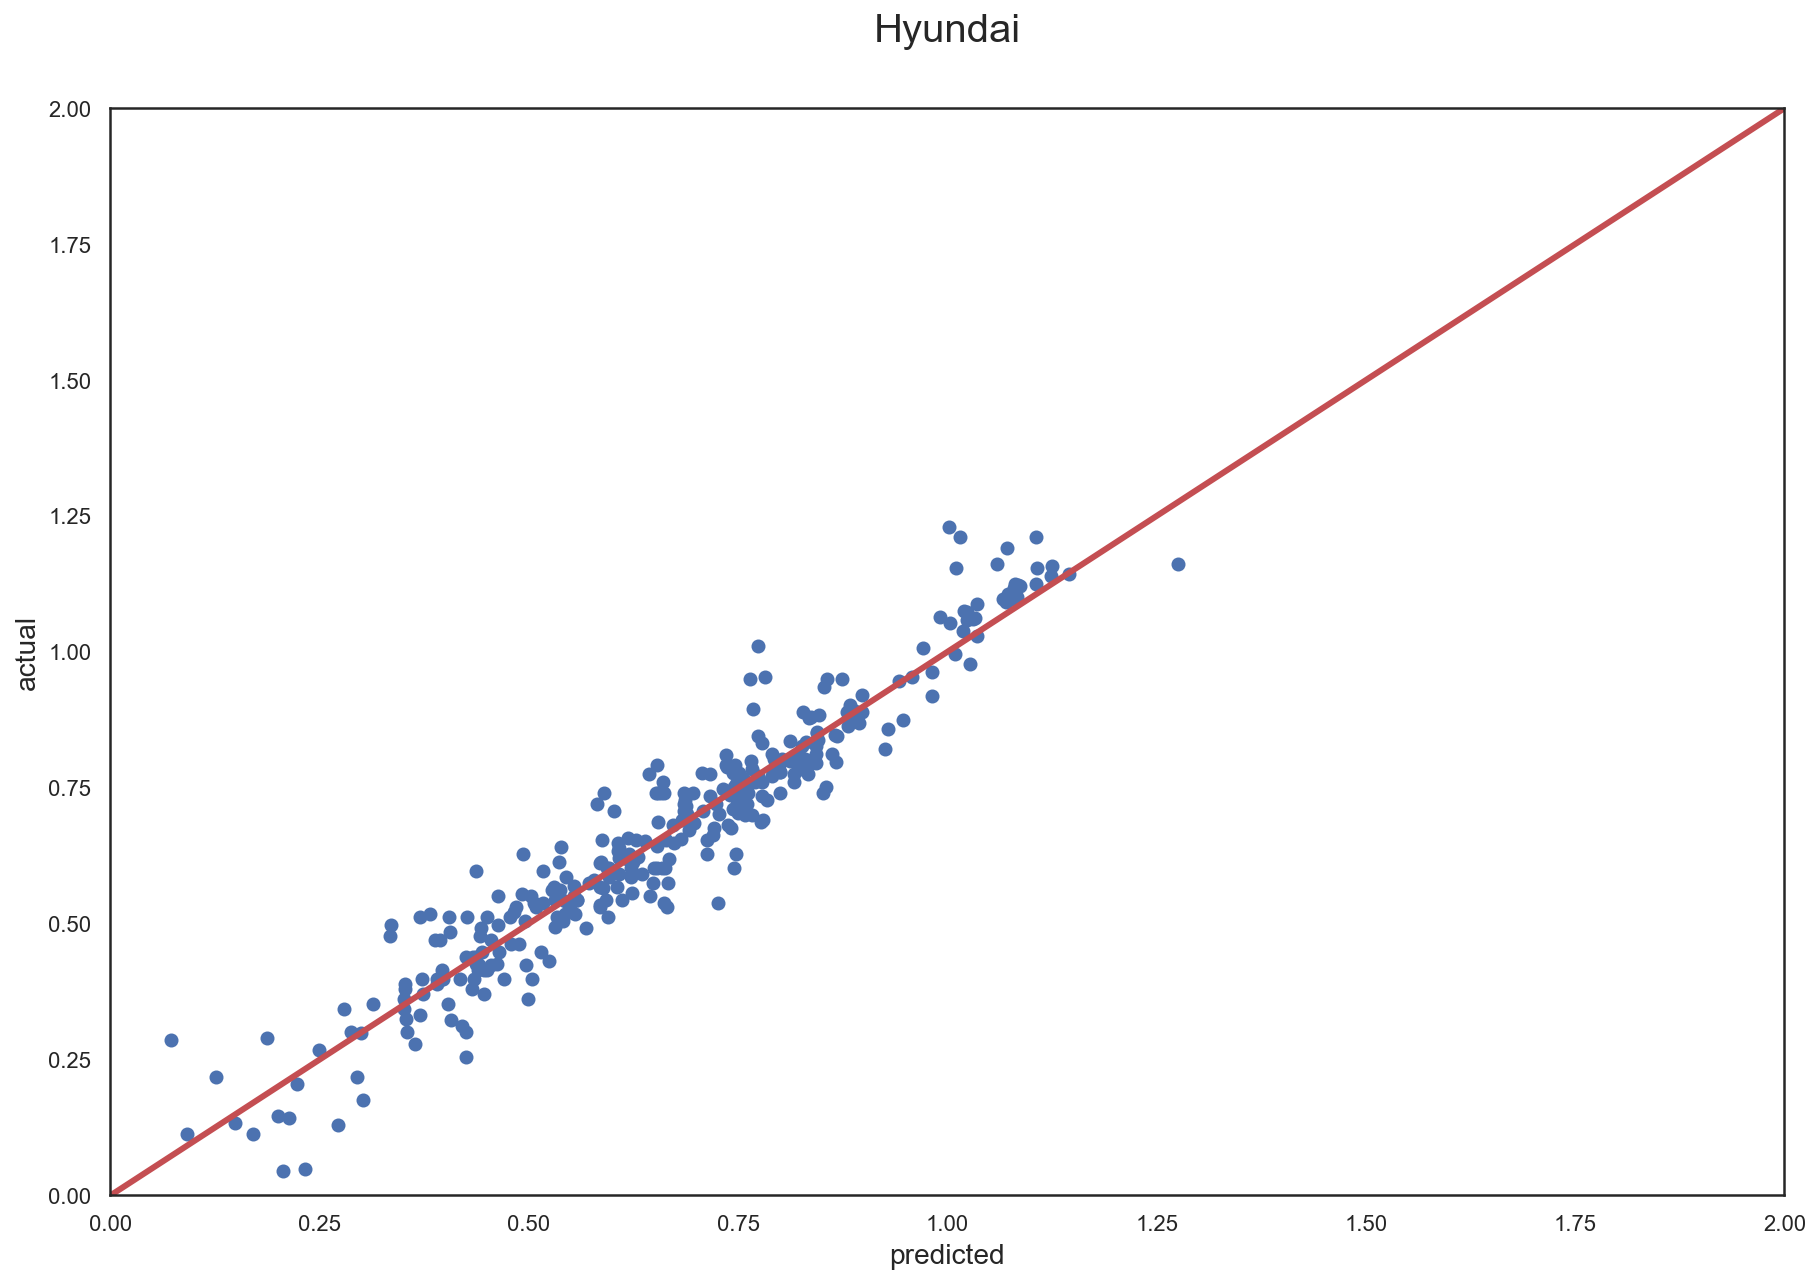

None
Honda
explained_variance_score: 0.8331014232242339
mean_squared_errors: 0.007137982612635104
r2_score: 0.8327692222697538
None


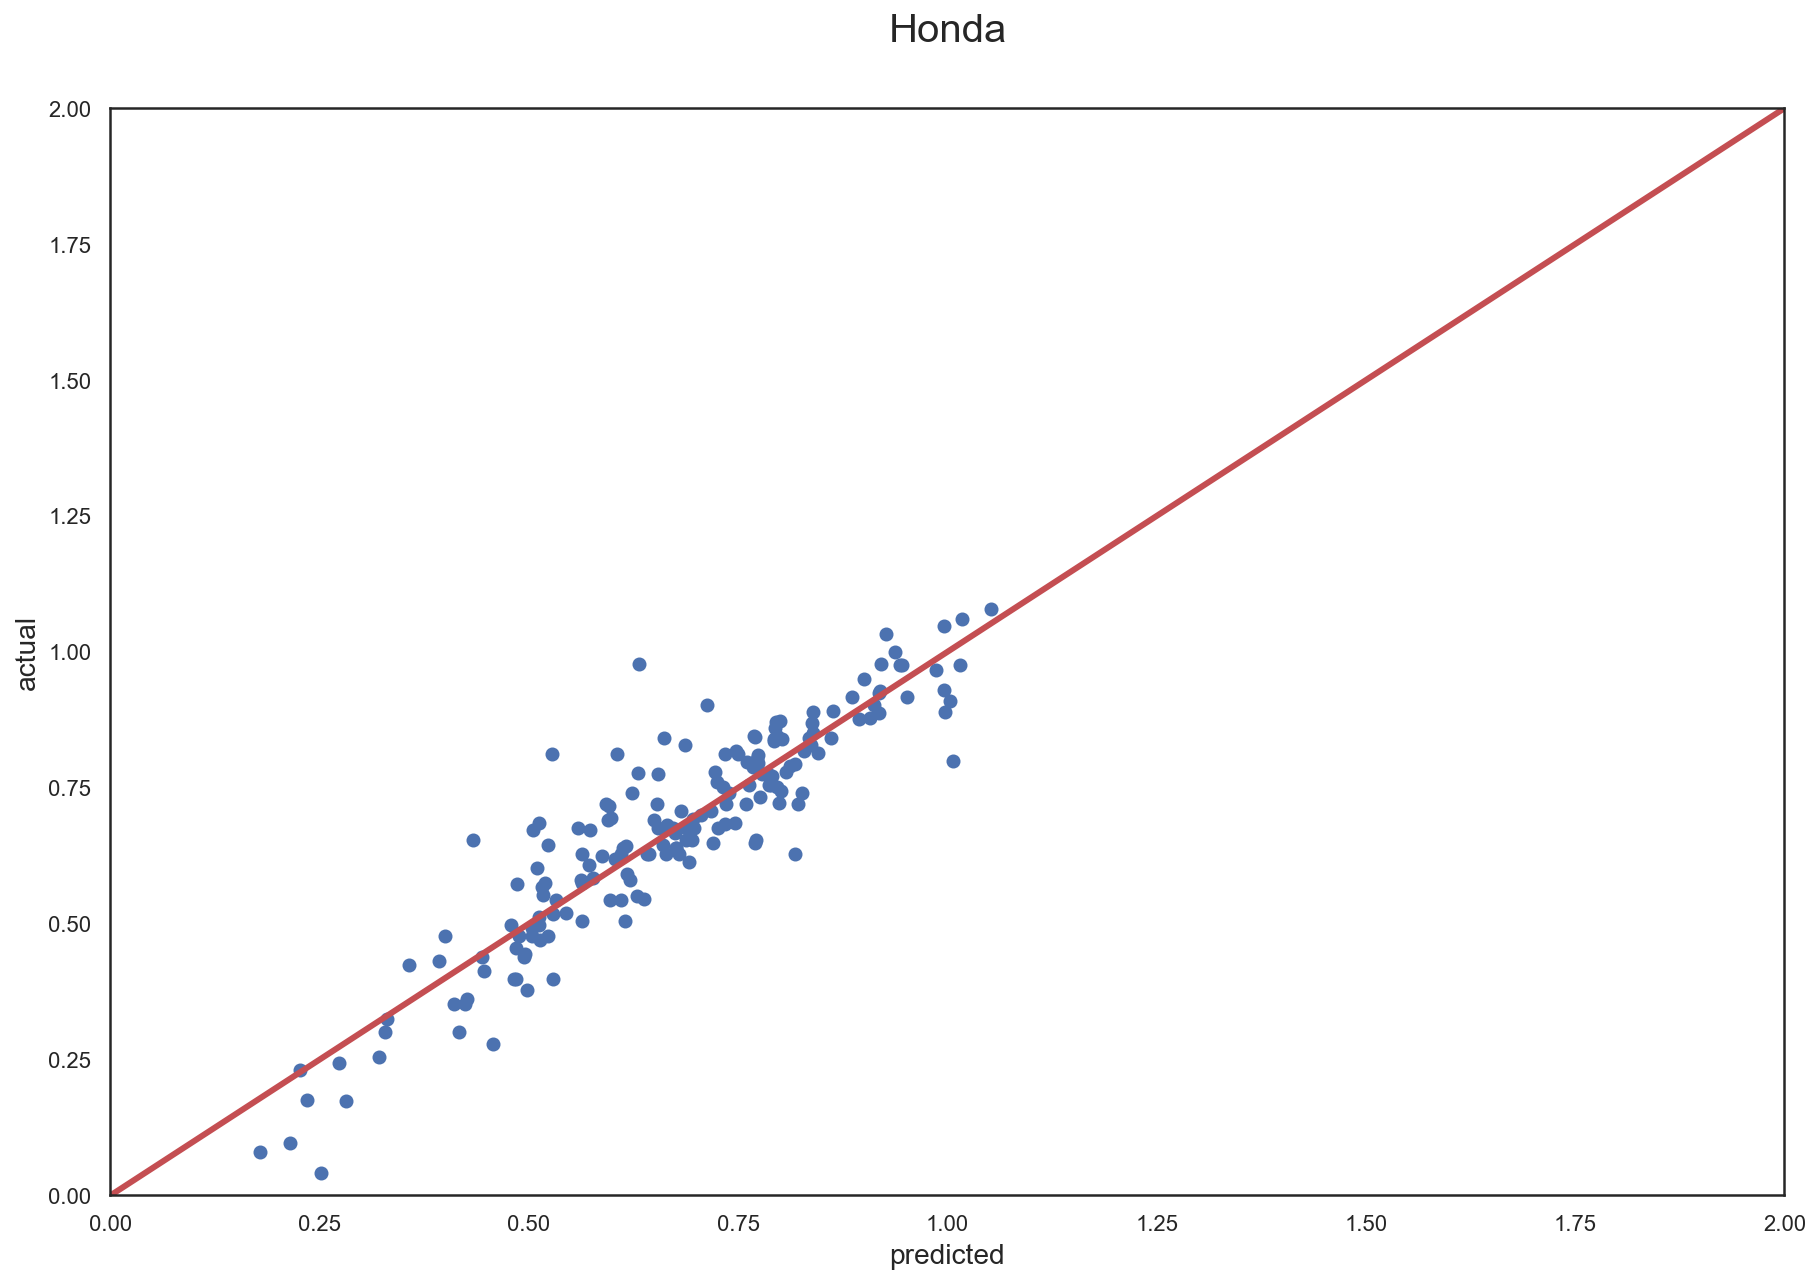

None
Maruti
explained_variance_score: 0.9297862298607137
mean_squared_errors: 0.004561667946477854
r2_score: 0.9297854579543899
None


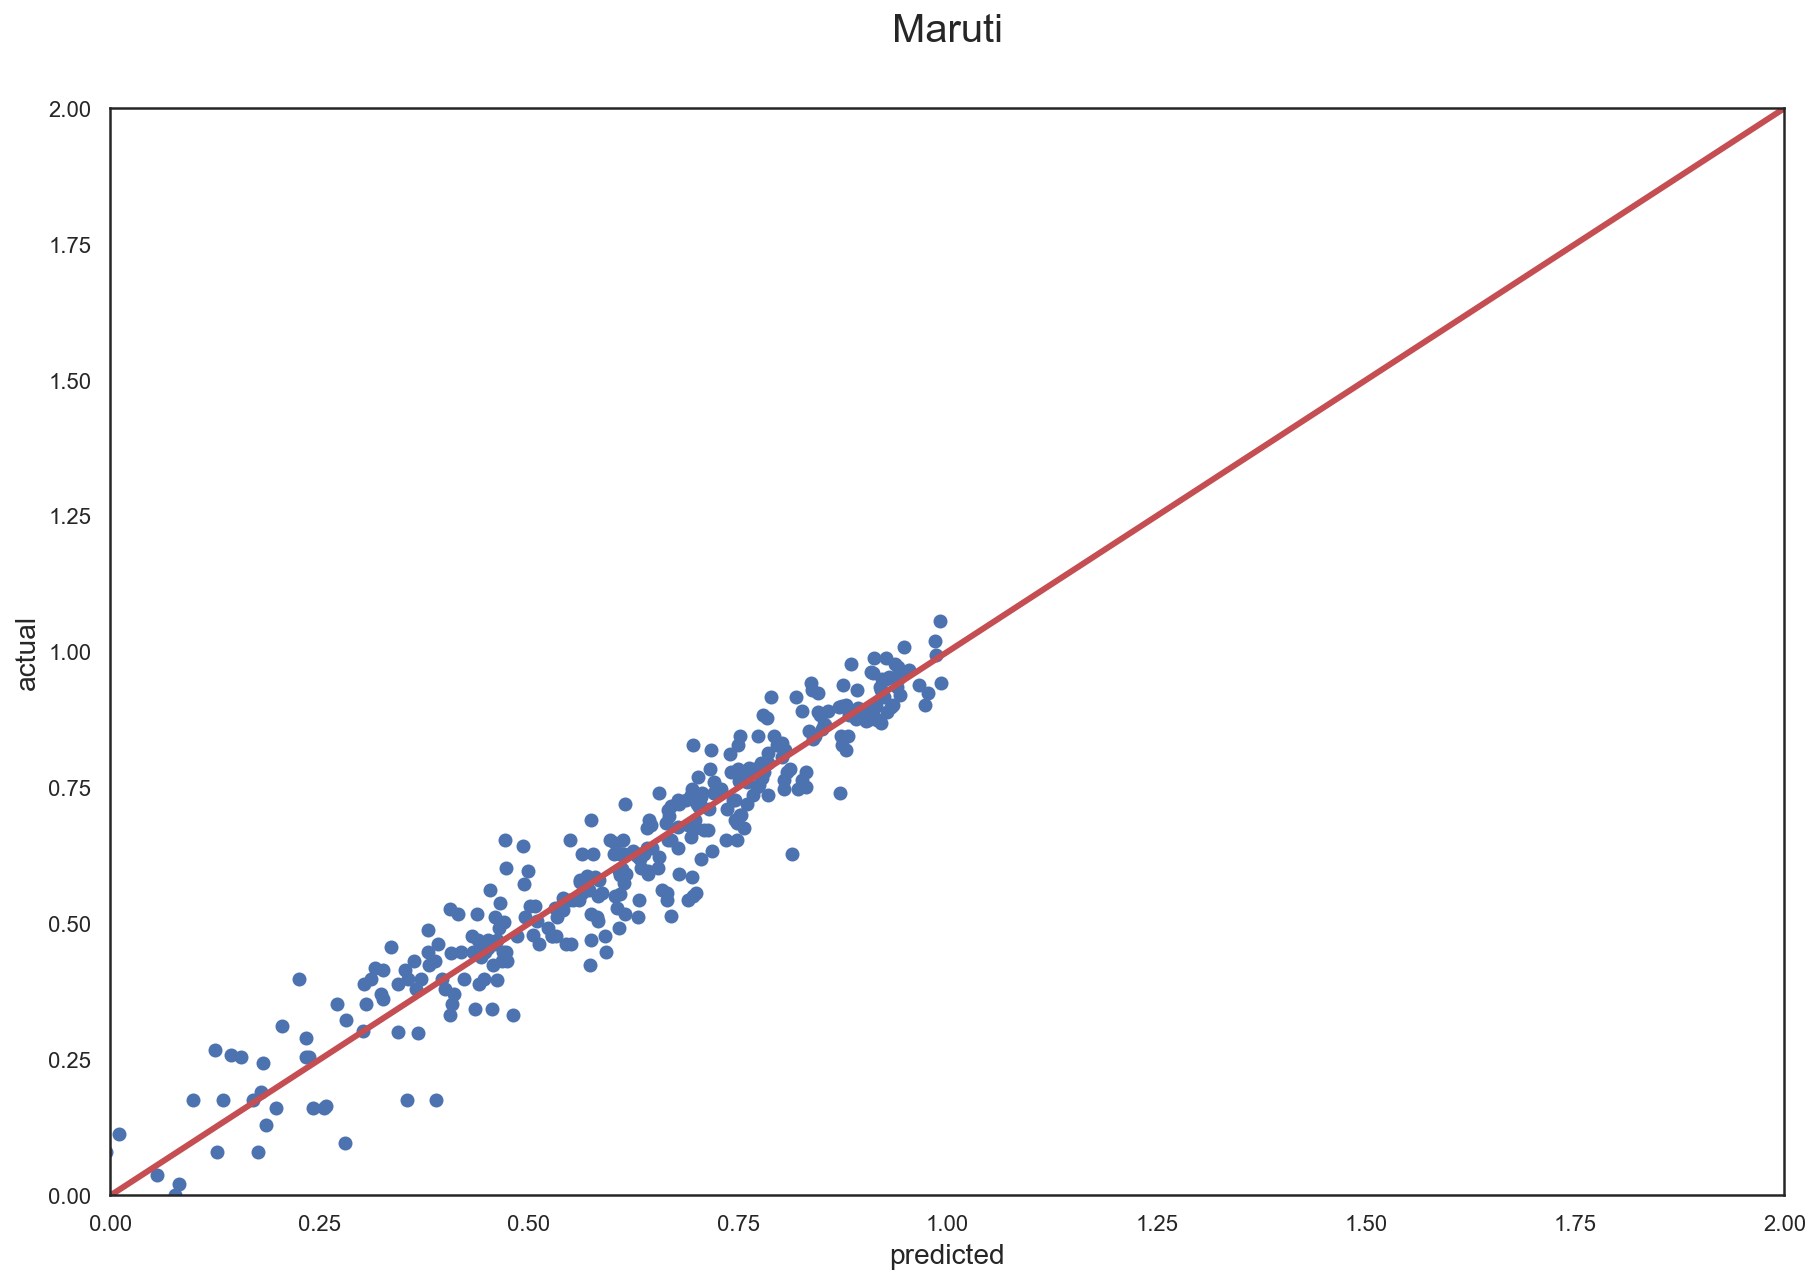

None
Audi
explained_variance_score: 0.8064244636492357
mean_squared_errors: 0.00841772500433908
r2_score: 0.8049091995558041
None


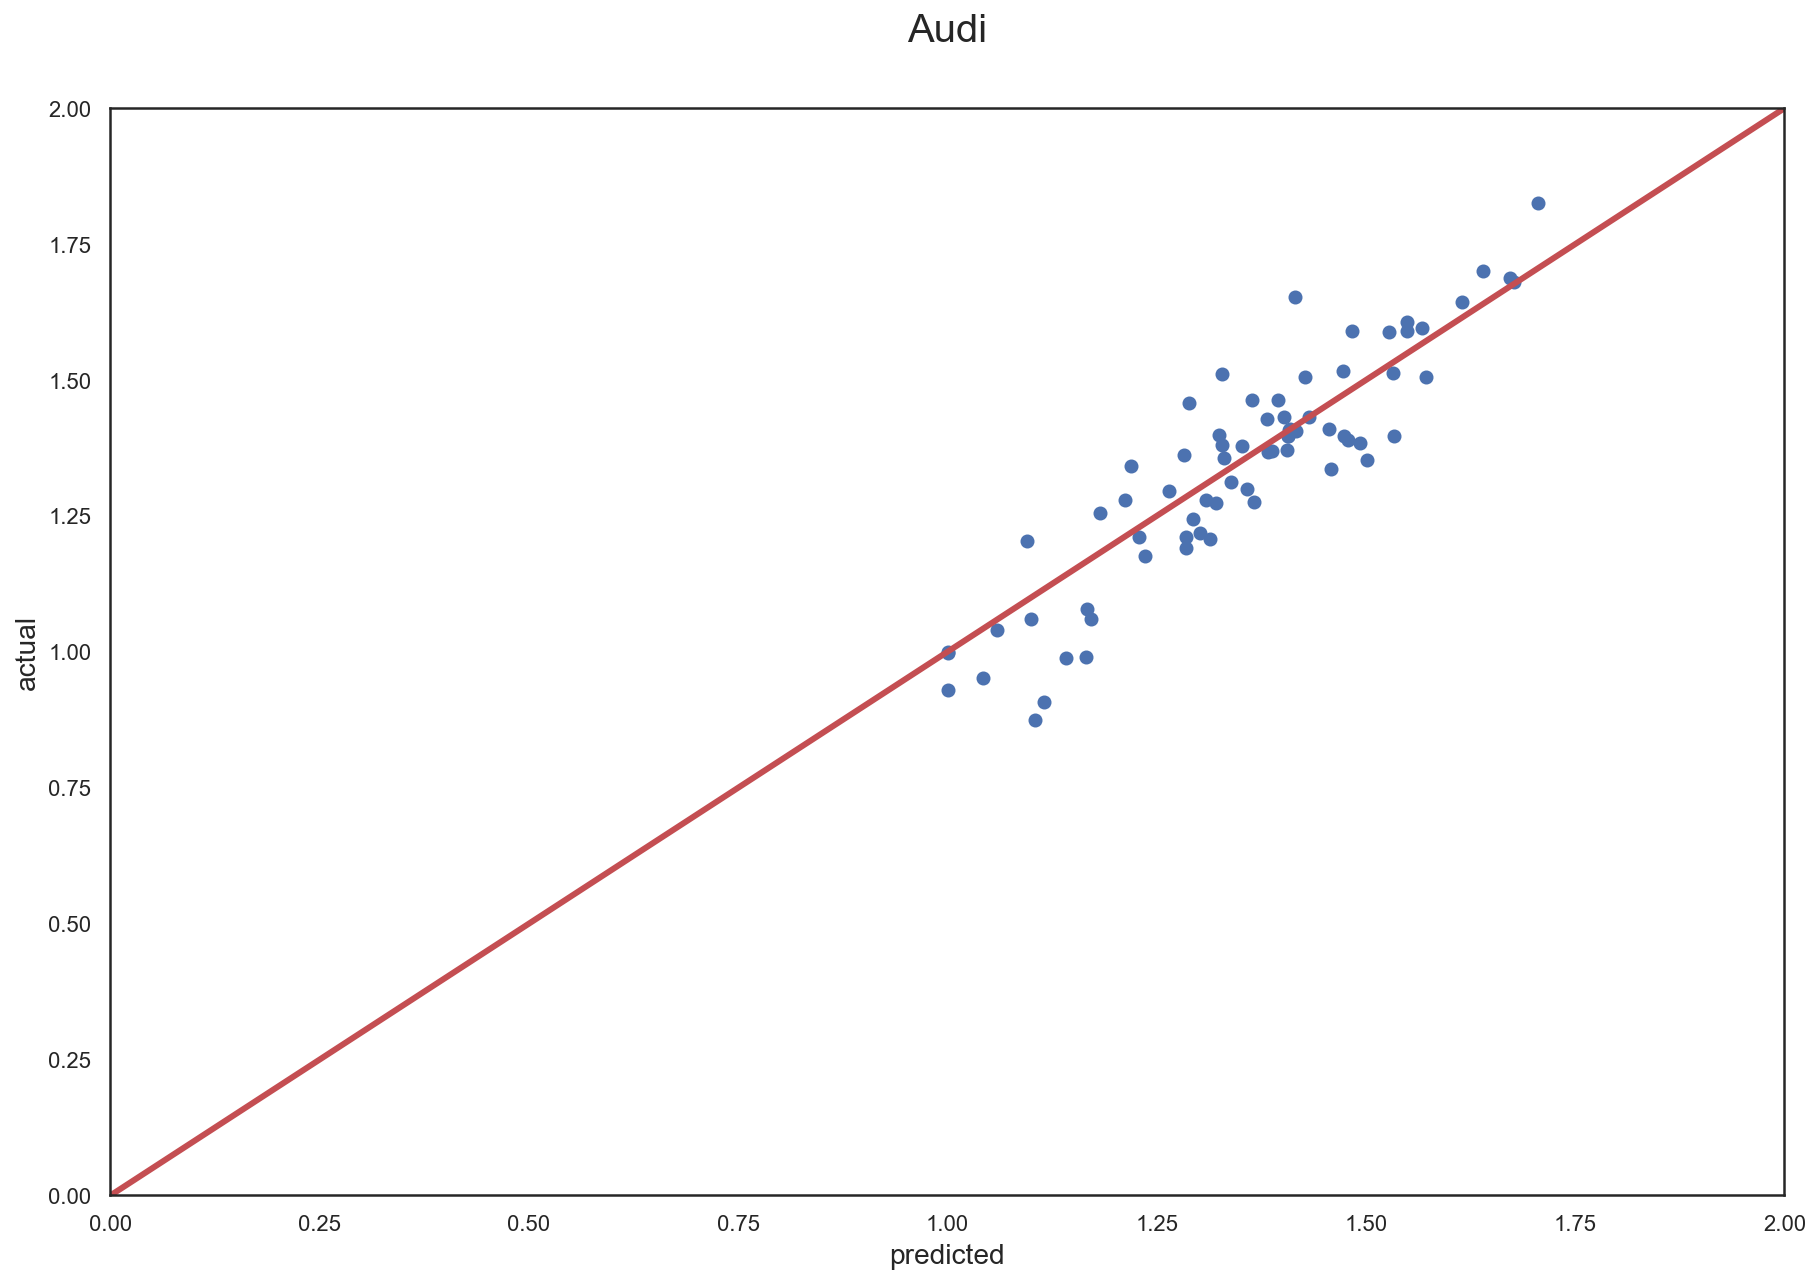

None
Nissan
explained_variance_score: 0.4994565355920382
mean_squared_errors: 0.012575197225083174
r2_score: 0.44633123110252293
None


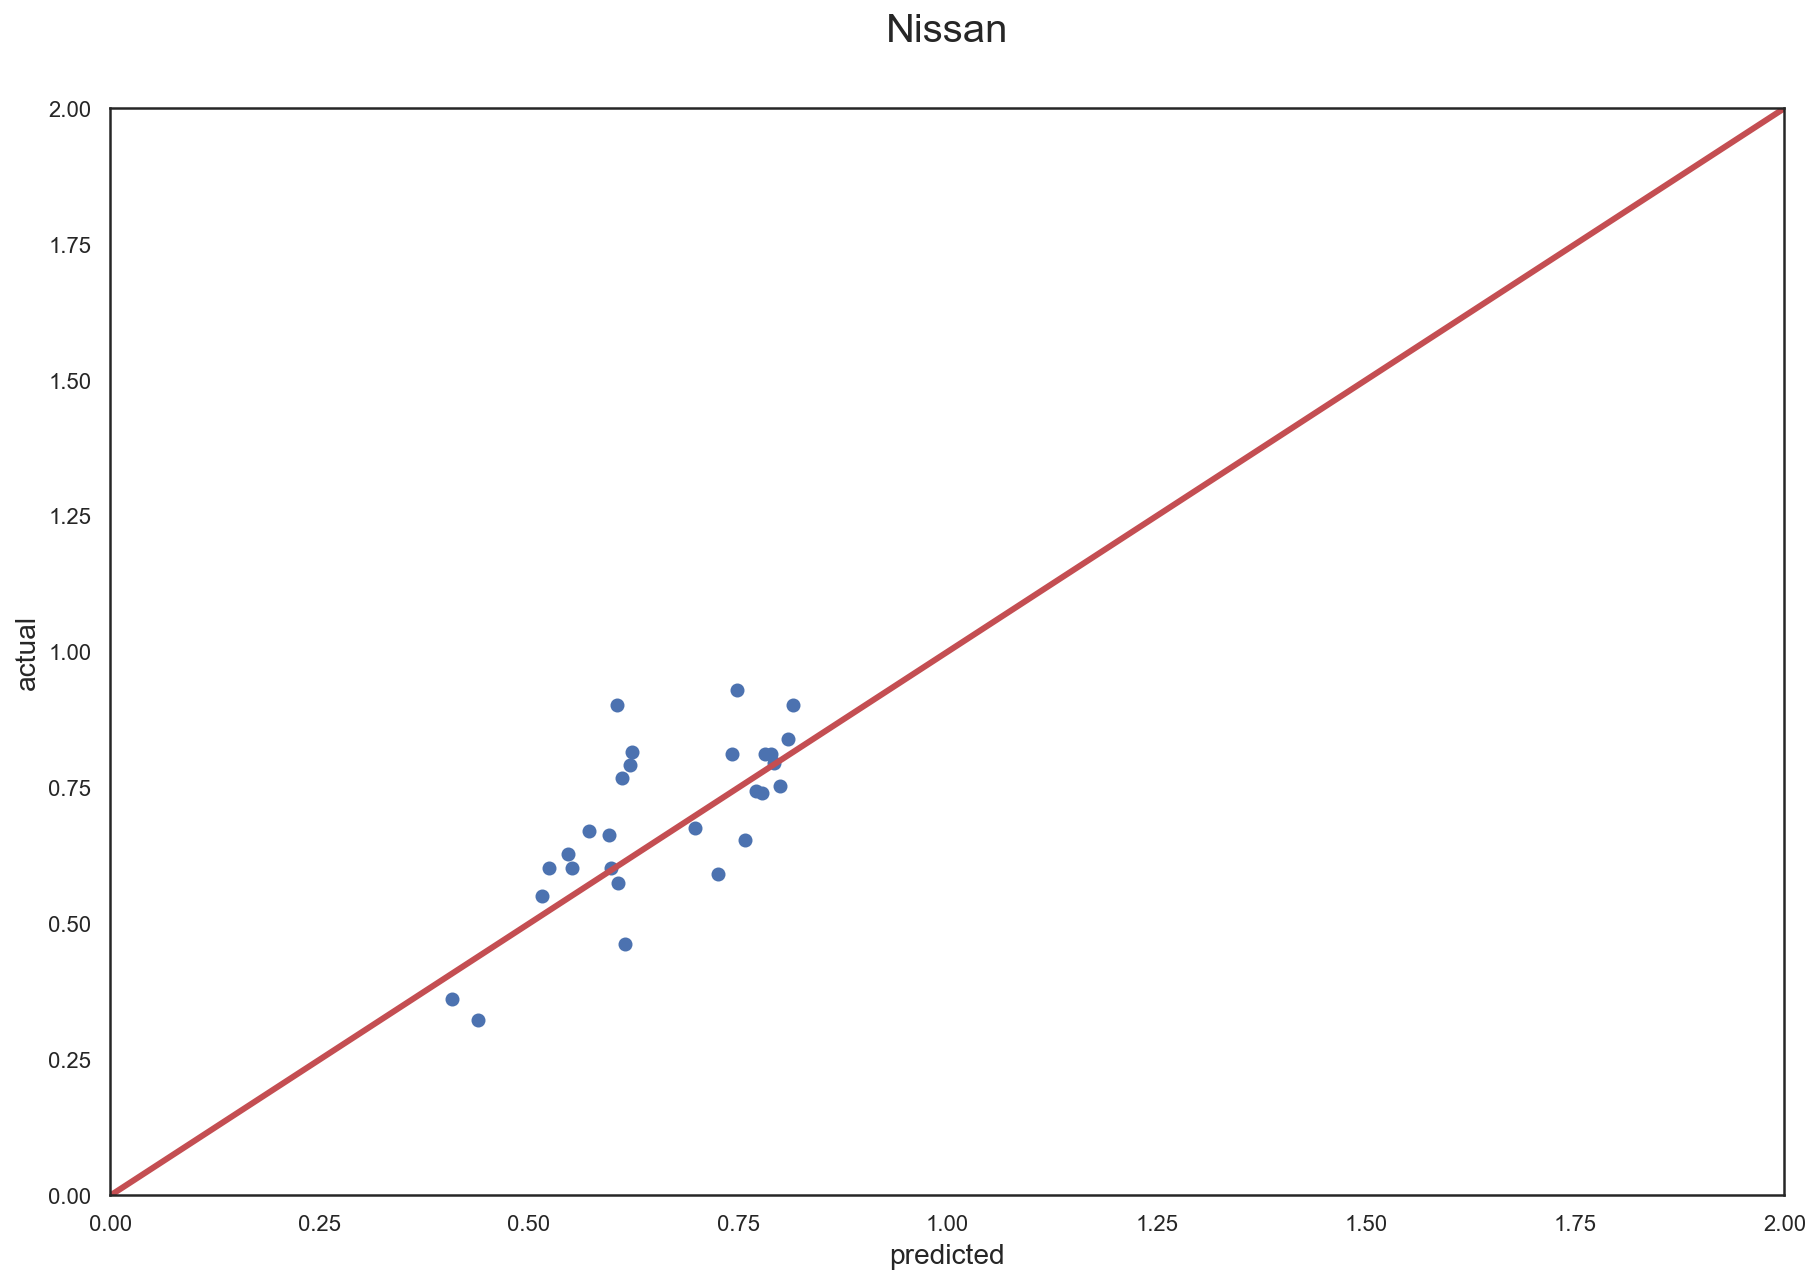

None
Toyota
explained_variance_score: 0.889626400818151
mean_squared_errors: 0.009989125962229617
r2_score: 0.889315408281522
None


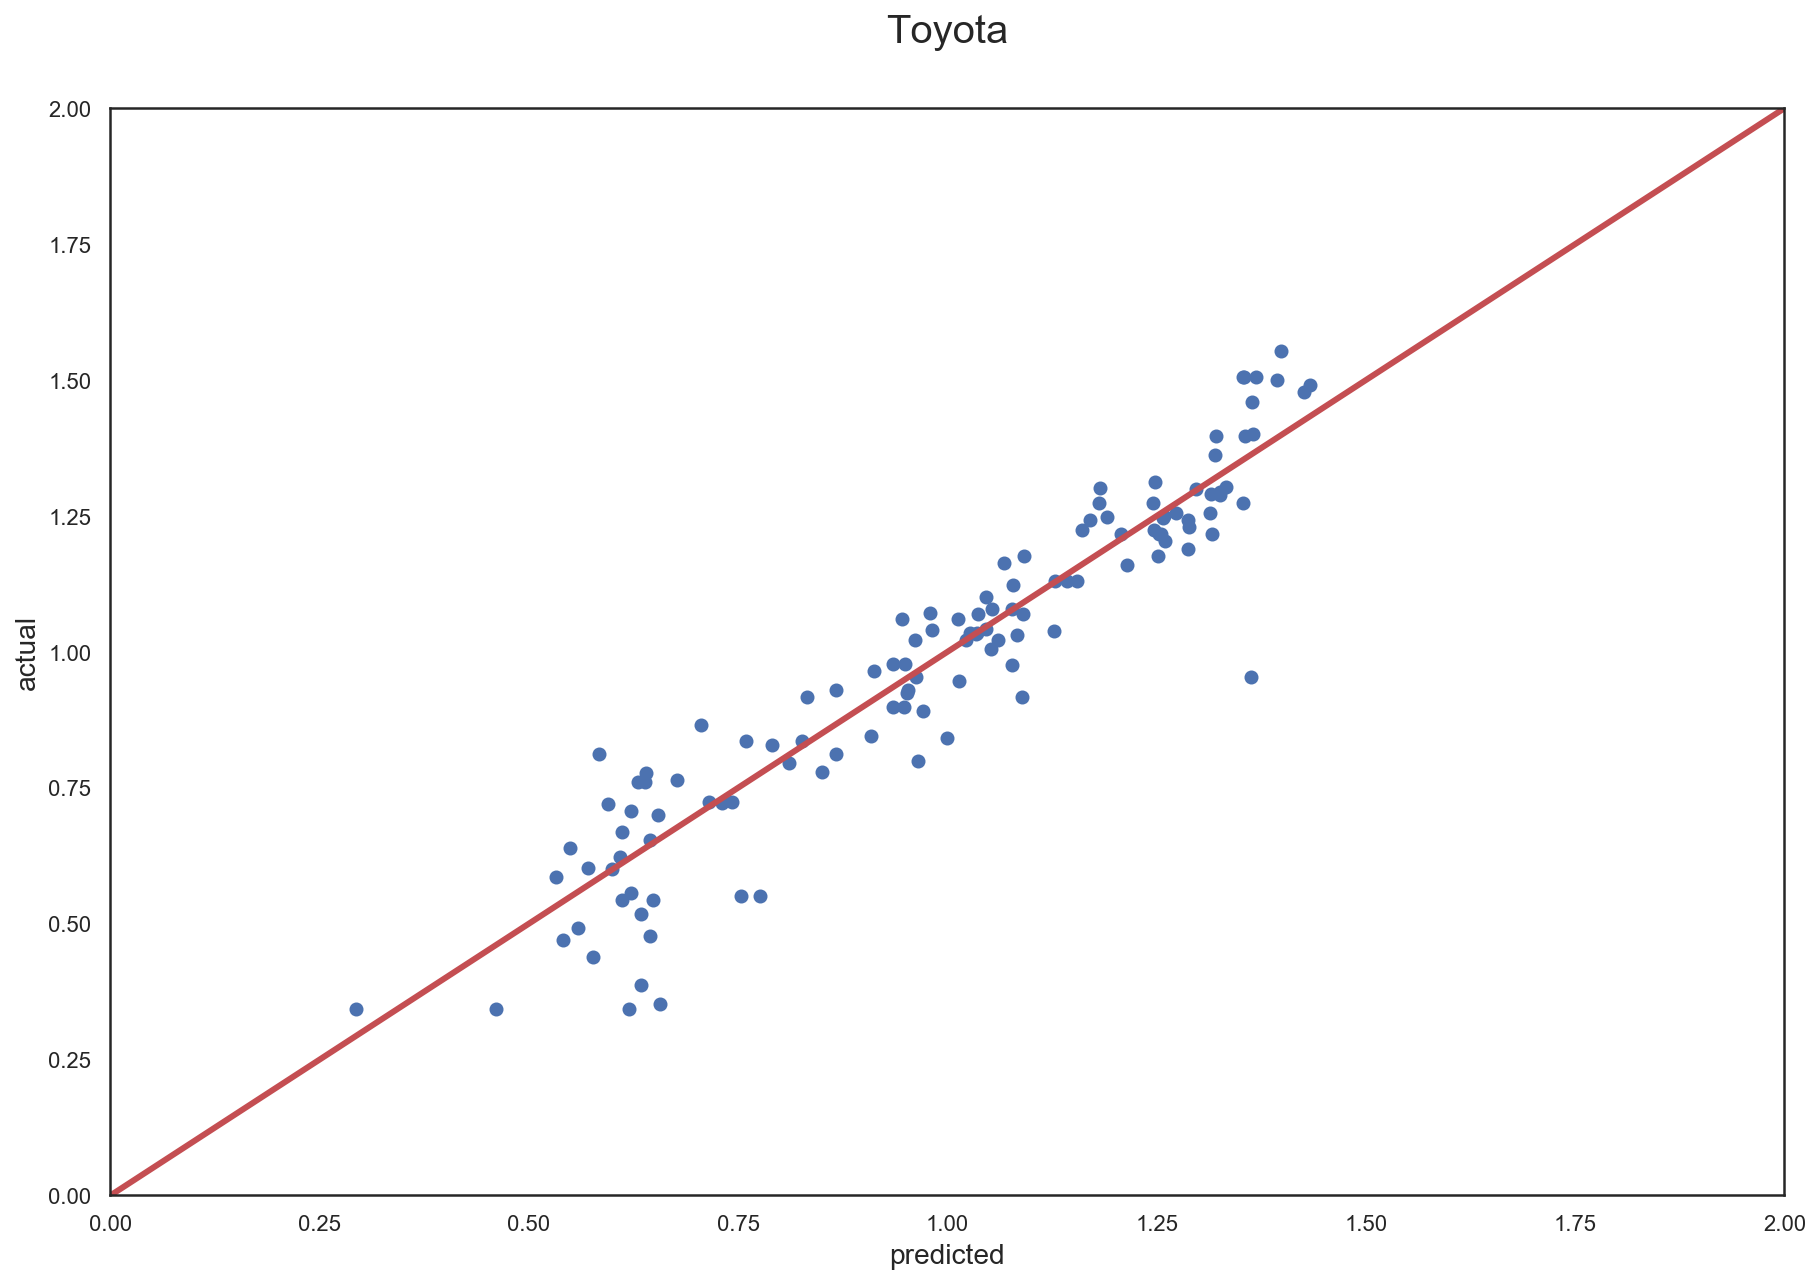

None
Volkswagen
explained_variance_score: 0.7752667052880599
mean_squared_errors: 0.0057741651539633095
r2_score: 0.7706224411423983
None


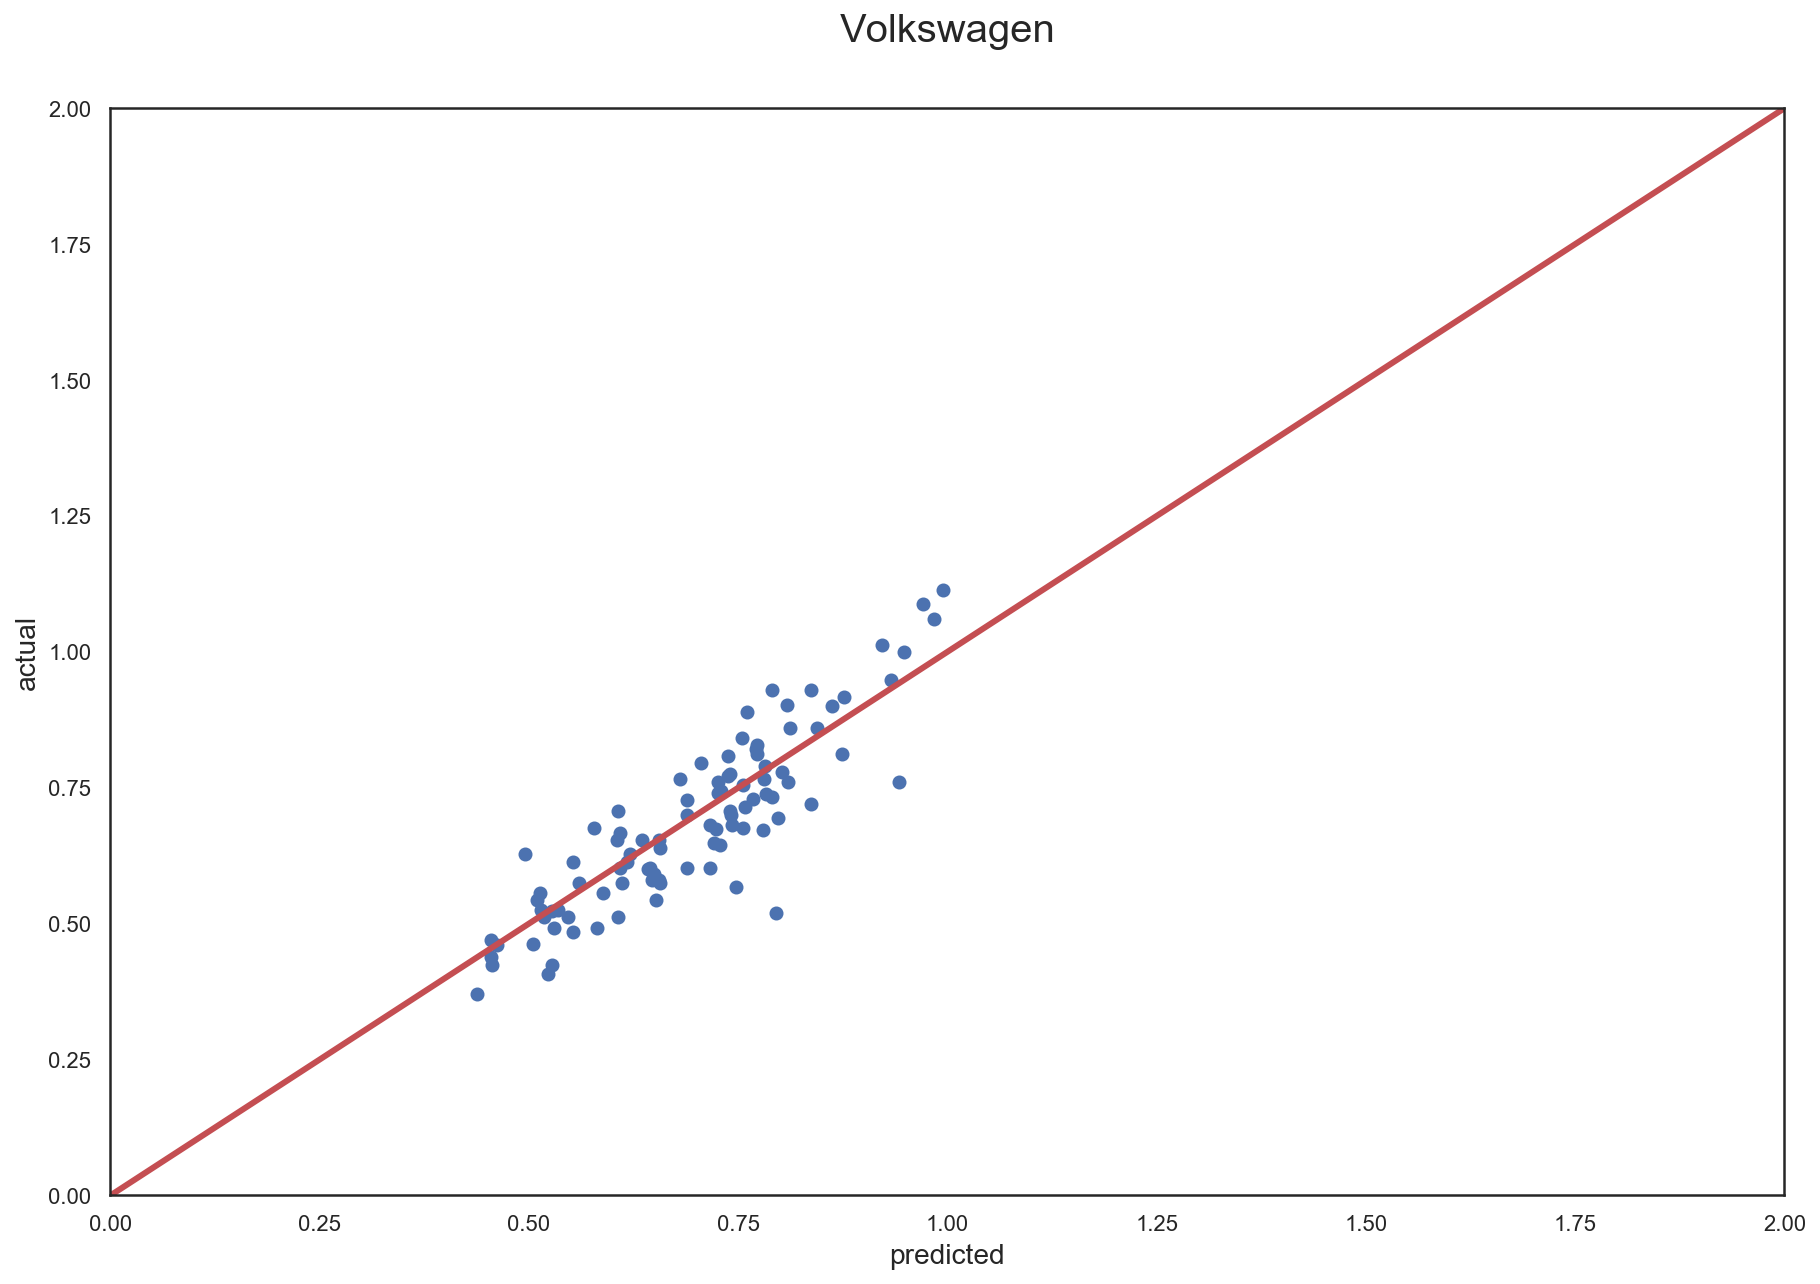

None
Tata
explained_variance_score: 0.7594227899664221
mean_squared_errors: 0.018710157761341766
r2_score: 0.7532972712913282
None


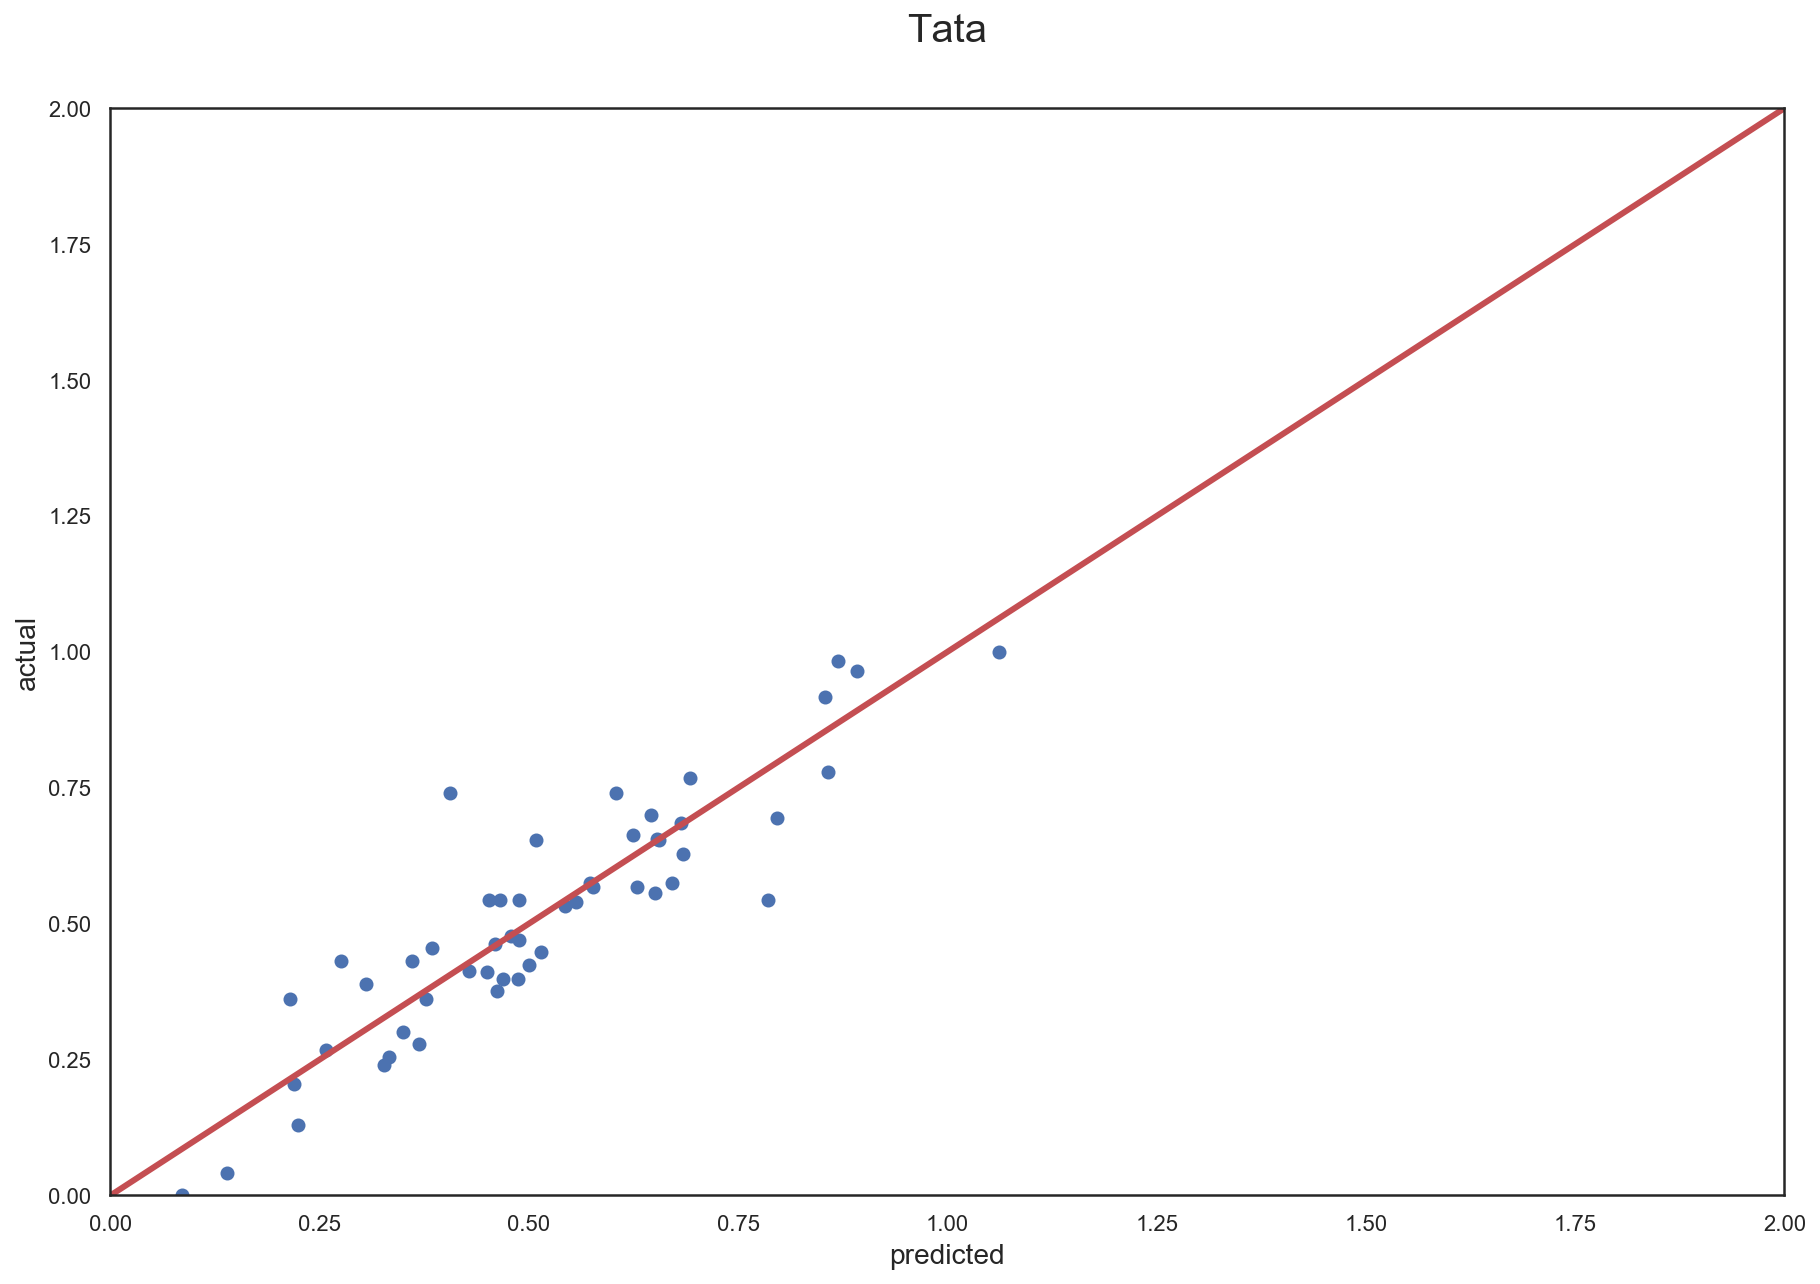

None
Land
explained_variance_score: 0.7899990944003418
mean_squared_errors: 0.01187991477343009
r2_score: 0.74219415223693
None


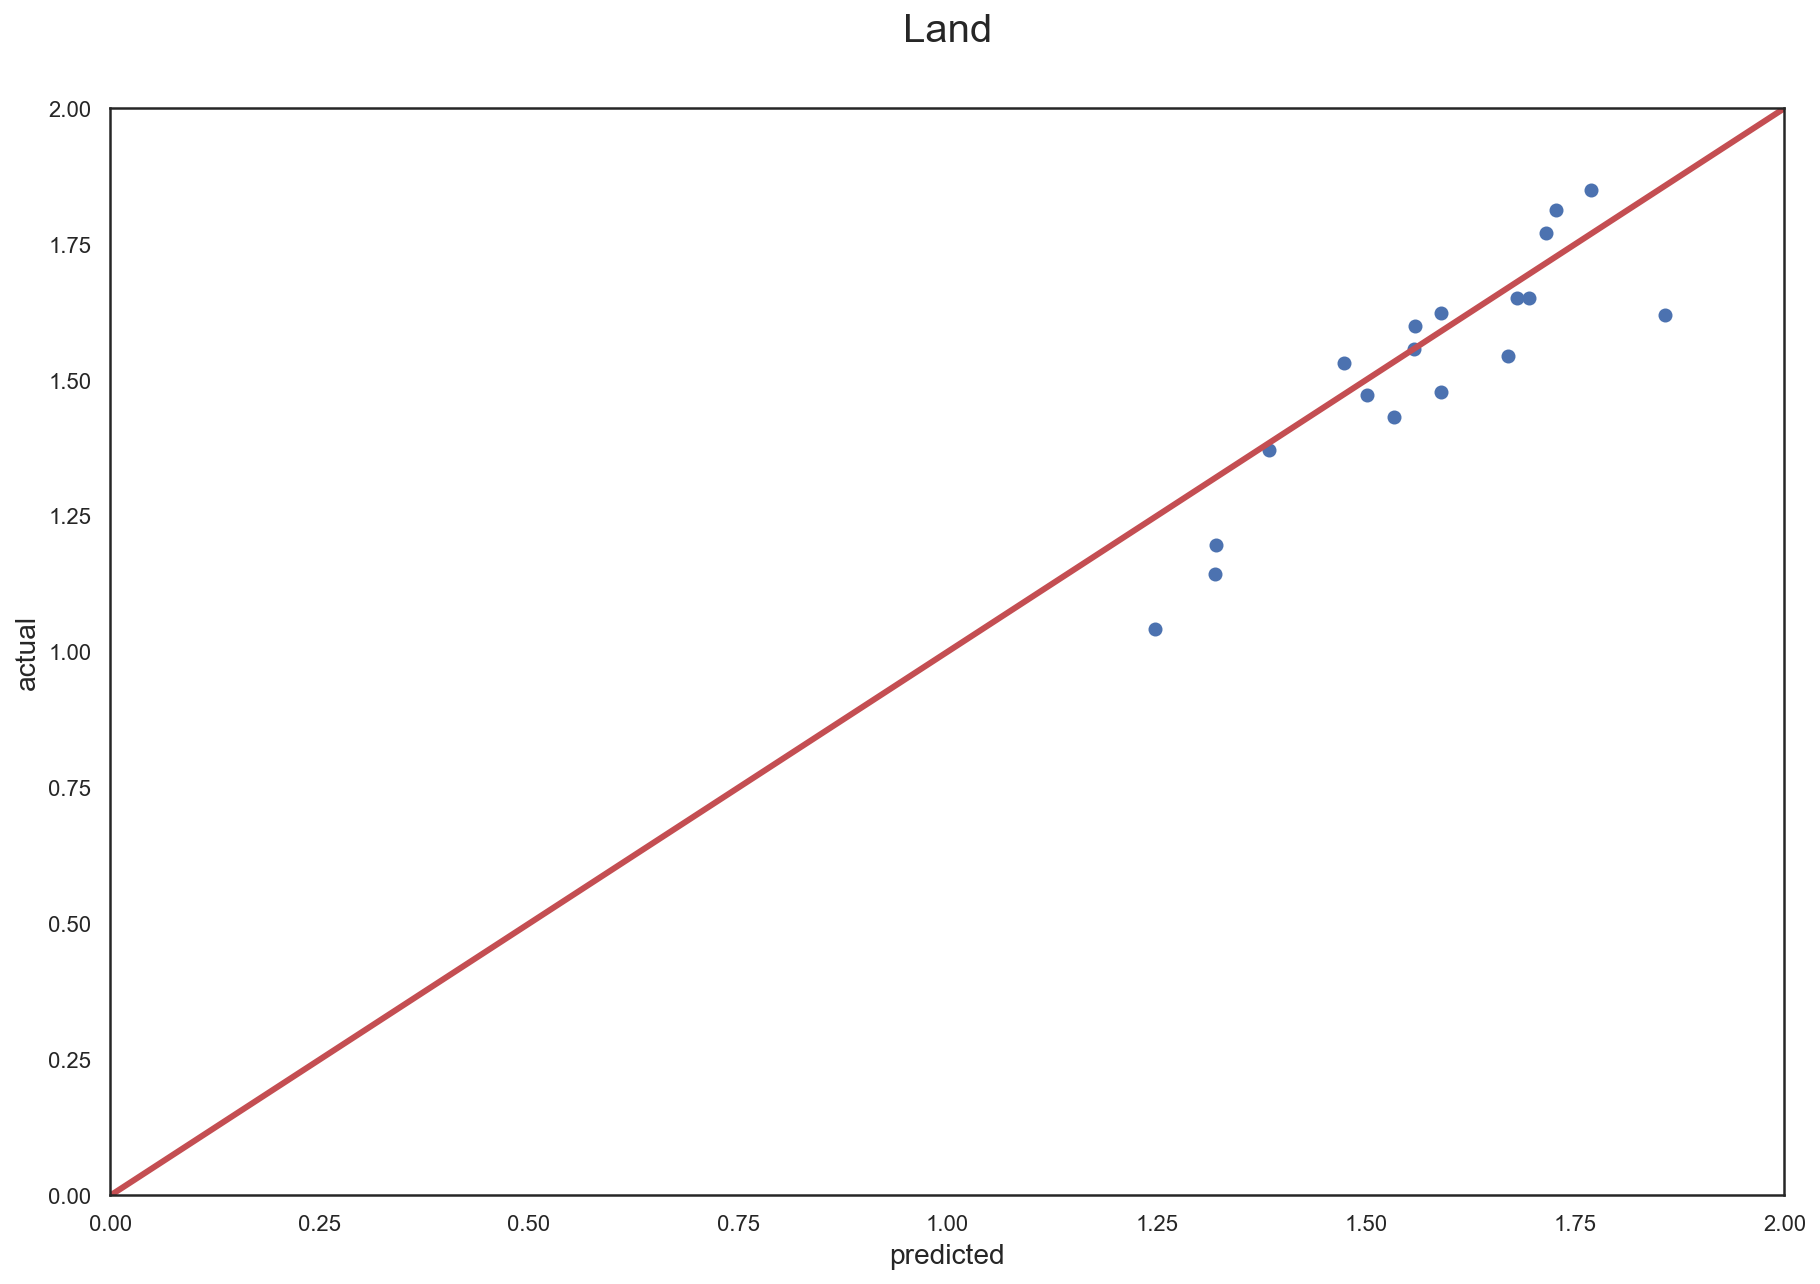

None
Mitsubishi
explained_variance_score: 0.7651041765789215
mean_squared_errors: 0.03575243583643948
r2_score: 0.7650191502541772
None


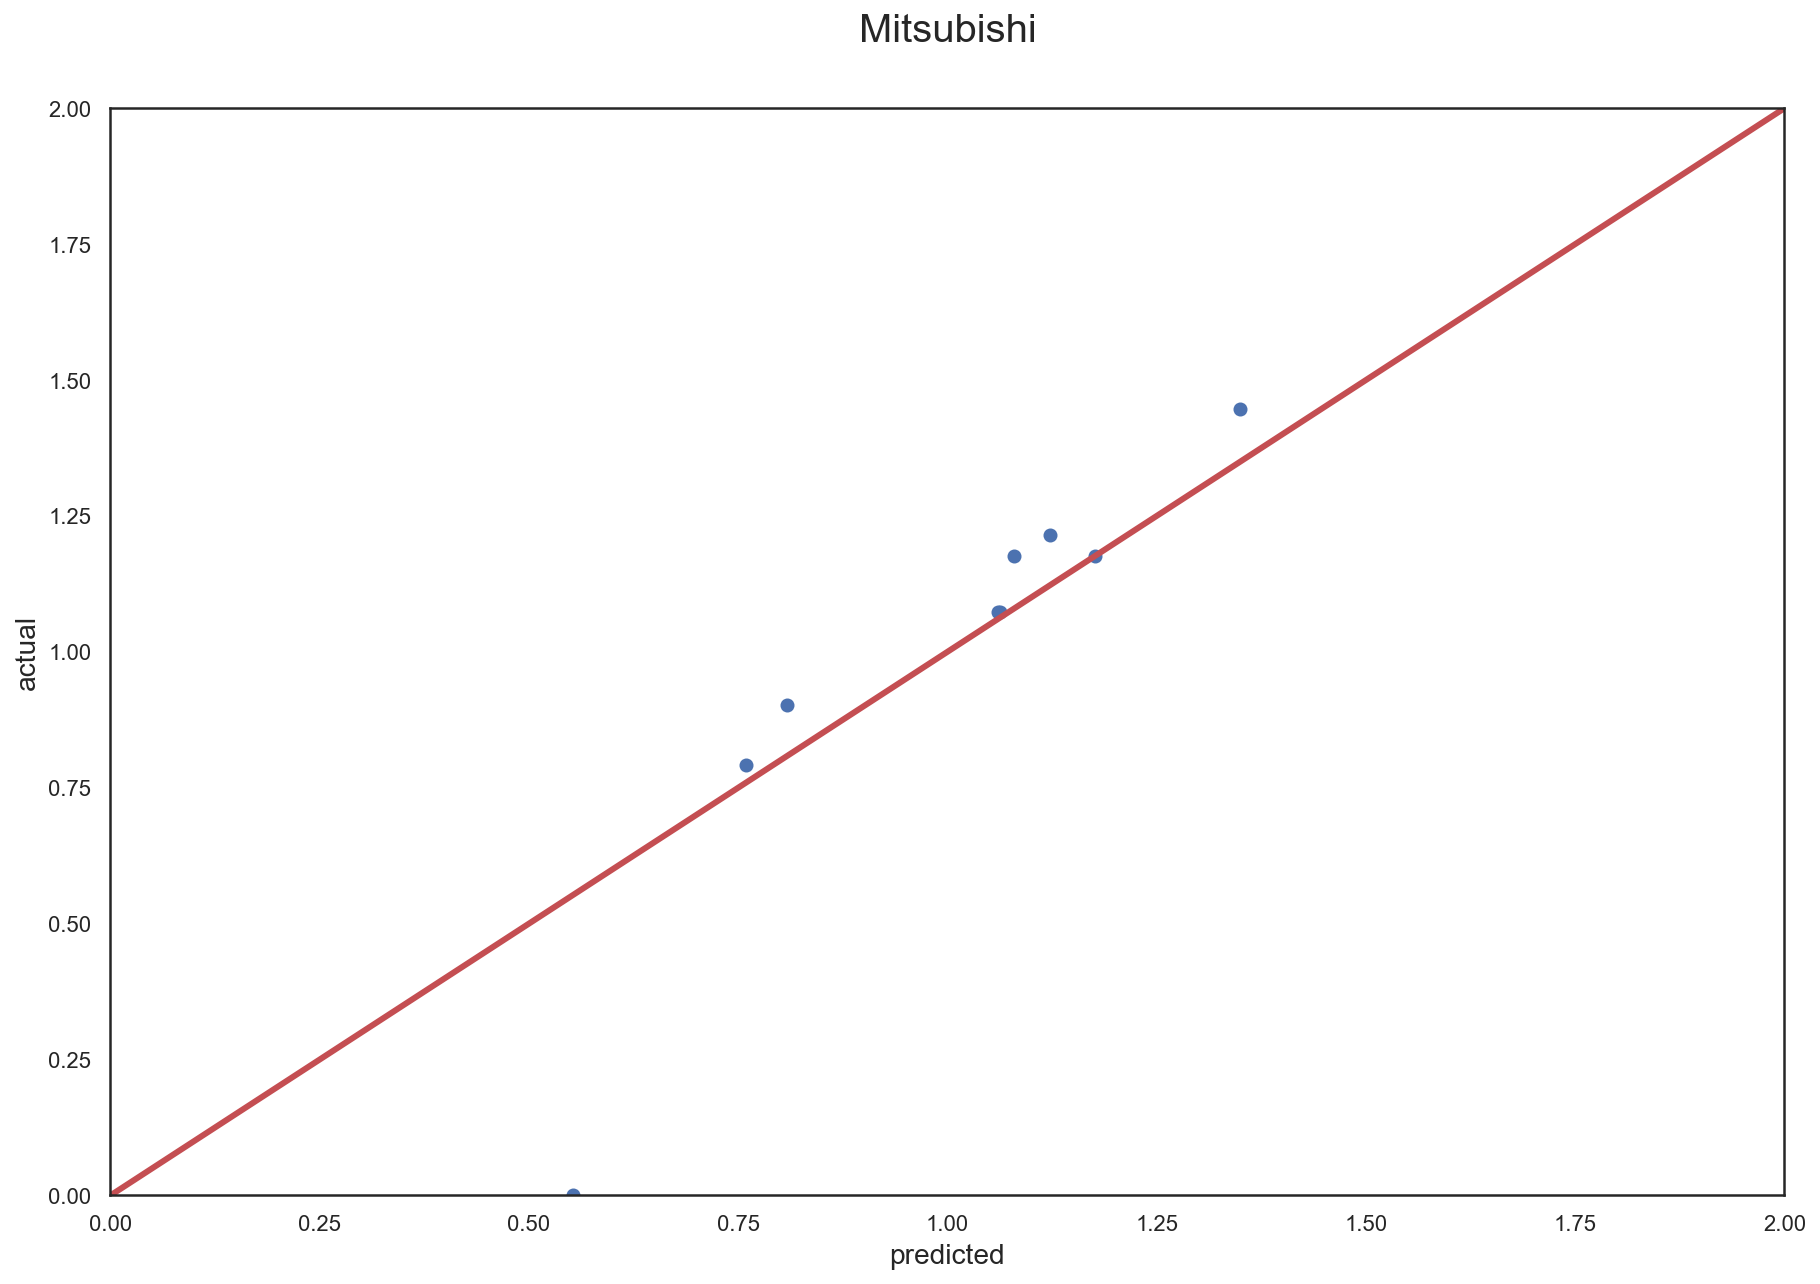

None
Renault
explained_variance_score: 0.8358271352965936
mean_squared_errors: 0.005866945697538389
r2_score: 0.8230875173511243
None


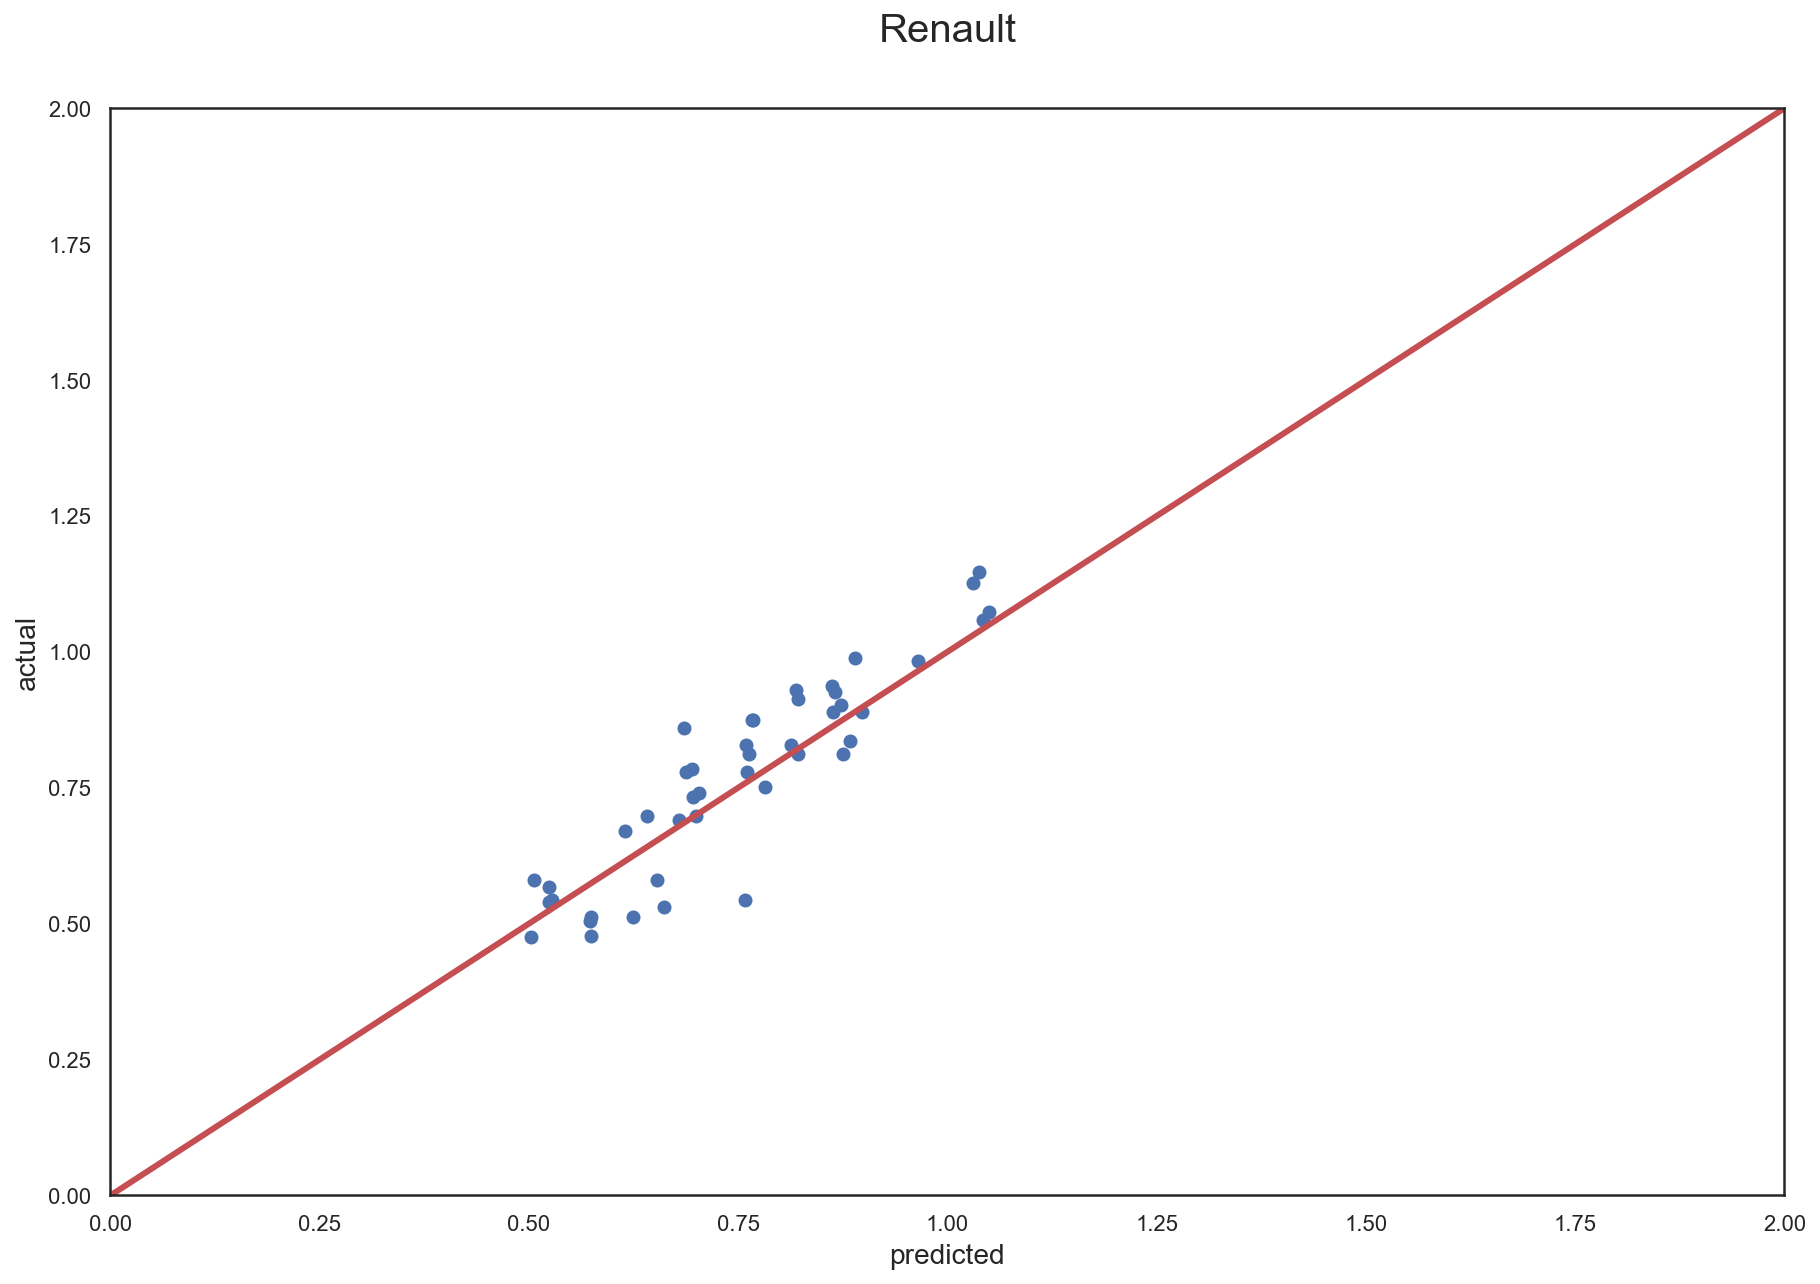

None
Mercedes-Benz
explained_variance_score: 0.8376623450190621
mean_squared_errors: 0.010891807661190802
r2_score: 0.8339405098643162
None


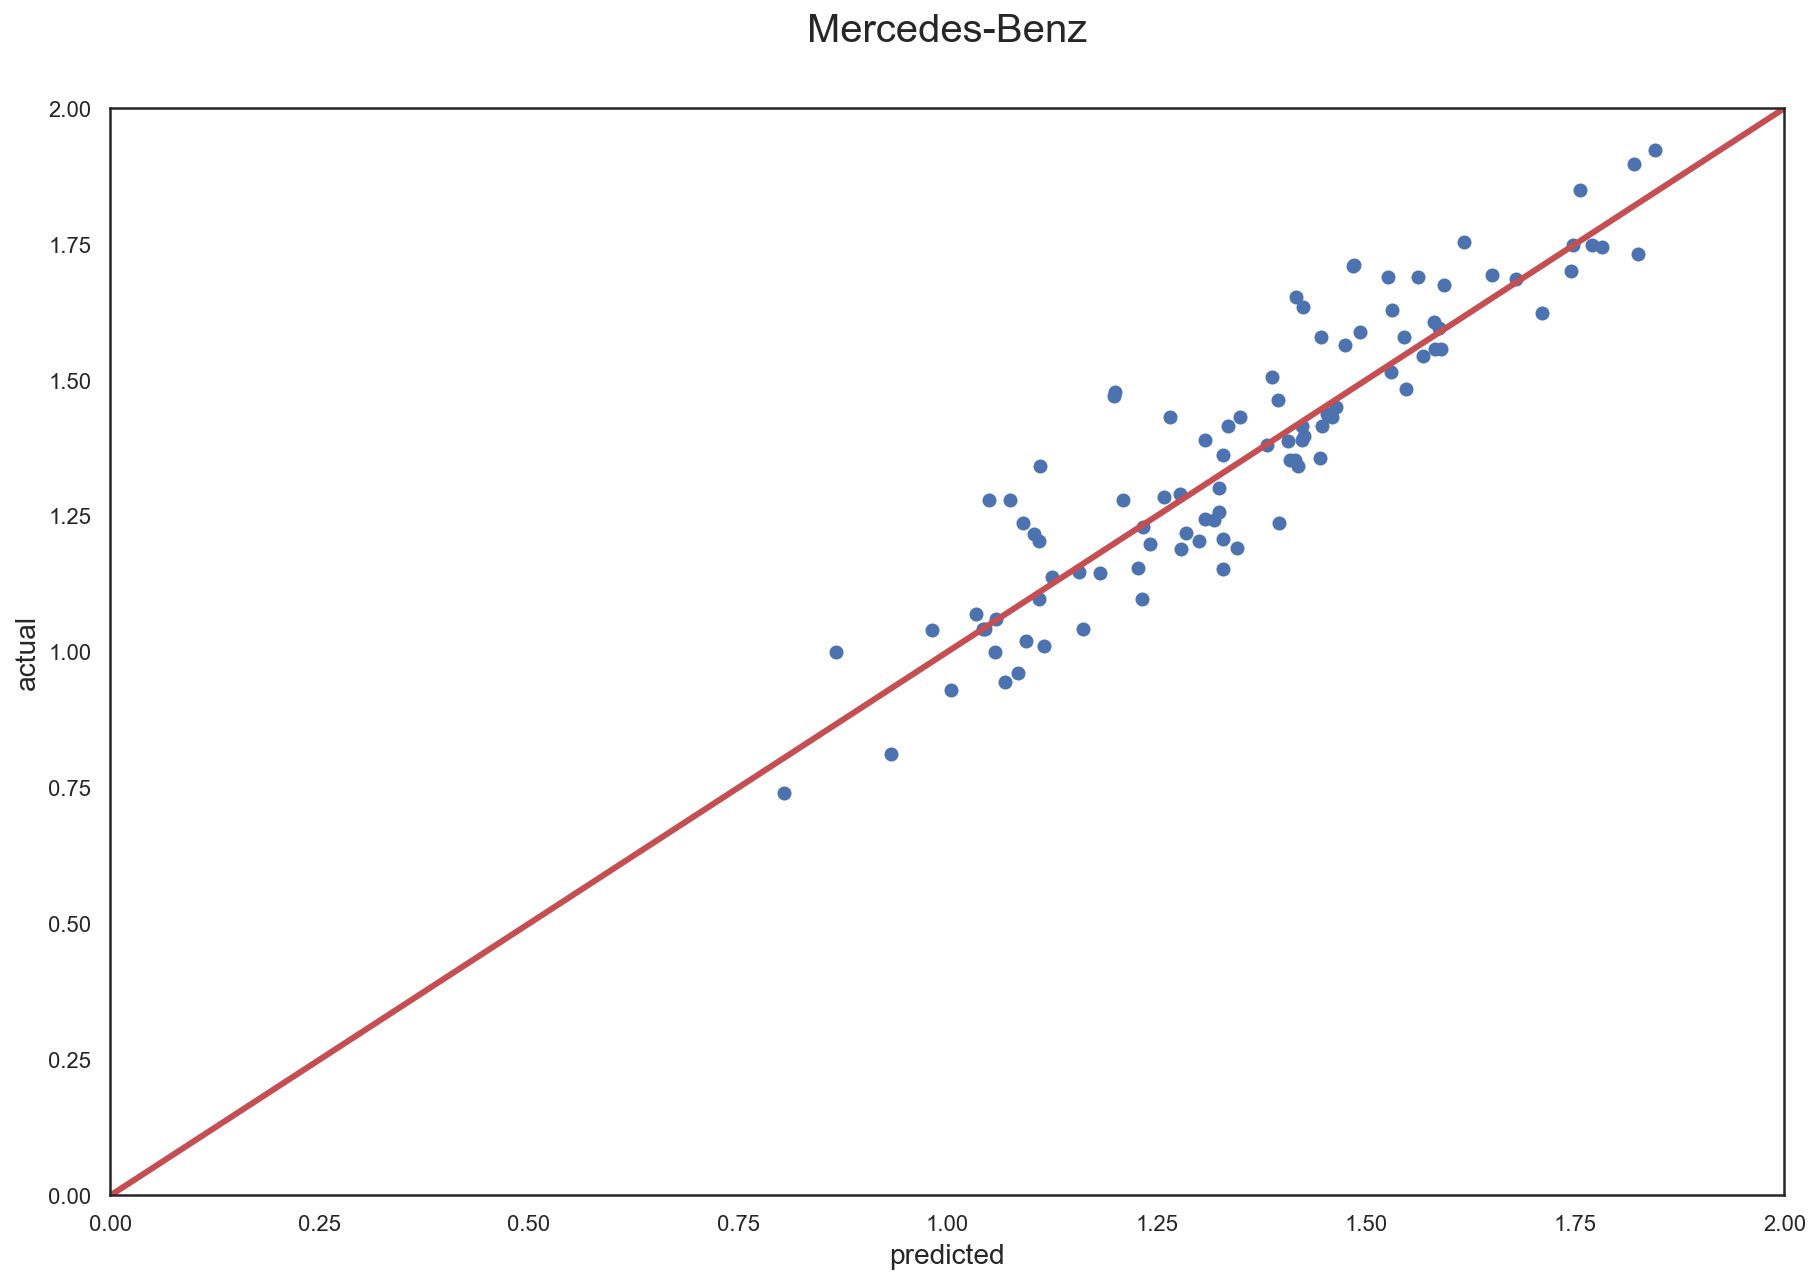

None
BMW
explained_variance_score: 0.7580385714291757
mean_squared_errors: 0.014185832809590166
r2_score: 0.755939397297279
None


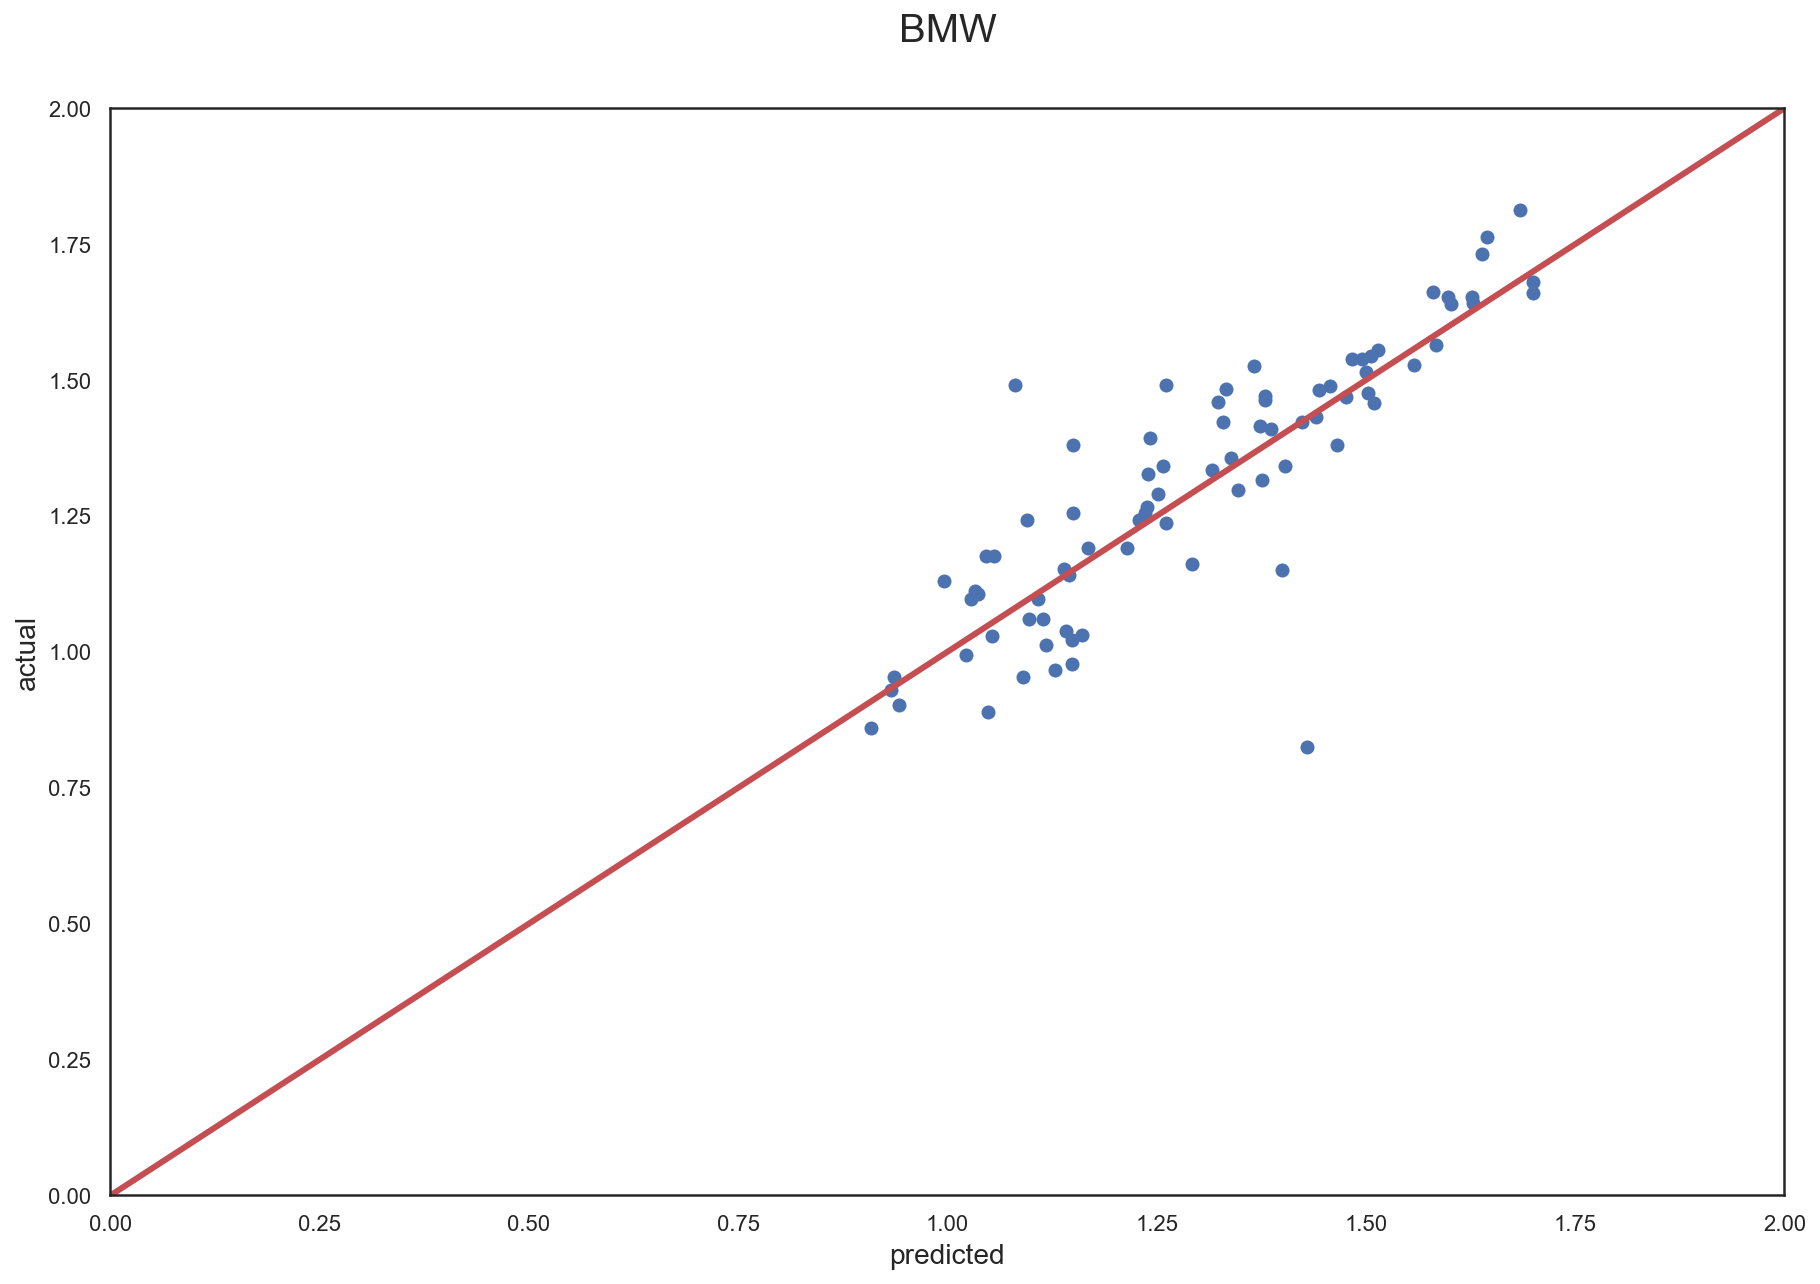

None
Mahindra
explained_variance_score: 0.8813382927995678
mean_squared_errors: 0.005211042389843835
r2_score: 0.8810489928542893
None


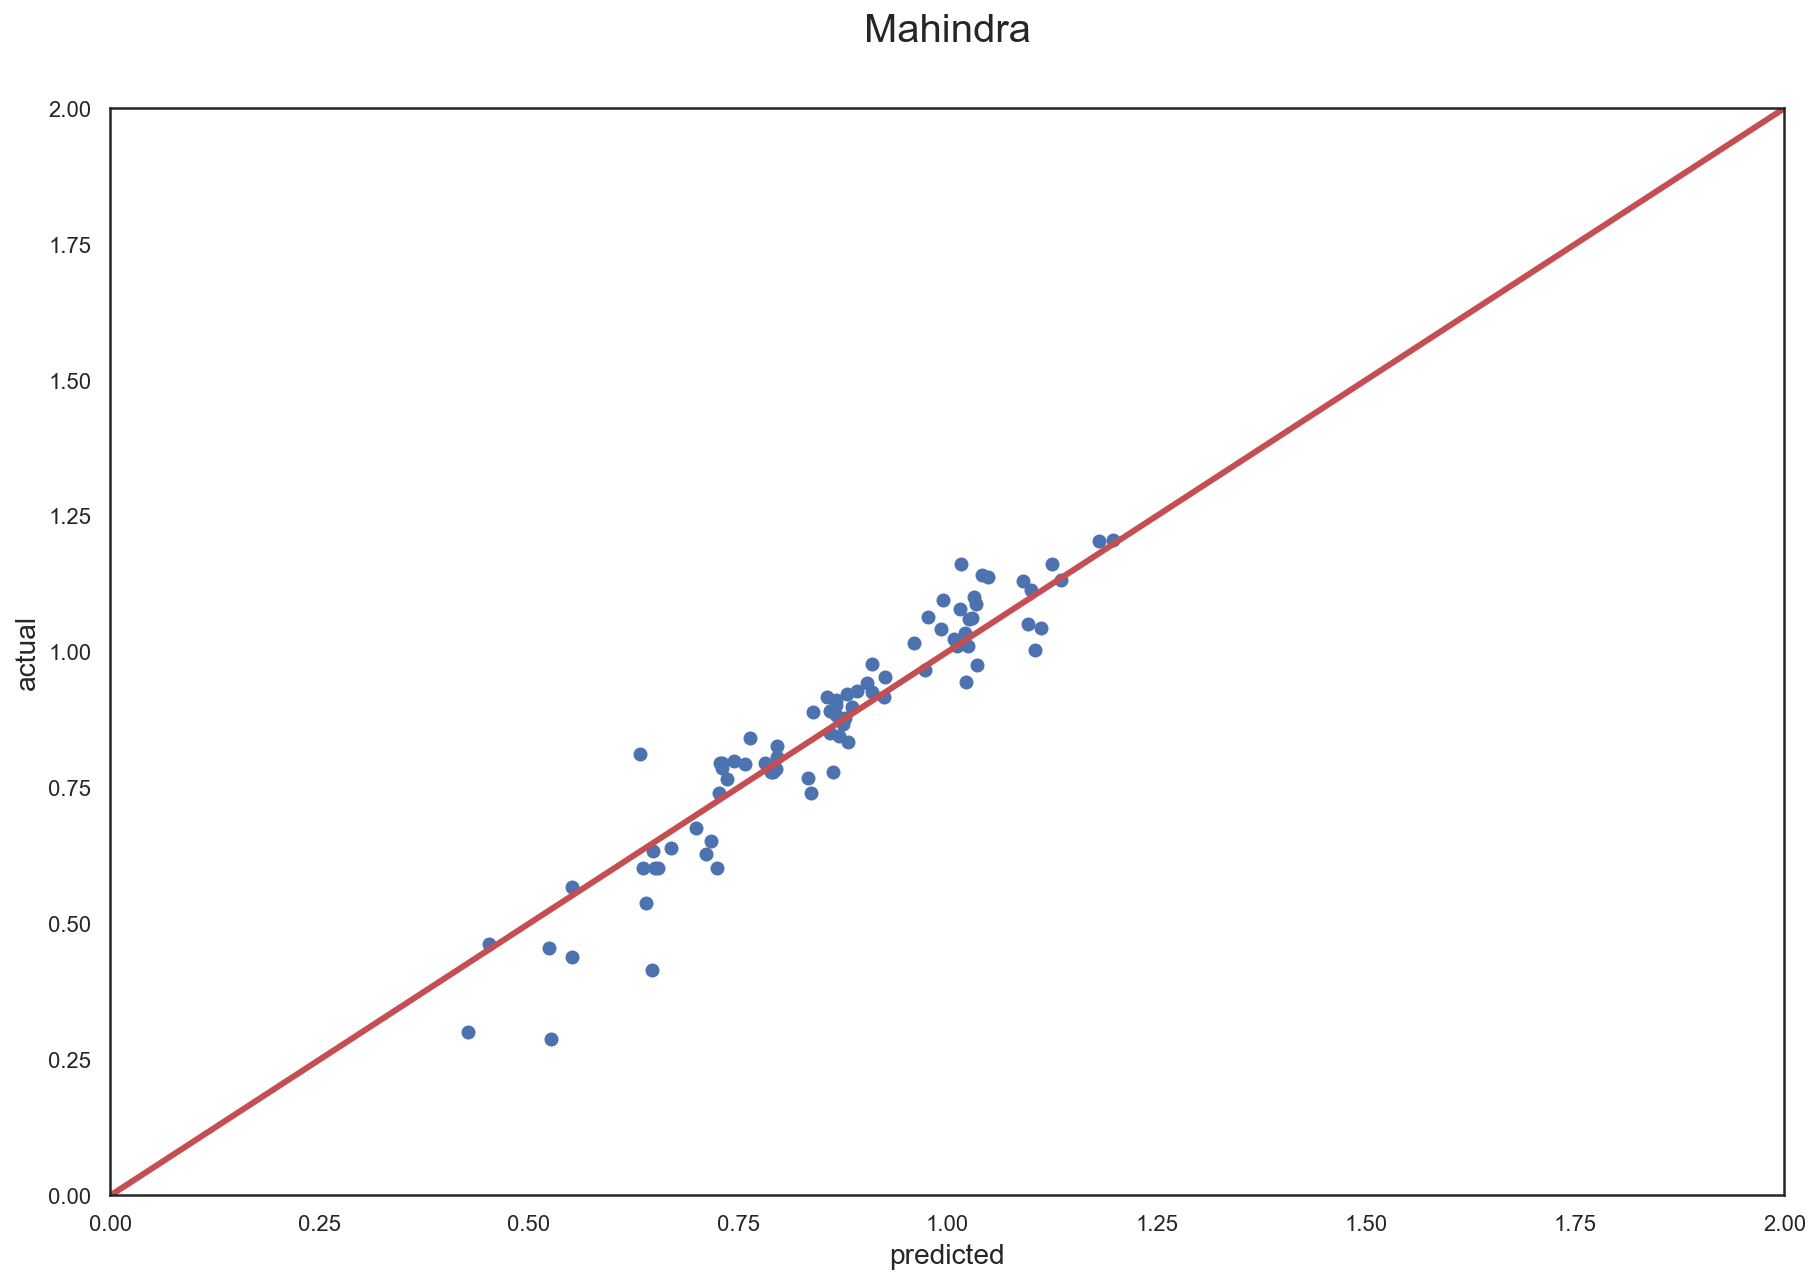

None
Ford
explained_variance_score: 0.900444226921848
mean_squared_errors: 0.013944245729639617
r2_score: 0.9003611565684584
None


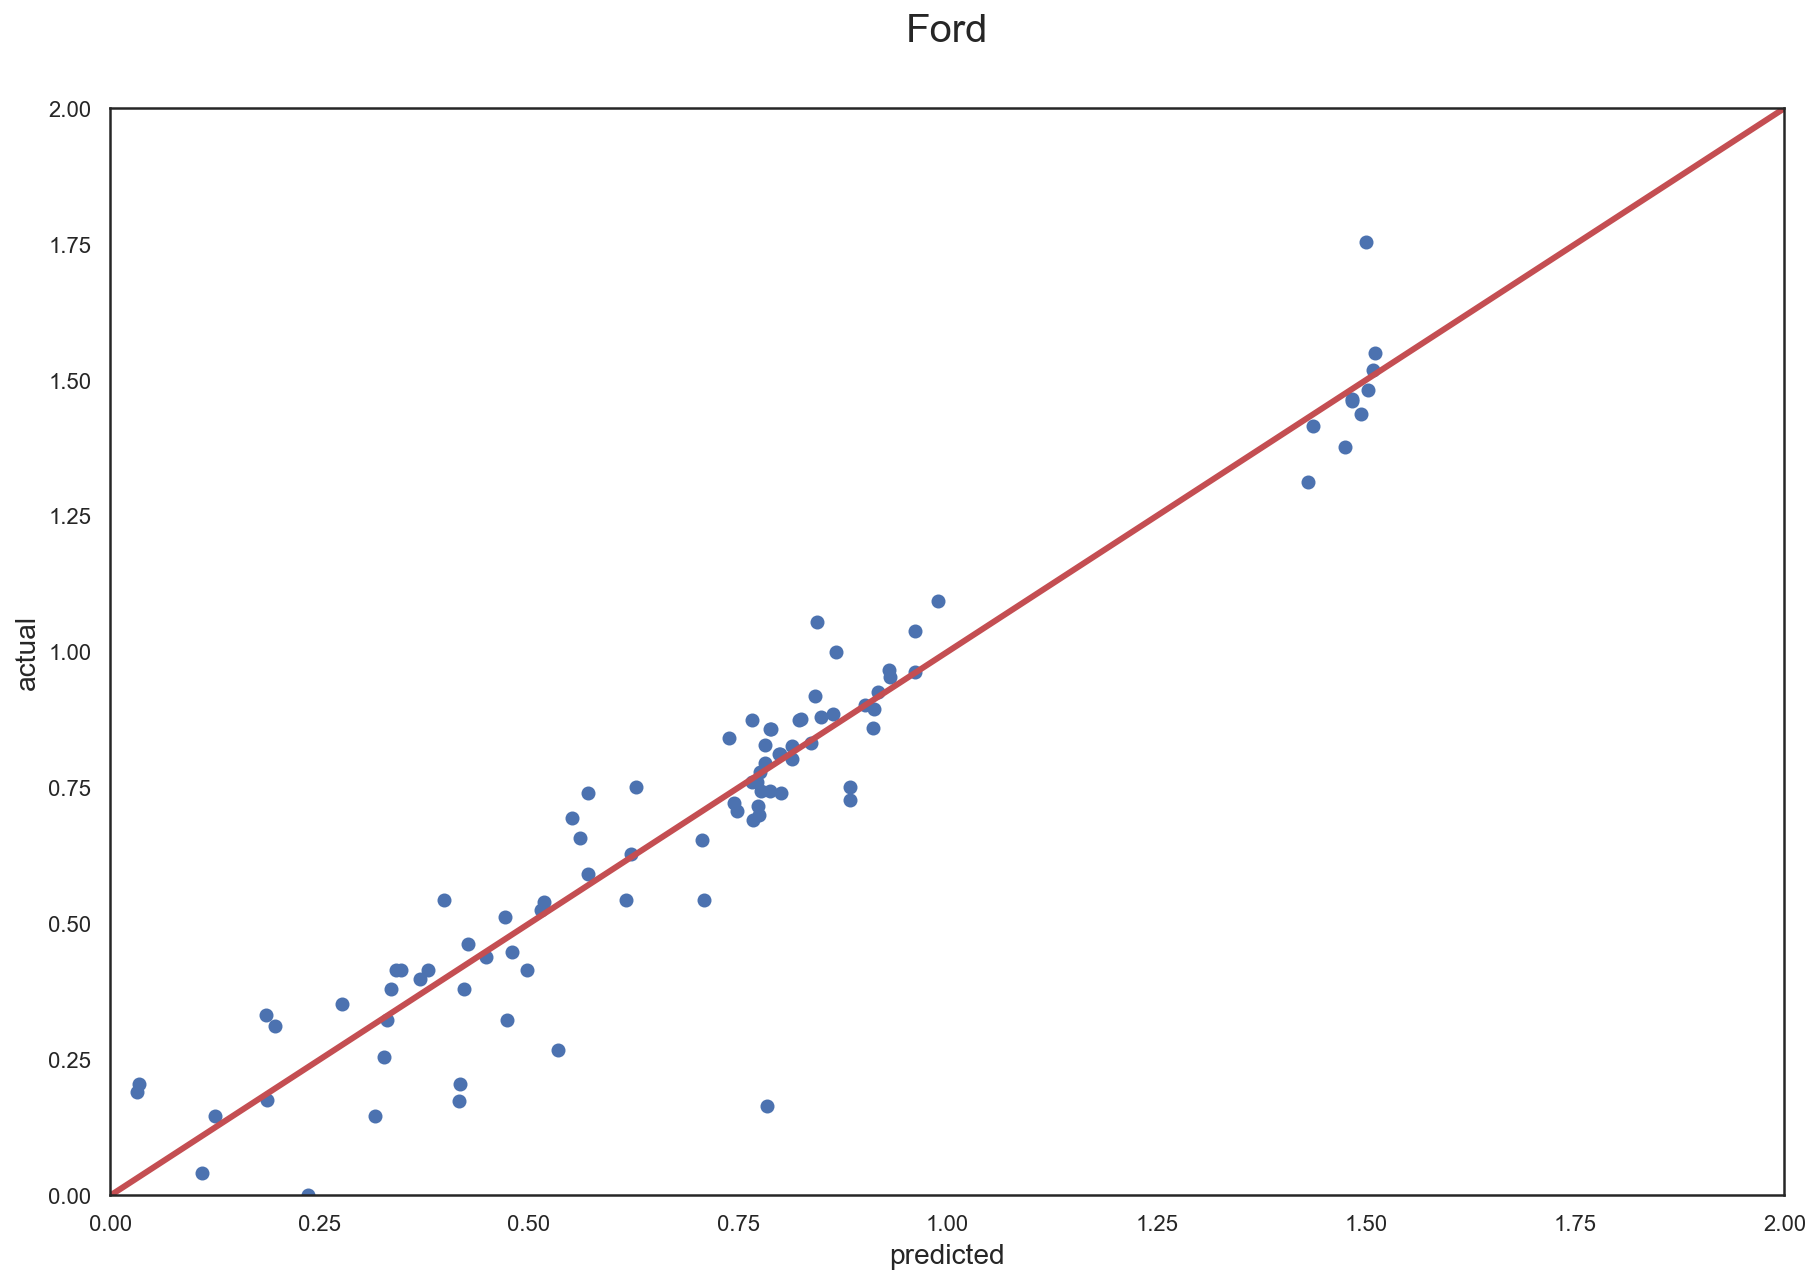

None
Porsche
explained_variance_score: 0.29534948399886385
mean_squared_errors: 0.02693554060969708
r2_score: -2.5844782200990974
None


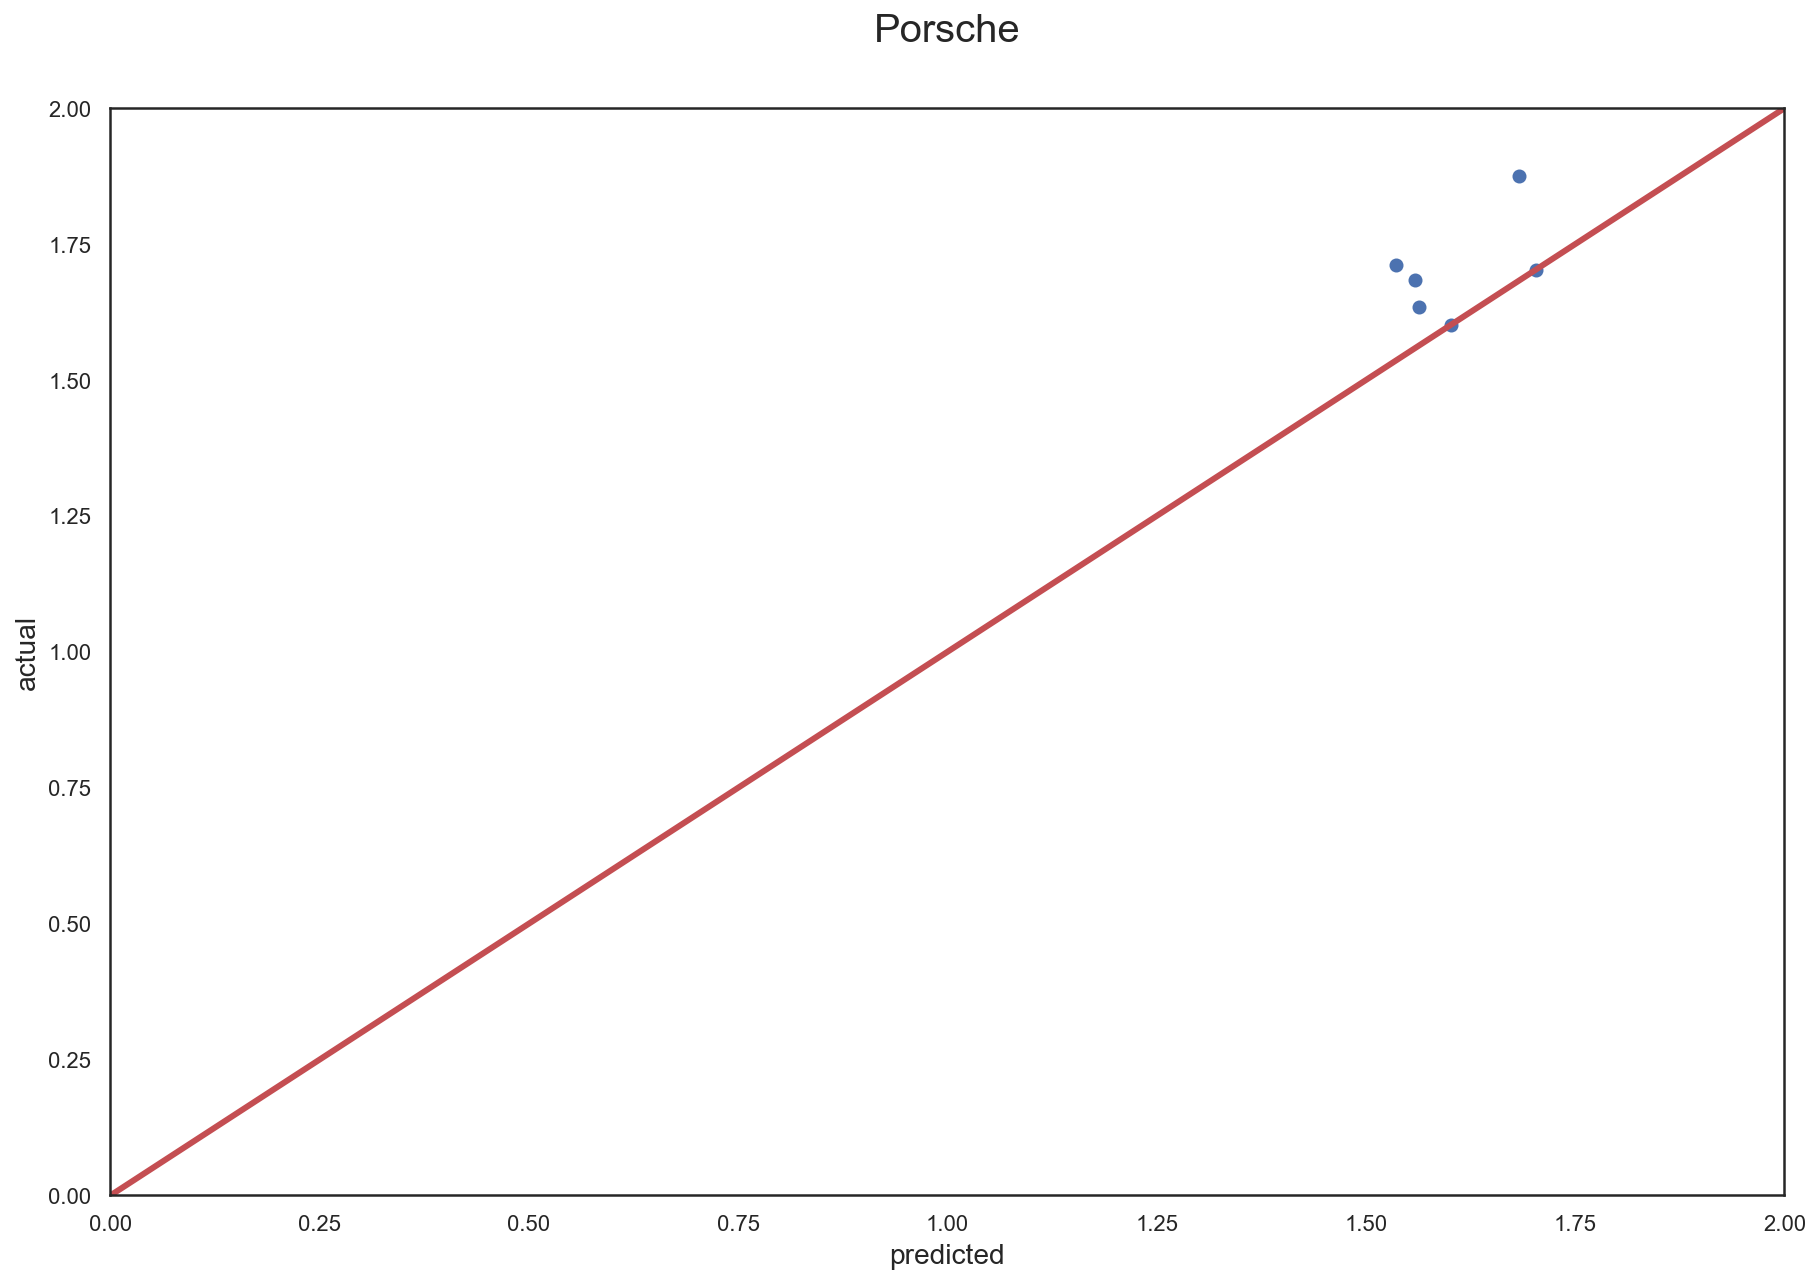

None
Datsun
explained_variance_score: 0.6674023470819971
mean_squared_errors: 0.00460442098877615
r2_score: -1.1769005356661029
None


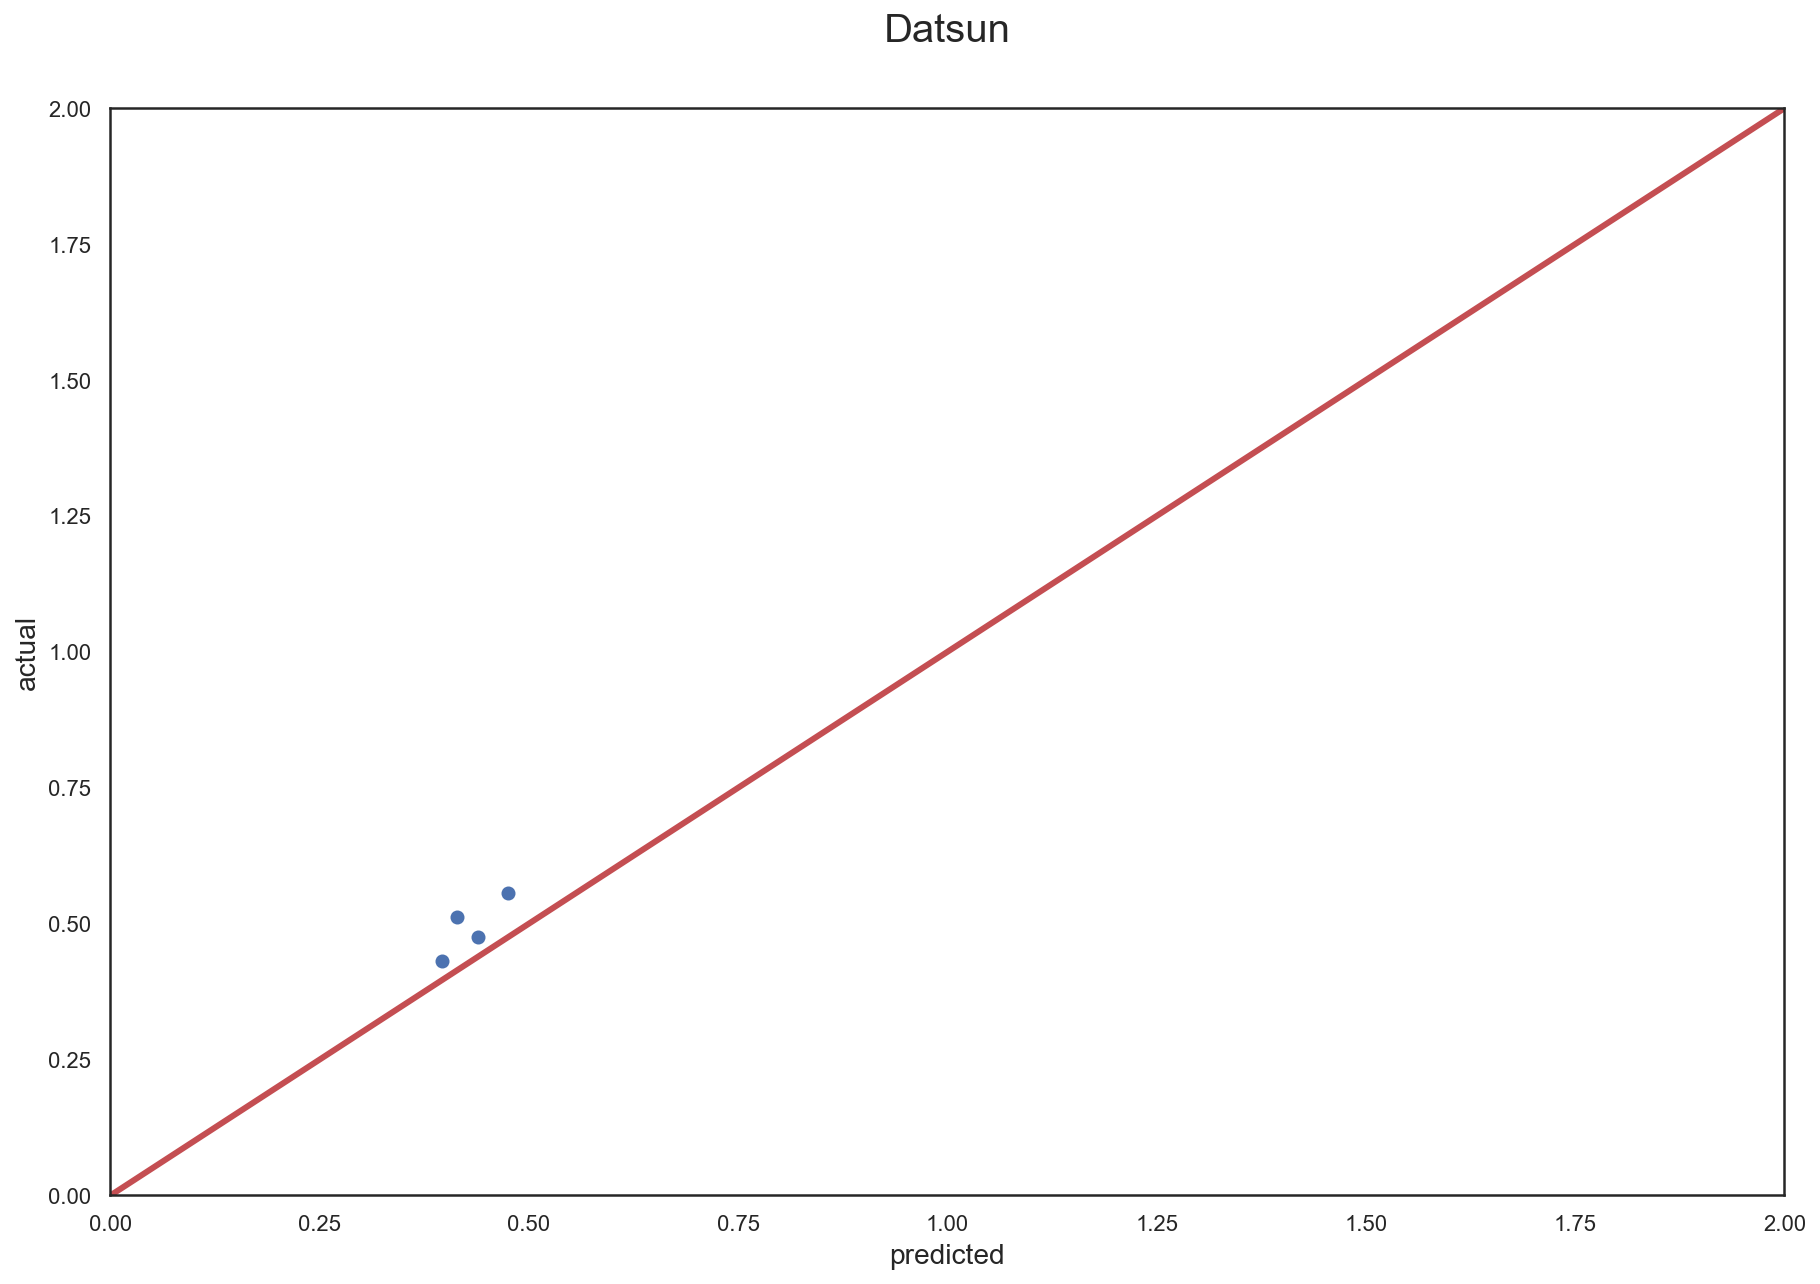

None
Jaguar
explained_variance_score: 0.7761310034997078
mean_squared_errors: 0.004252308906491052
r2_score: 0.6367386174847316
None


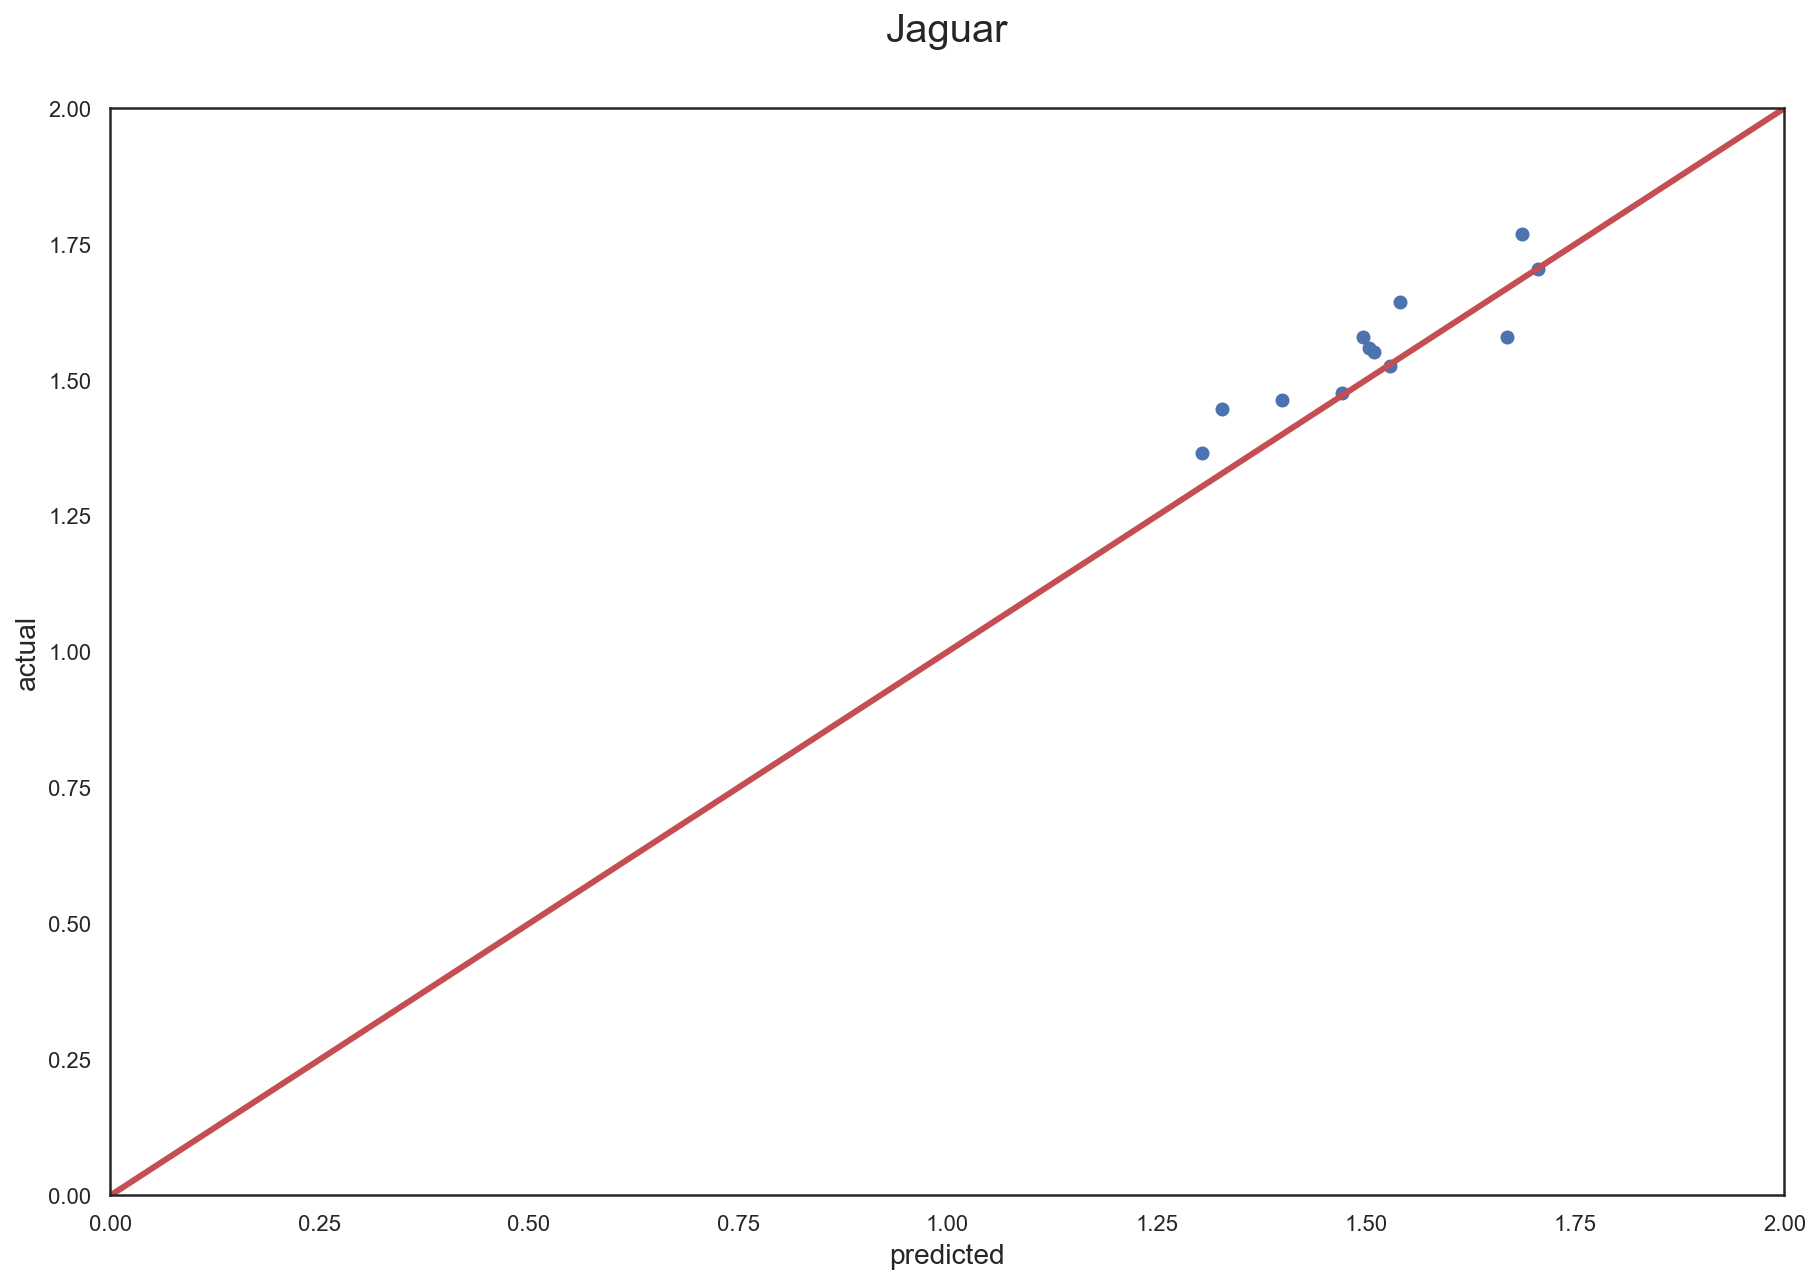

None
Volvo
explained_variance_score: 0.4886779530830251
mean_squared_errors: 0.015854904367940795
r2_score: 0.47746525880660673
None


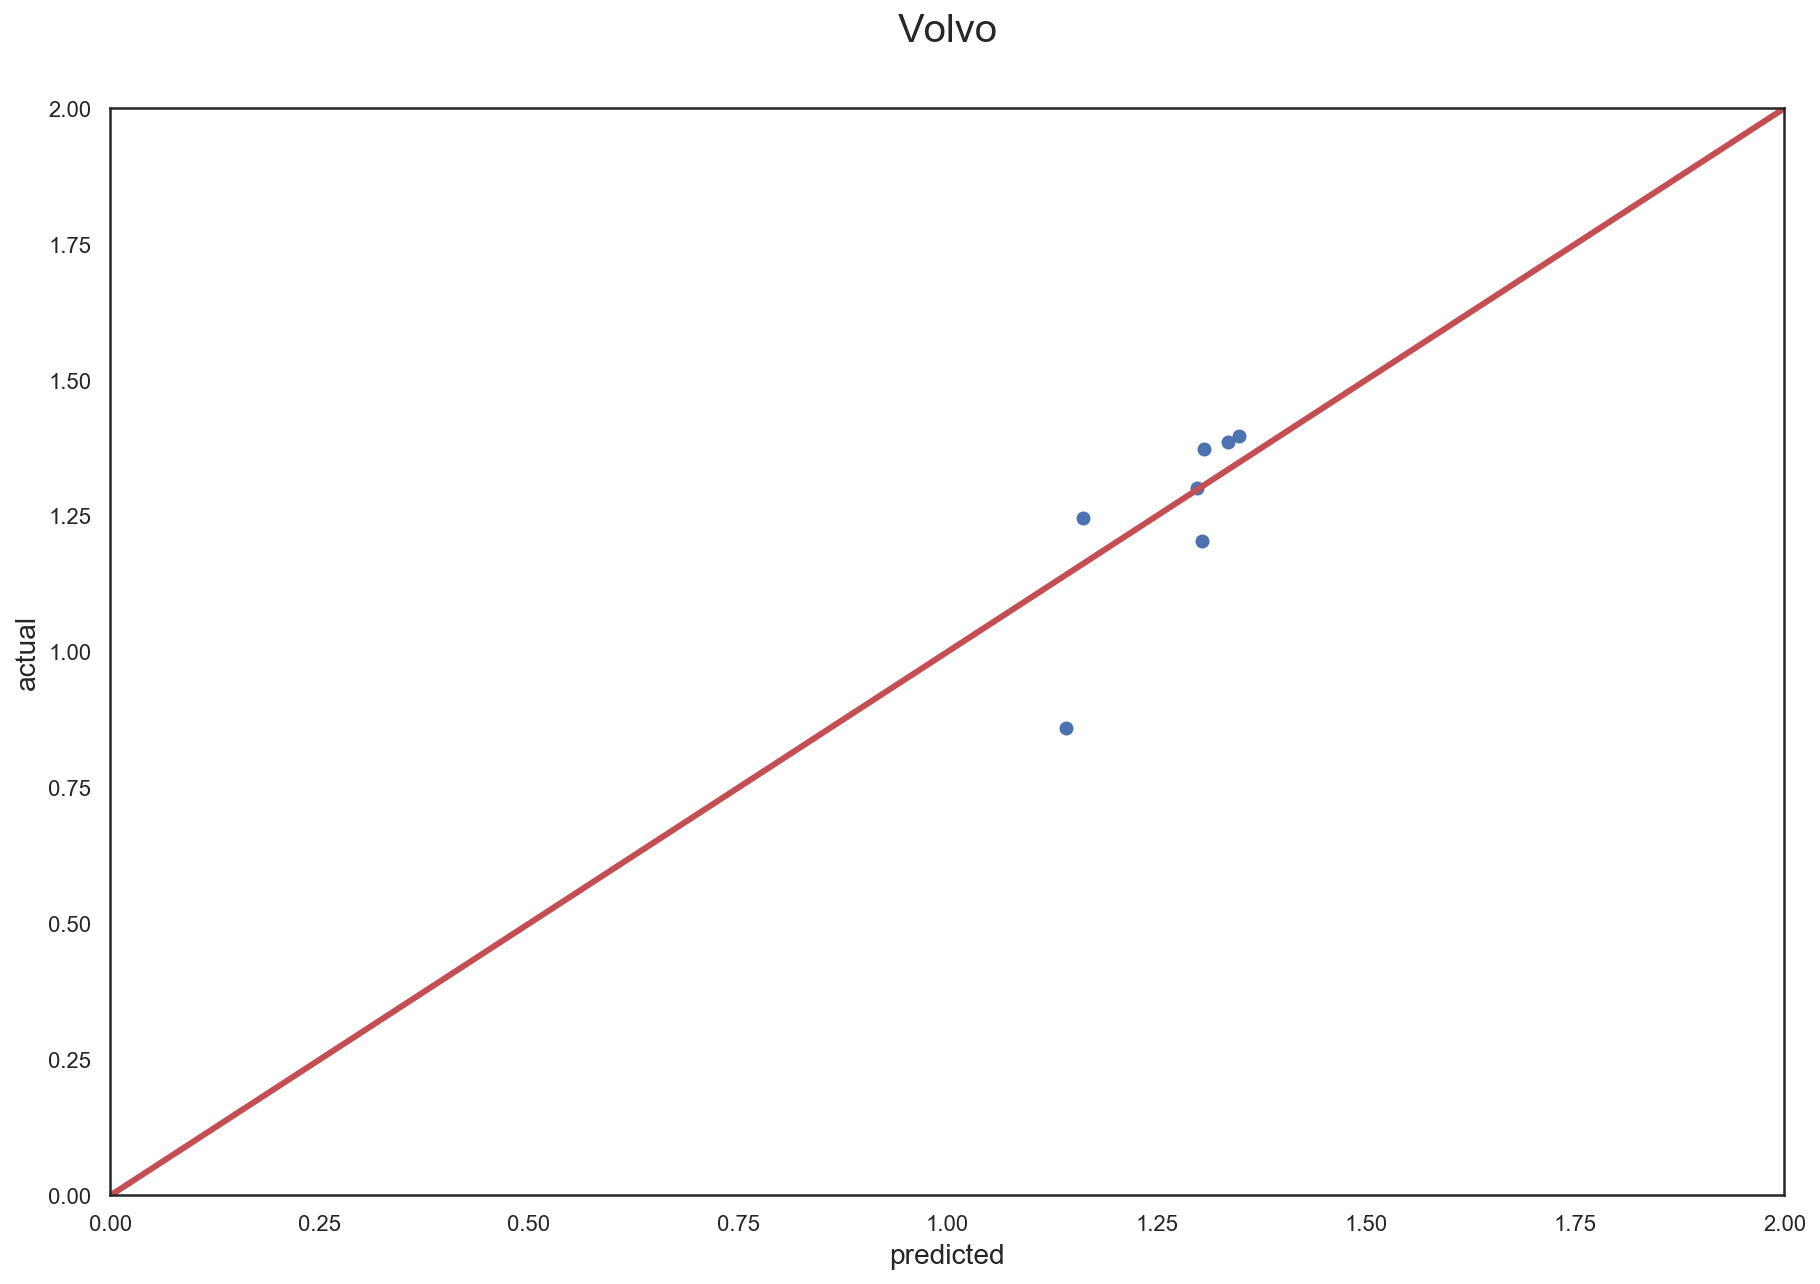

None
Chevrolet
explained_variance_score: 0.7338383037317464
mean_squared_errors: 0.013170198316232475
r2_score: 0.7329405912234667
None


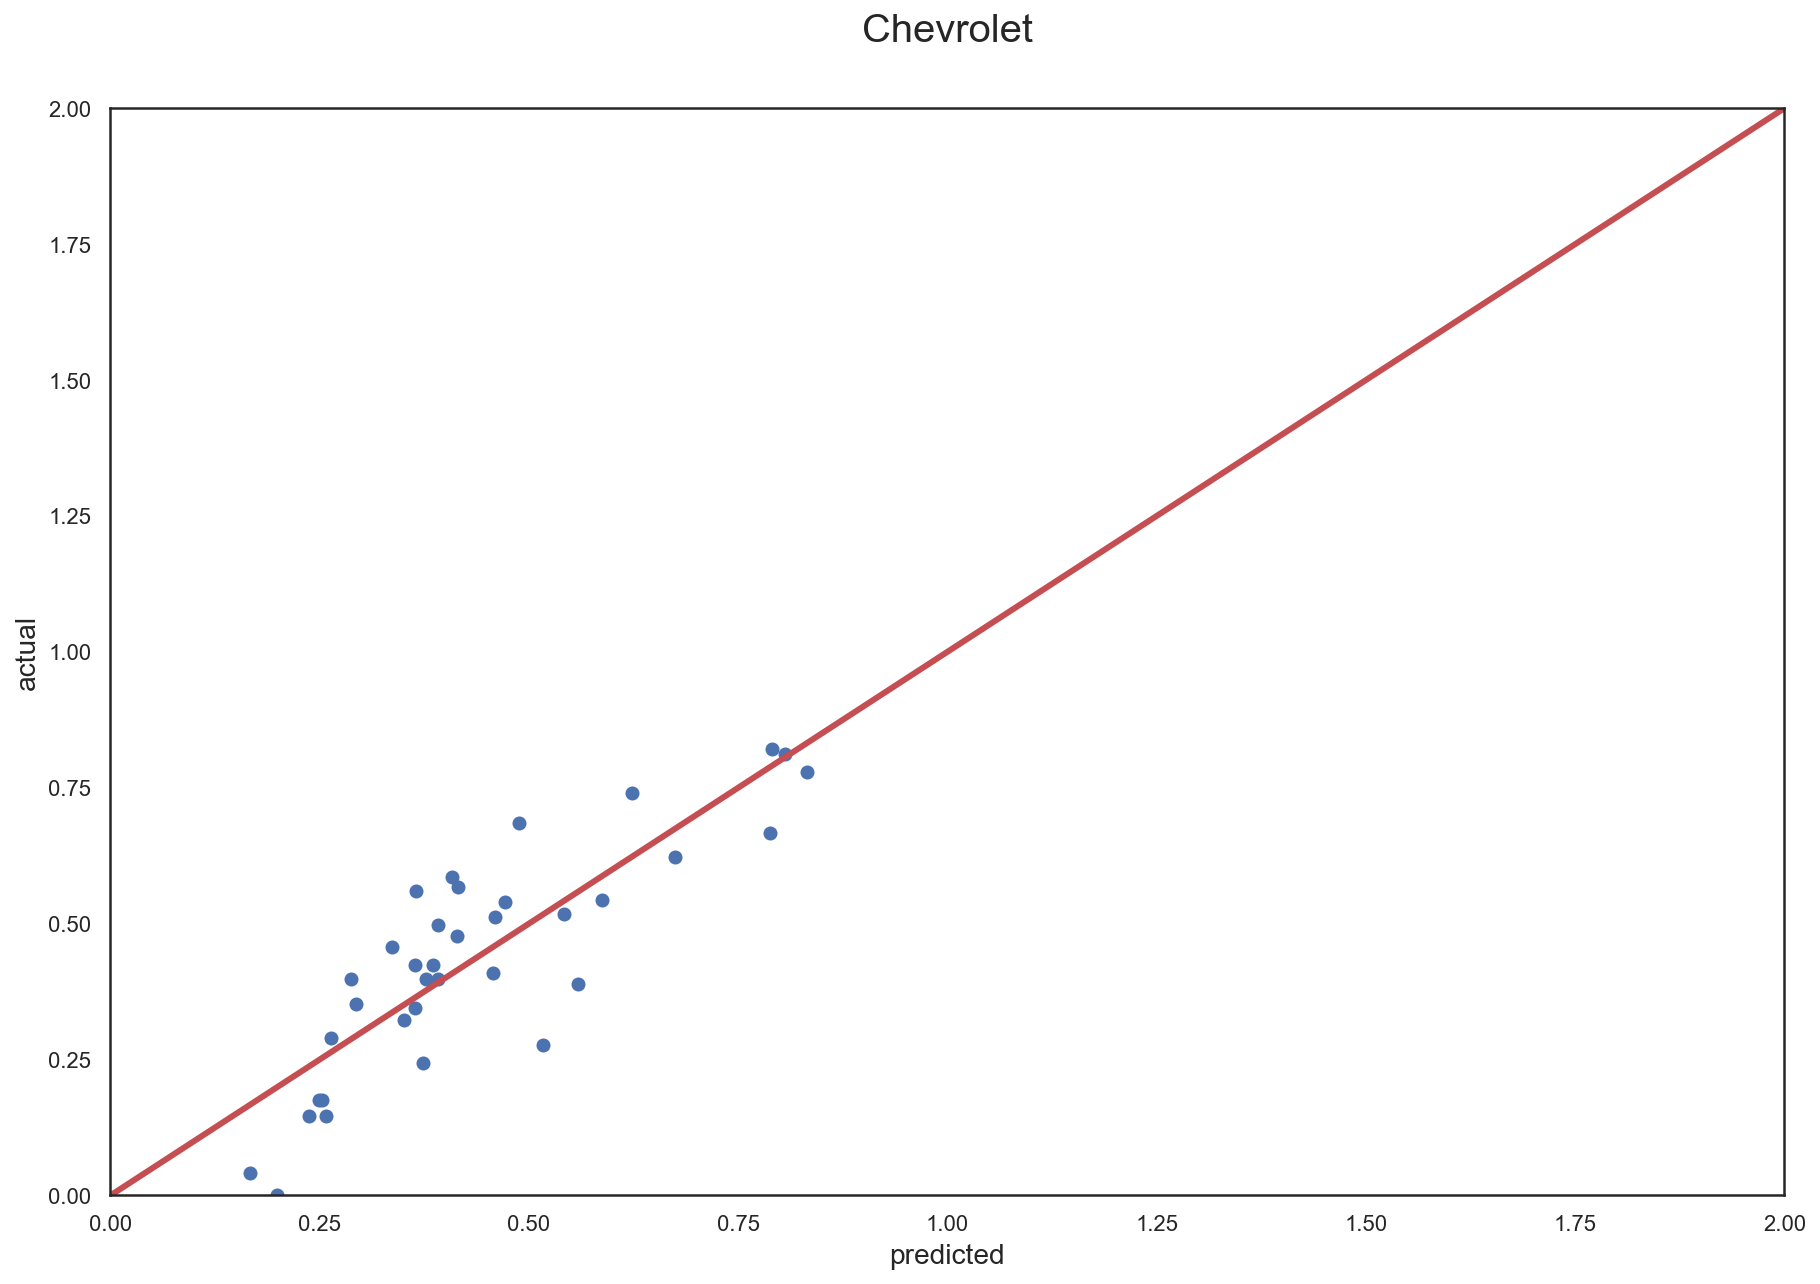

None
Skoda
explained_variance_score: 0.7163767147819708
mean_squared_errors: 0.023527143669037767
r2_score: 0.684862303545033
None


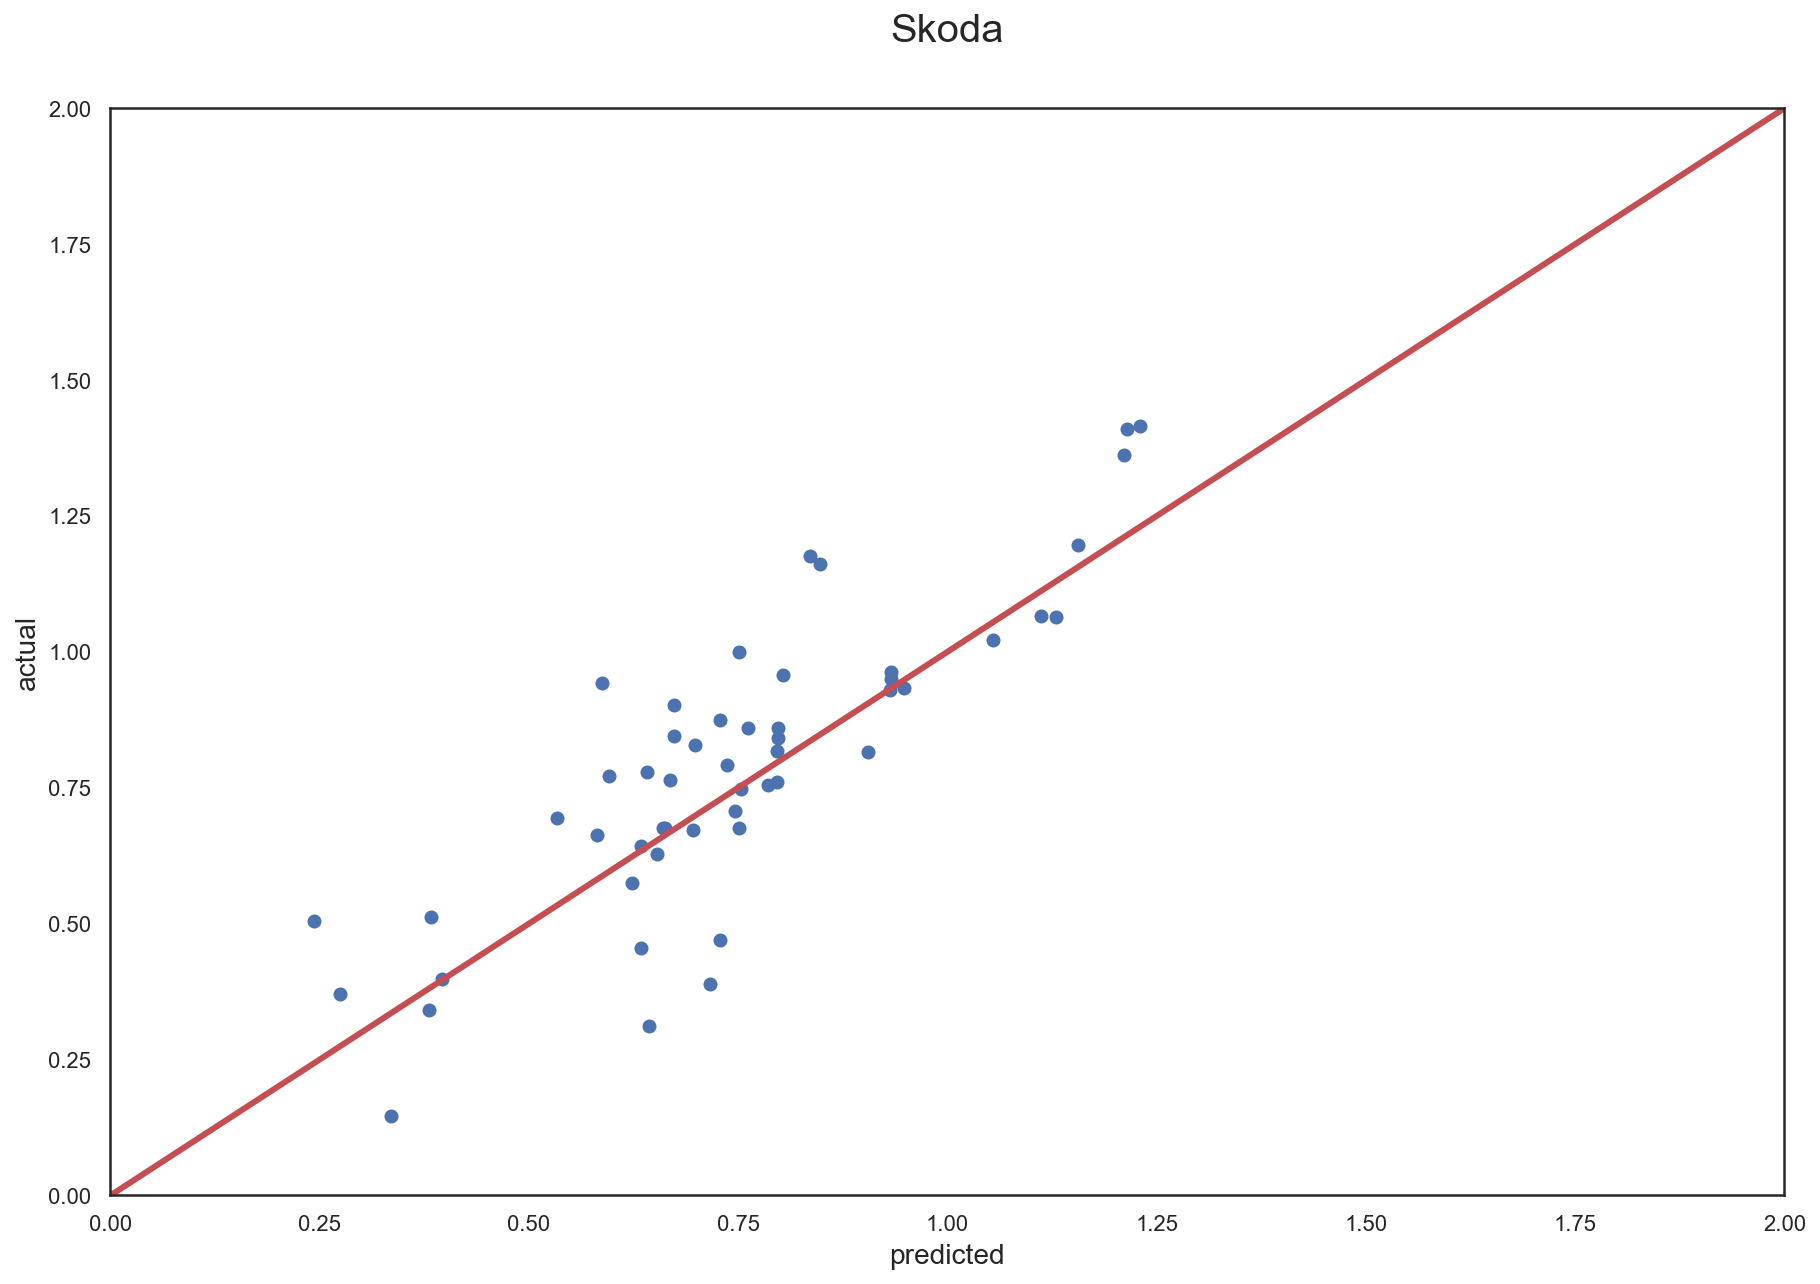

None
Mini
explained_variance_score: 0.7217944901026194
mean_squared_errors: 0.002536972541431529
r2_score: 0.6691999951849981
None


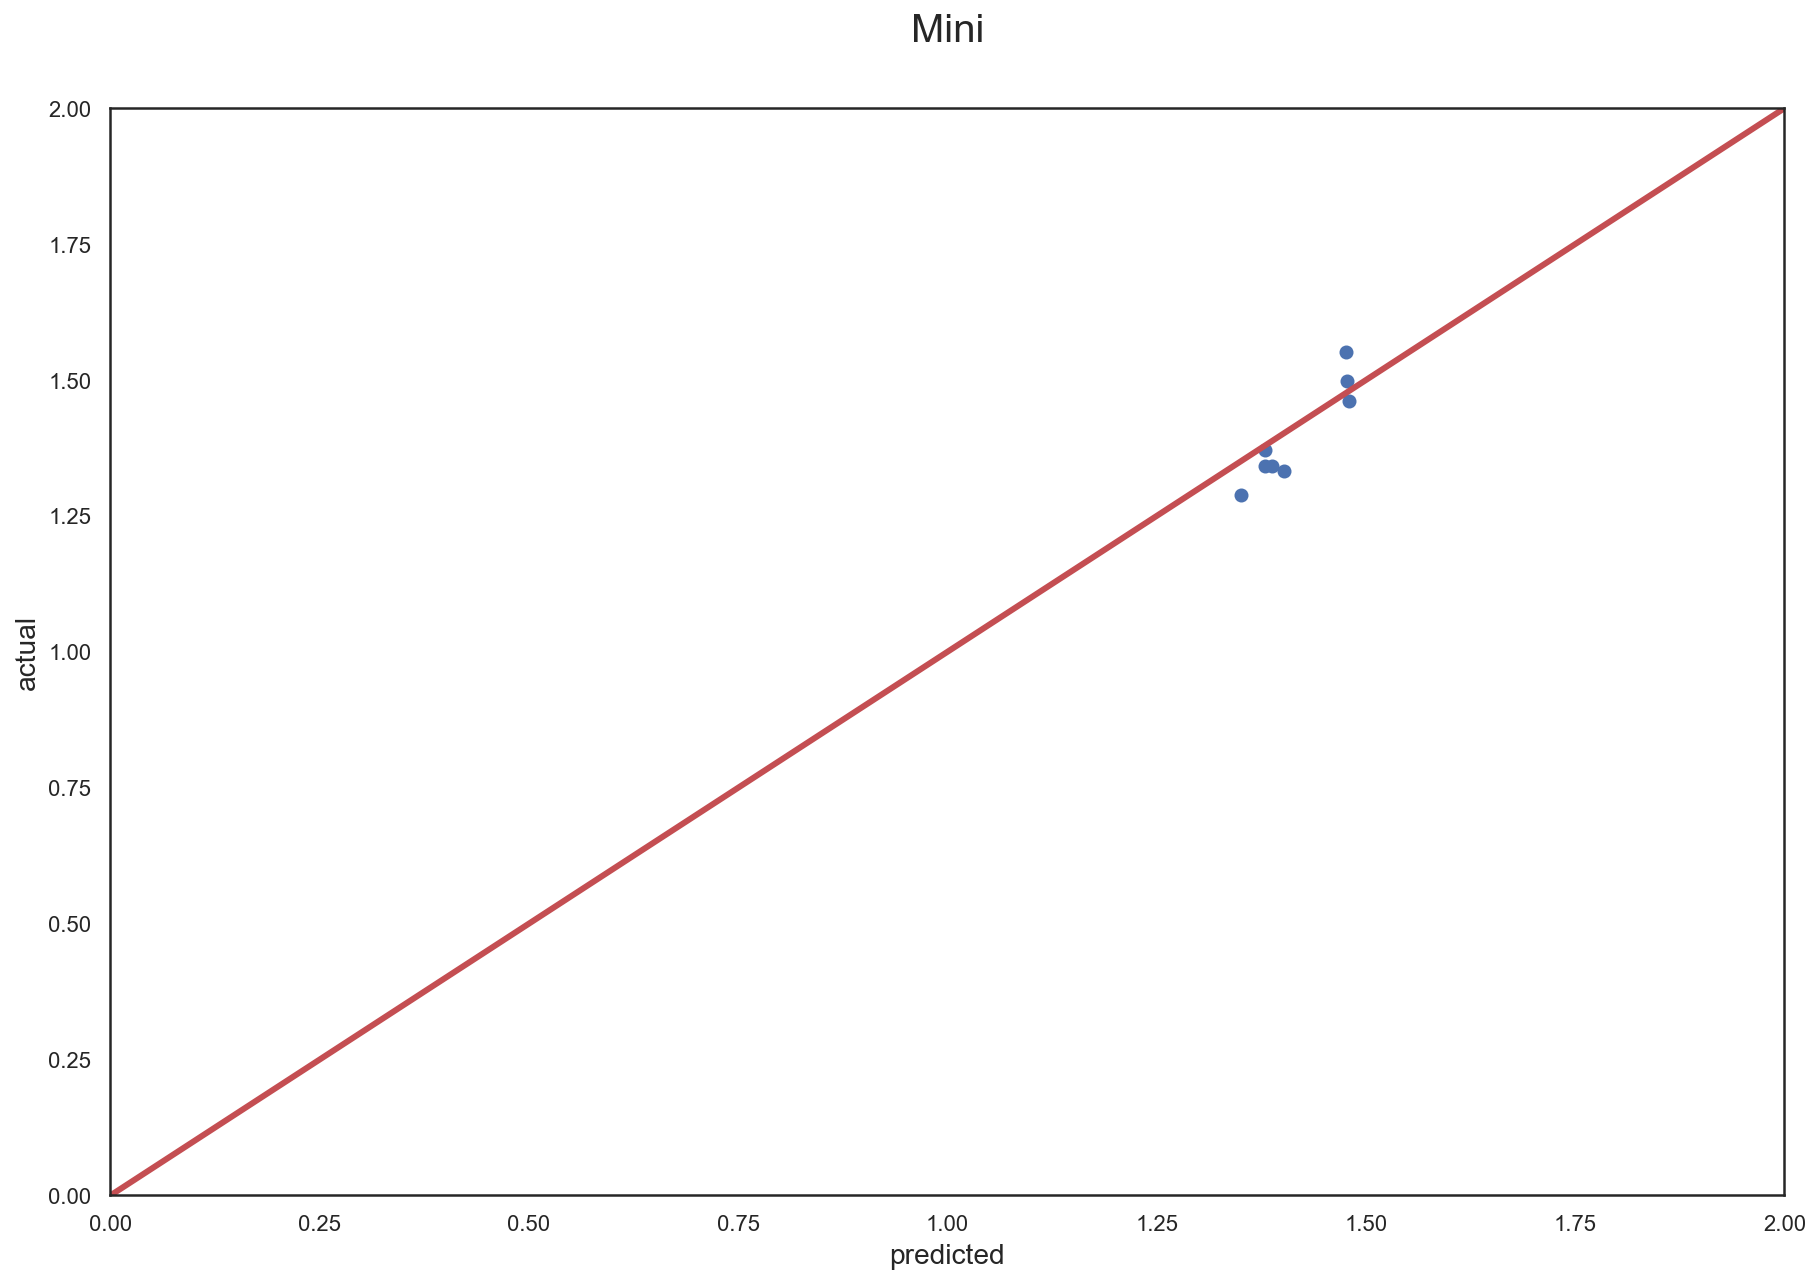

None
Fiat
explained_variance_score: 0.7000683060711518
mean_squared_errors: 0.06142763066555154
r2_score: 0.3905196184559001
None


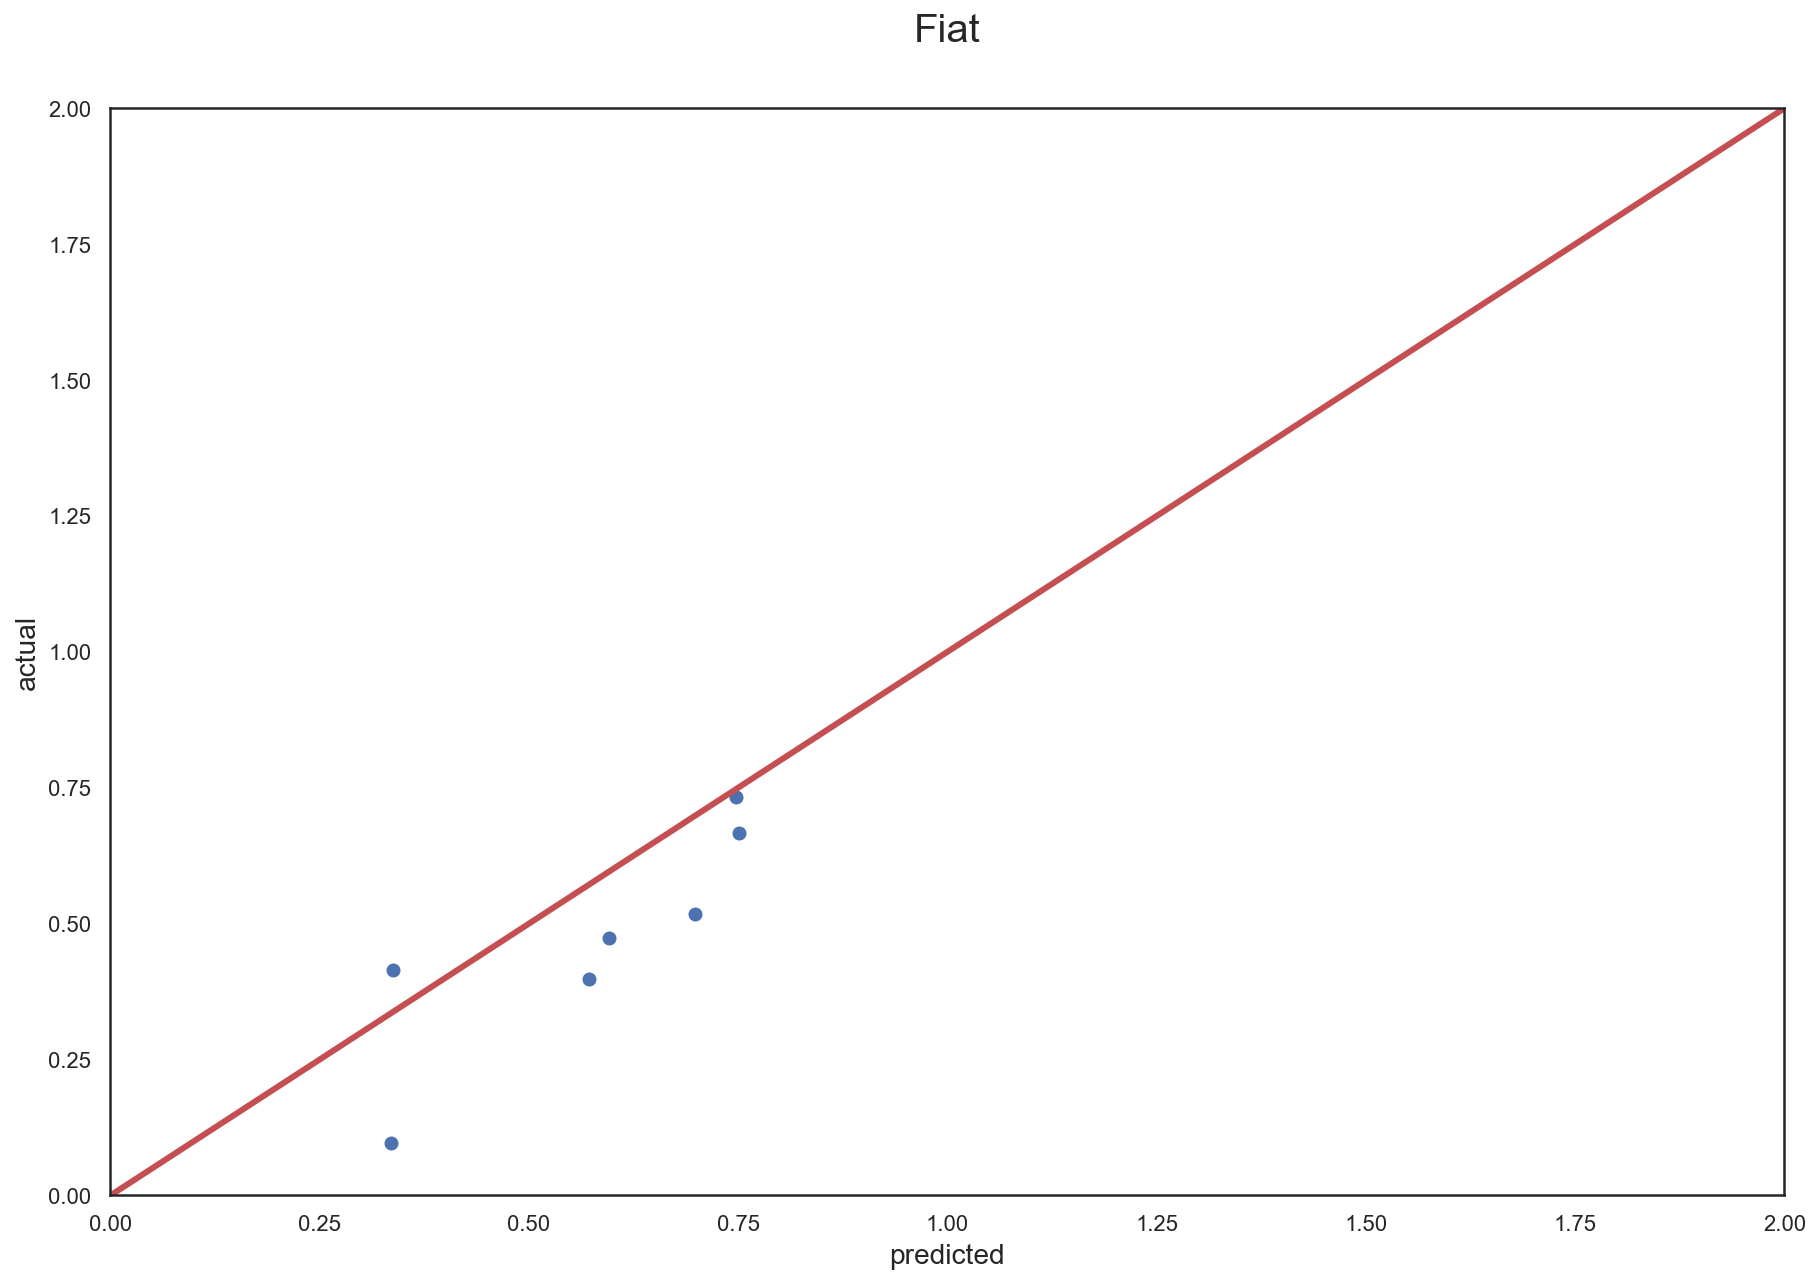

None
Jeep
explained_variance_score: 0.05550697572795904
mean_squared_errors: 0.003051781983058226
r2_score: -0.51567467875578
None


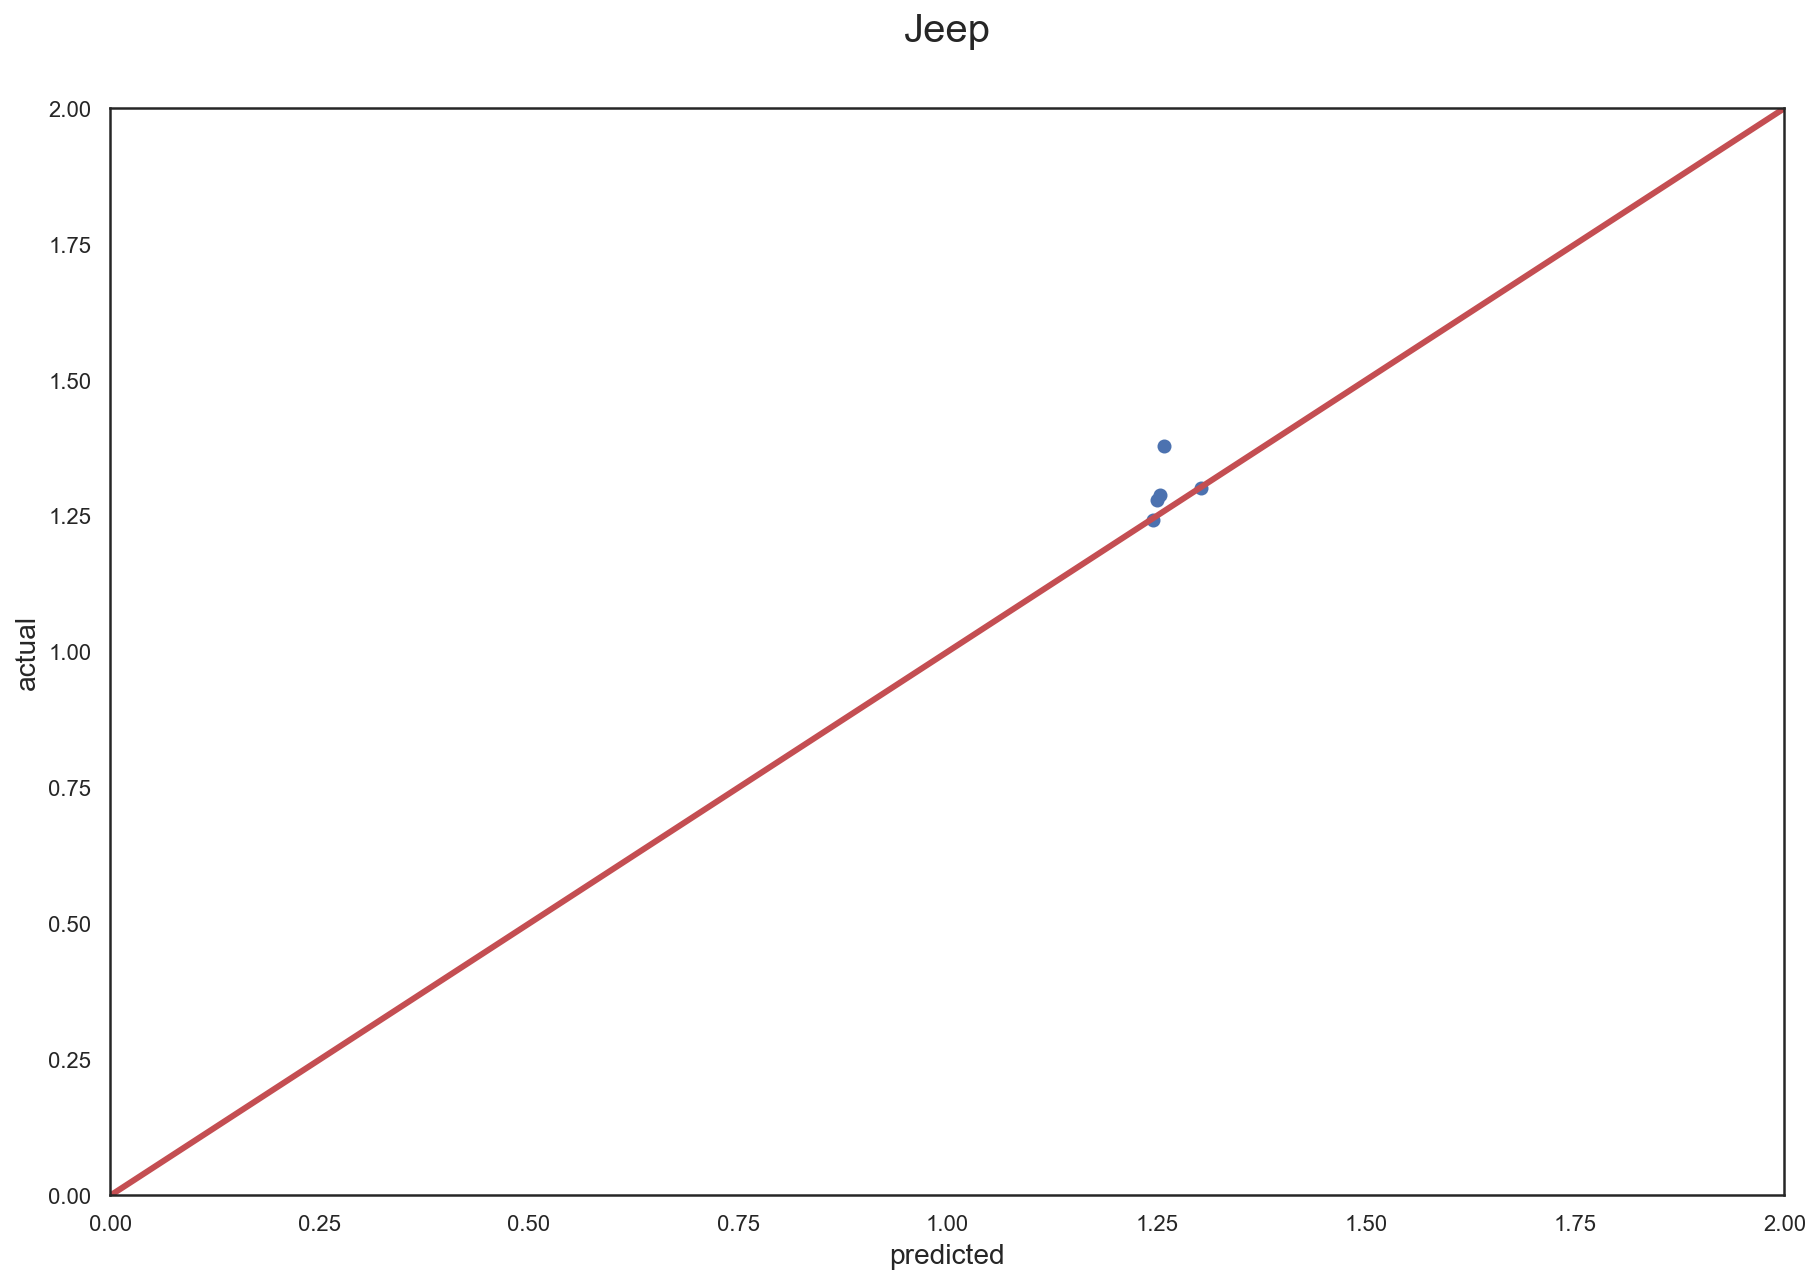

None
Smart
Ambassador
Isuzu
explained_variance_score: 1.0
mean_squared_errors: 0.03688045803322696
r2_score: nan
None


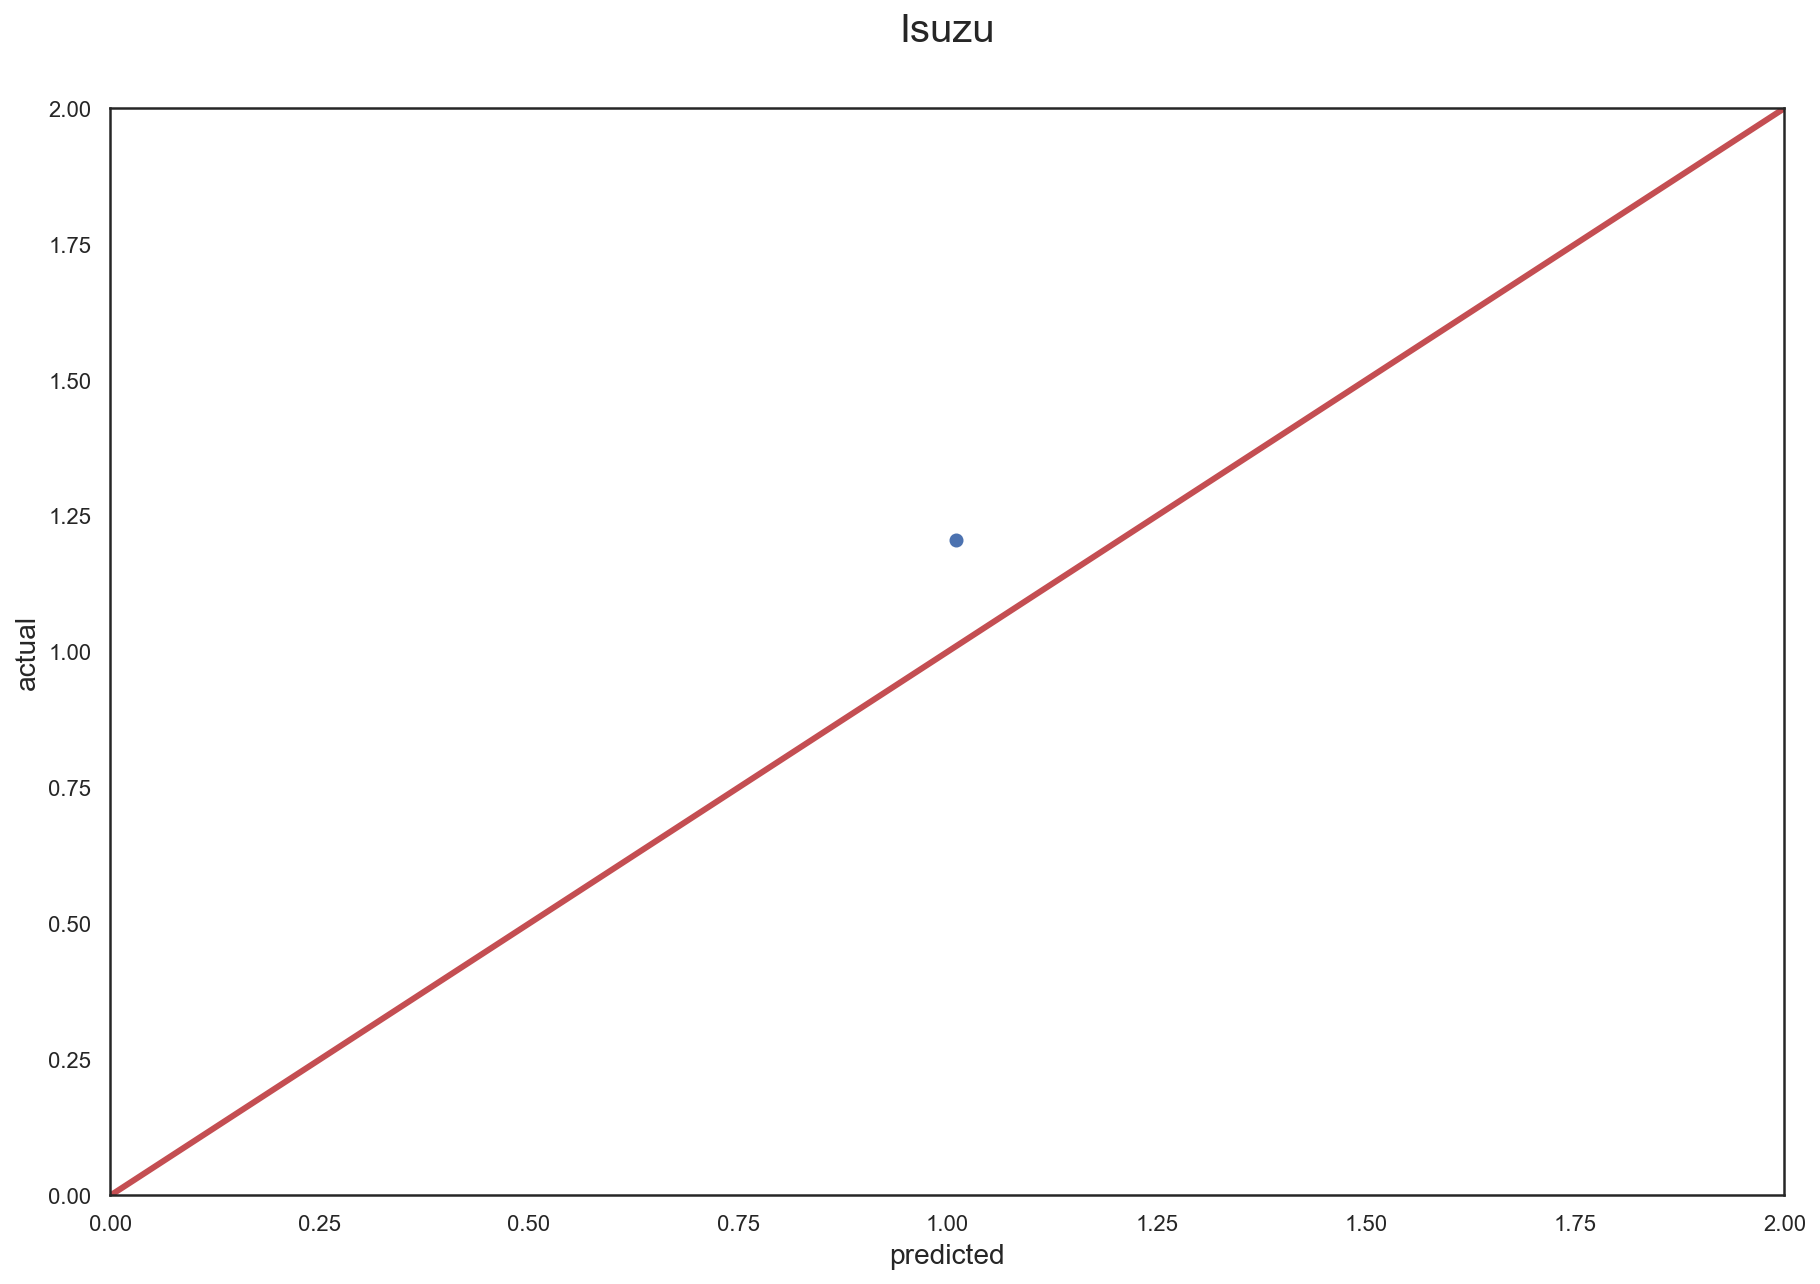

None
Force
explained_variance_score: 1.0
mean_squared_errors: 0.0019380082197384522
r2_score: nan
None


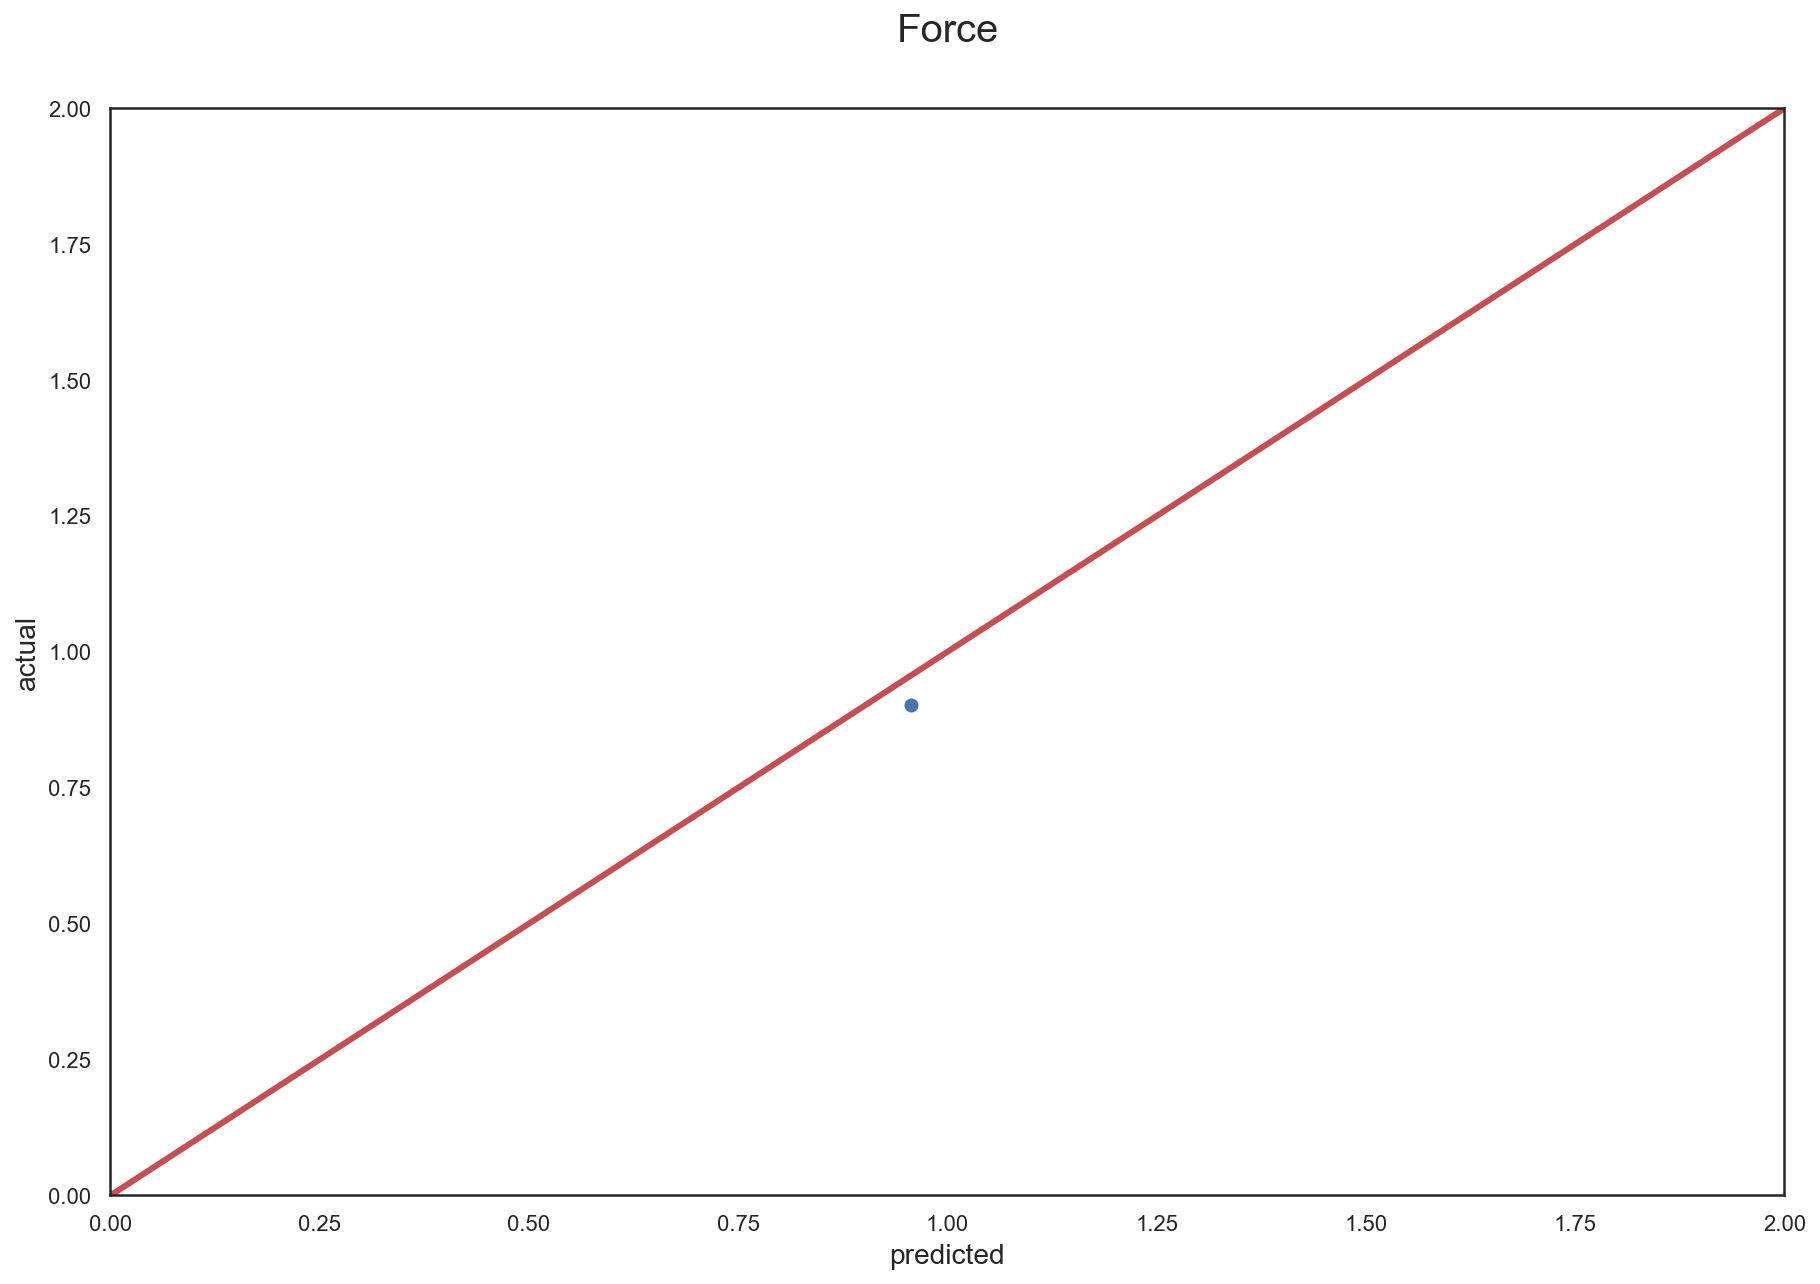

None
Bentley
Lamborghini


In [207]:
for i in car_t['Brand'].unique():
    X = get_Brand_df(i).drop(['Price', 'Car_name', 'Brand'], axis=1)
    y = np.log10(get_Brand_df(i)['Price'])
    
    try:
        print('\033[91m' + '\033[1m' + i + '\033[0m')
        print(get_results_rf(X,y))
        print(get_graph_rf(X,y))
    except:
        pass


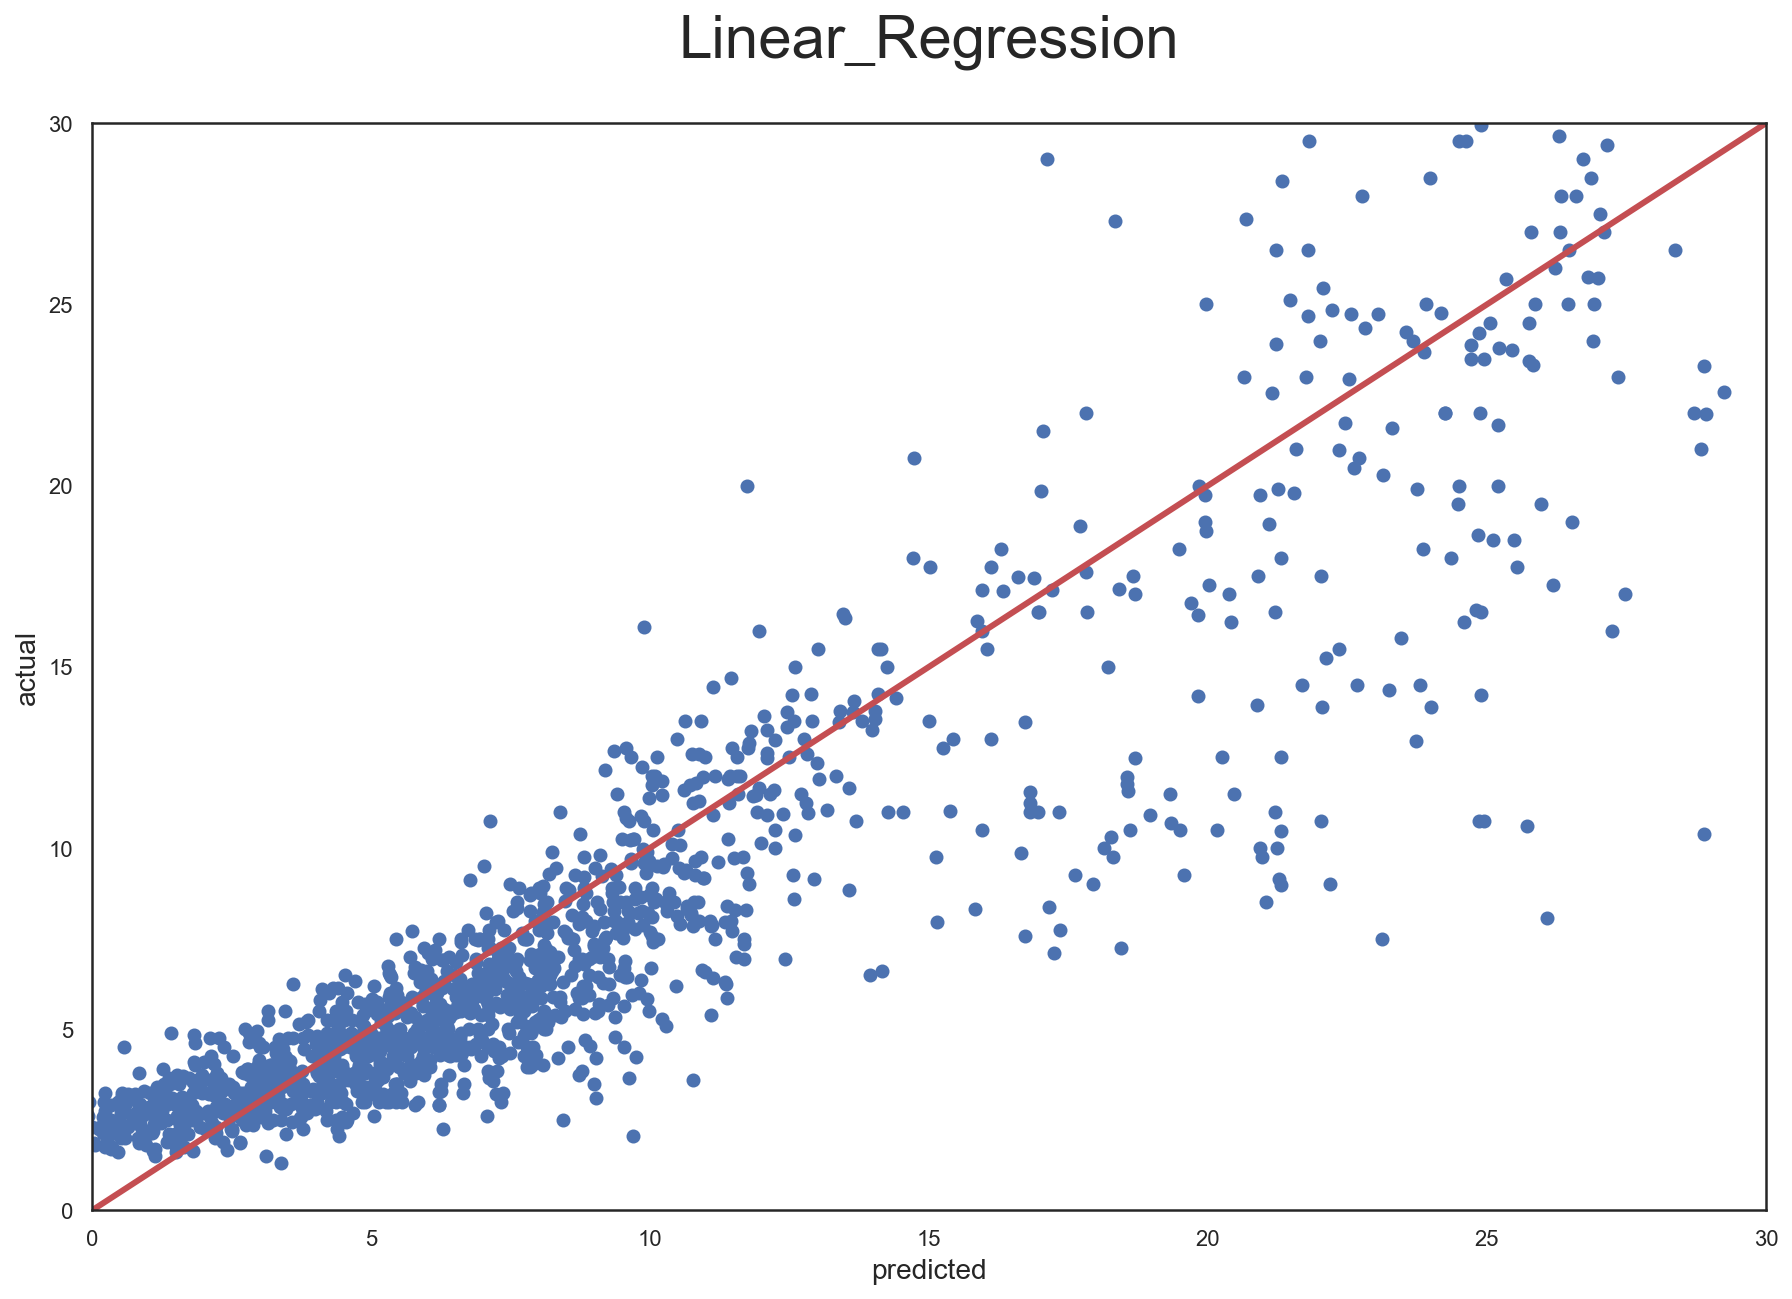

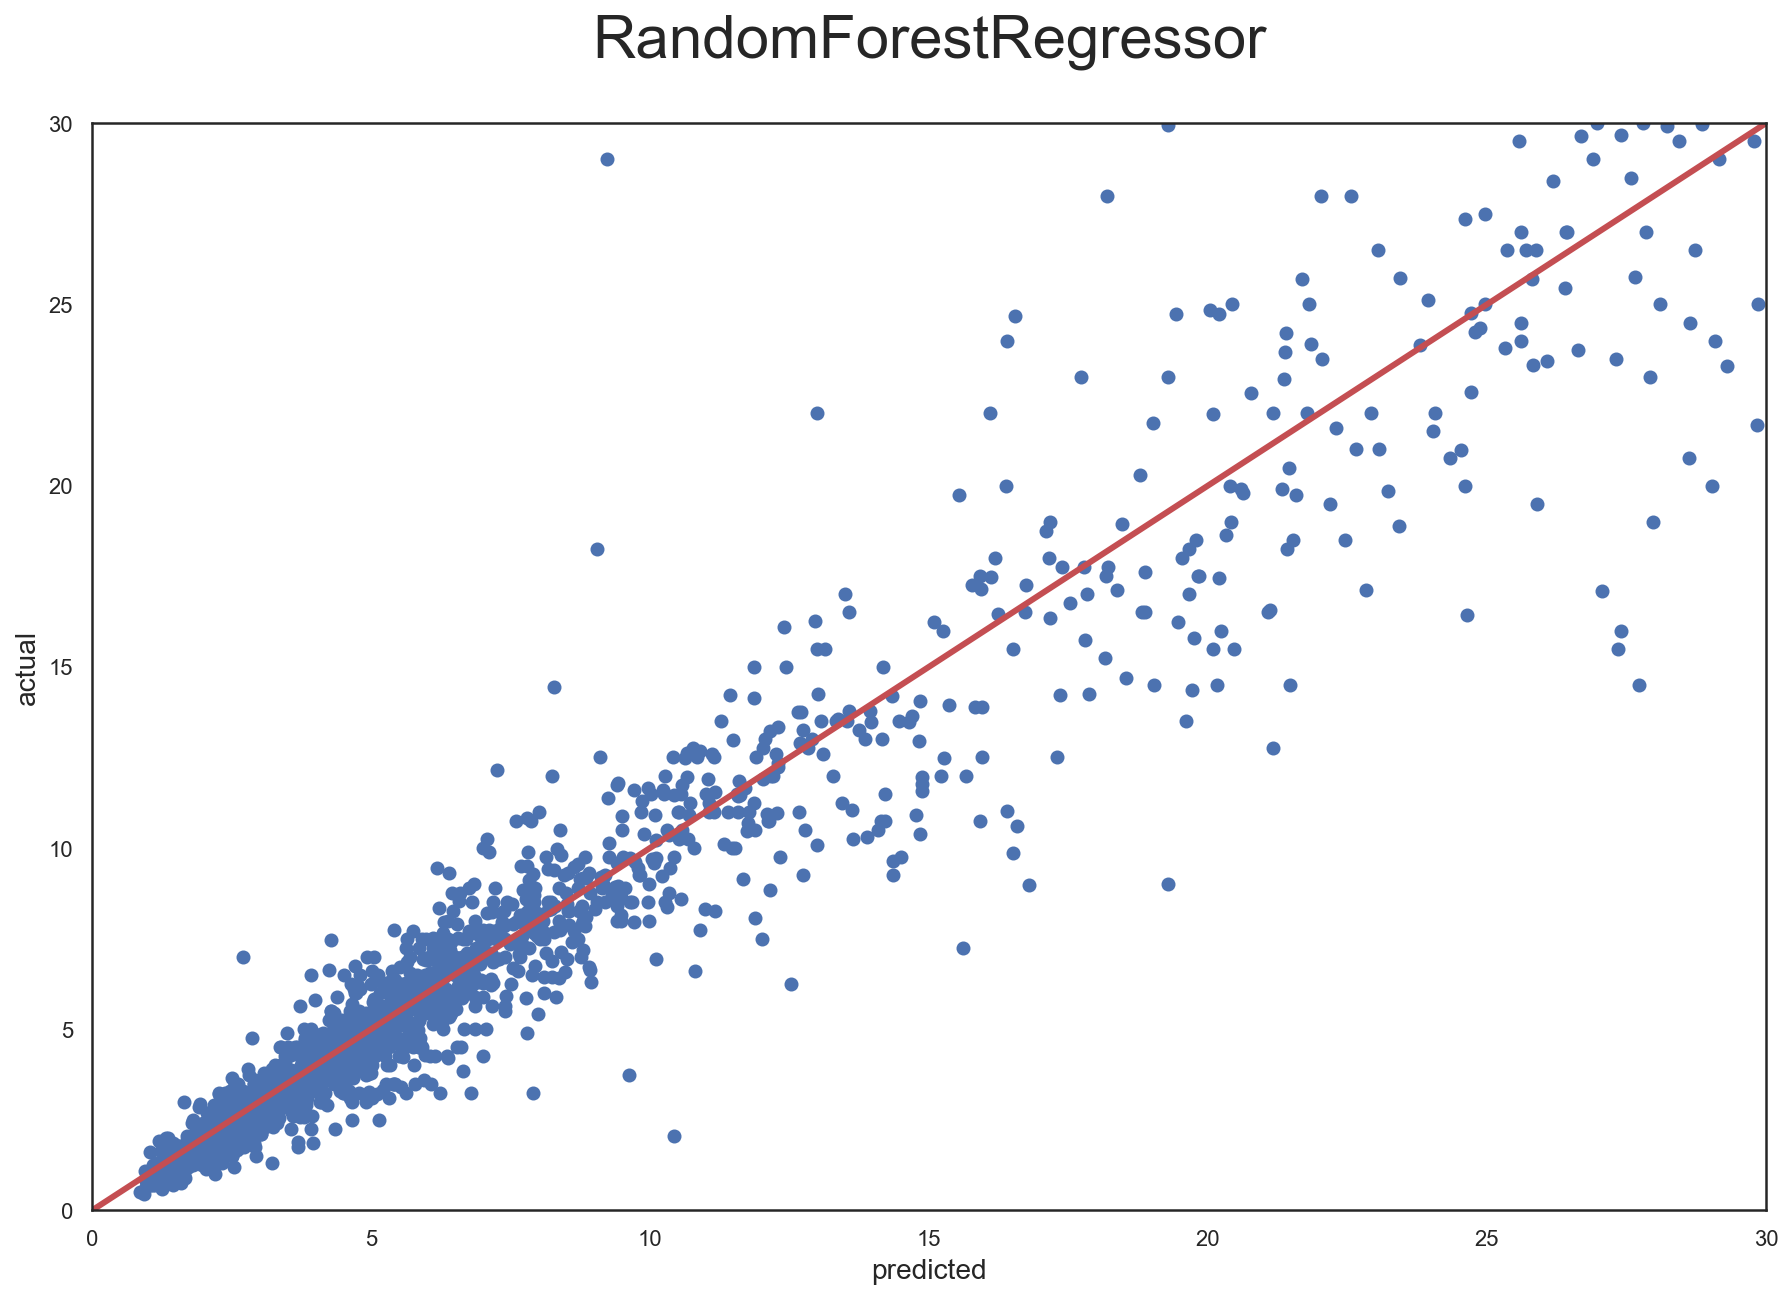

In [154]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('Linear_Regression', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

predicted = rf_reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('RandomForestRegressor', fontsize=30, y=1.05)

plt.show()

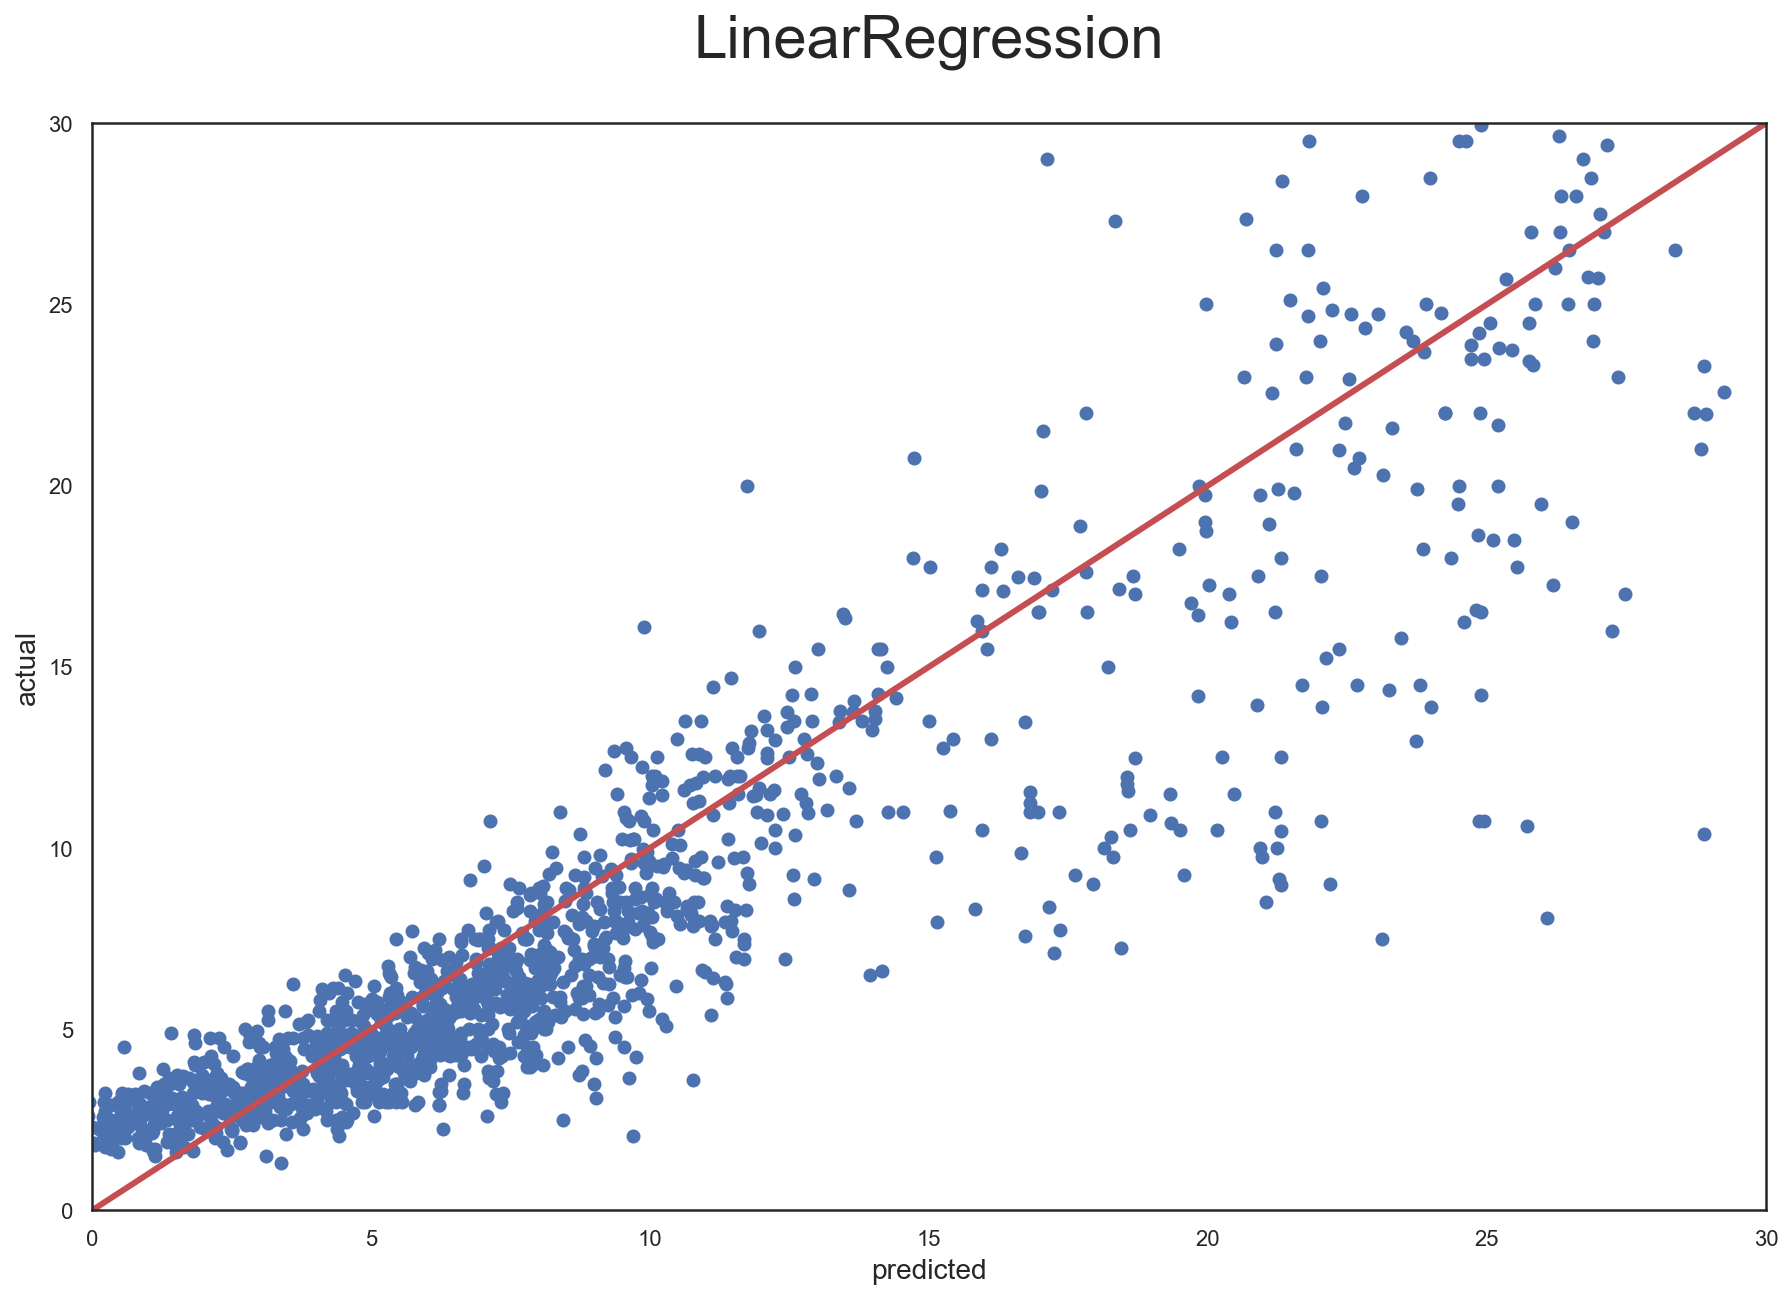

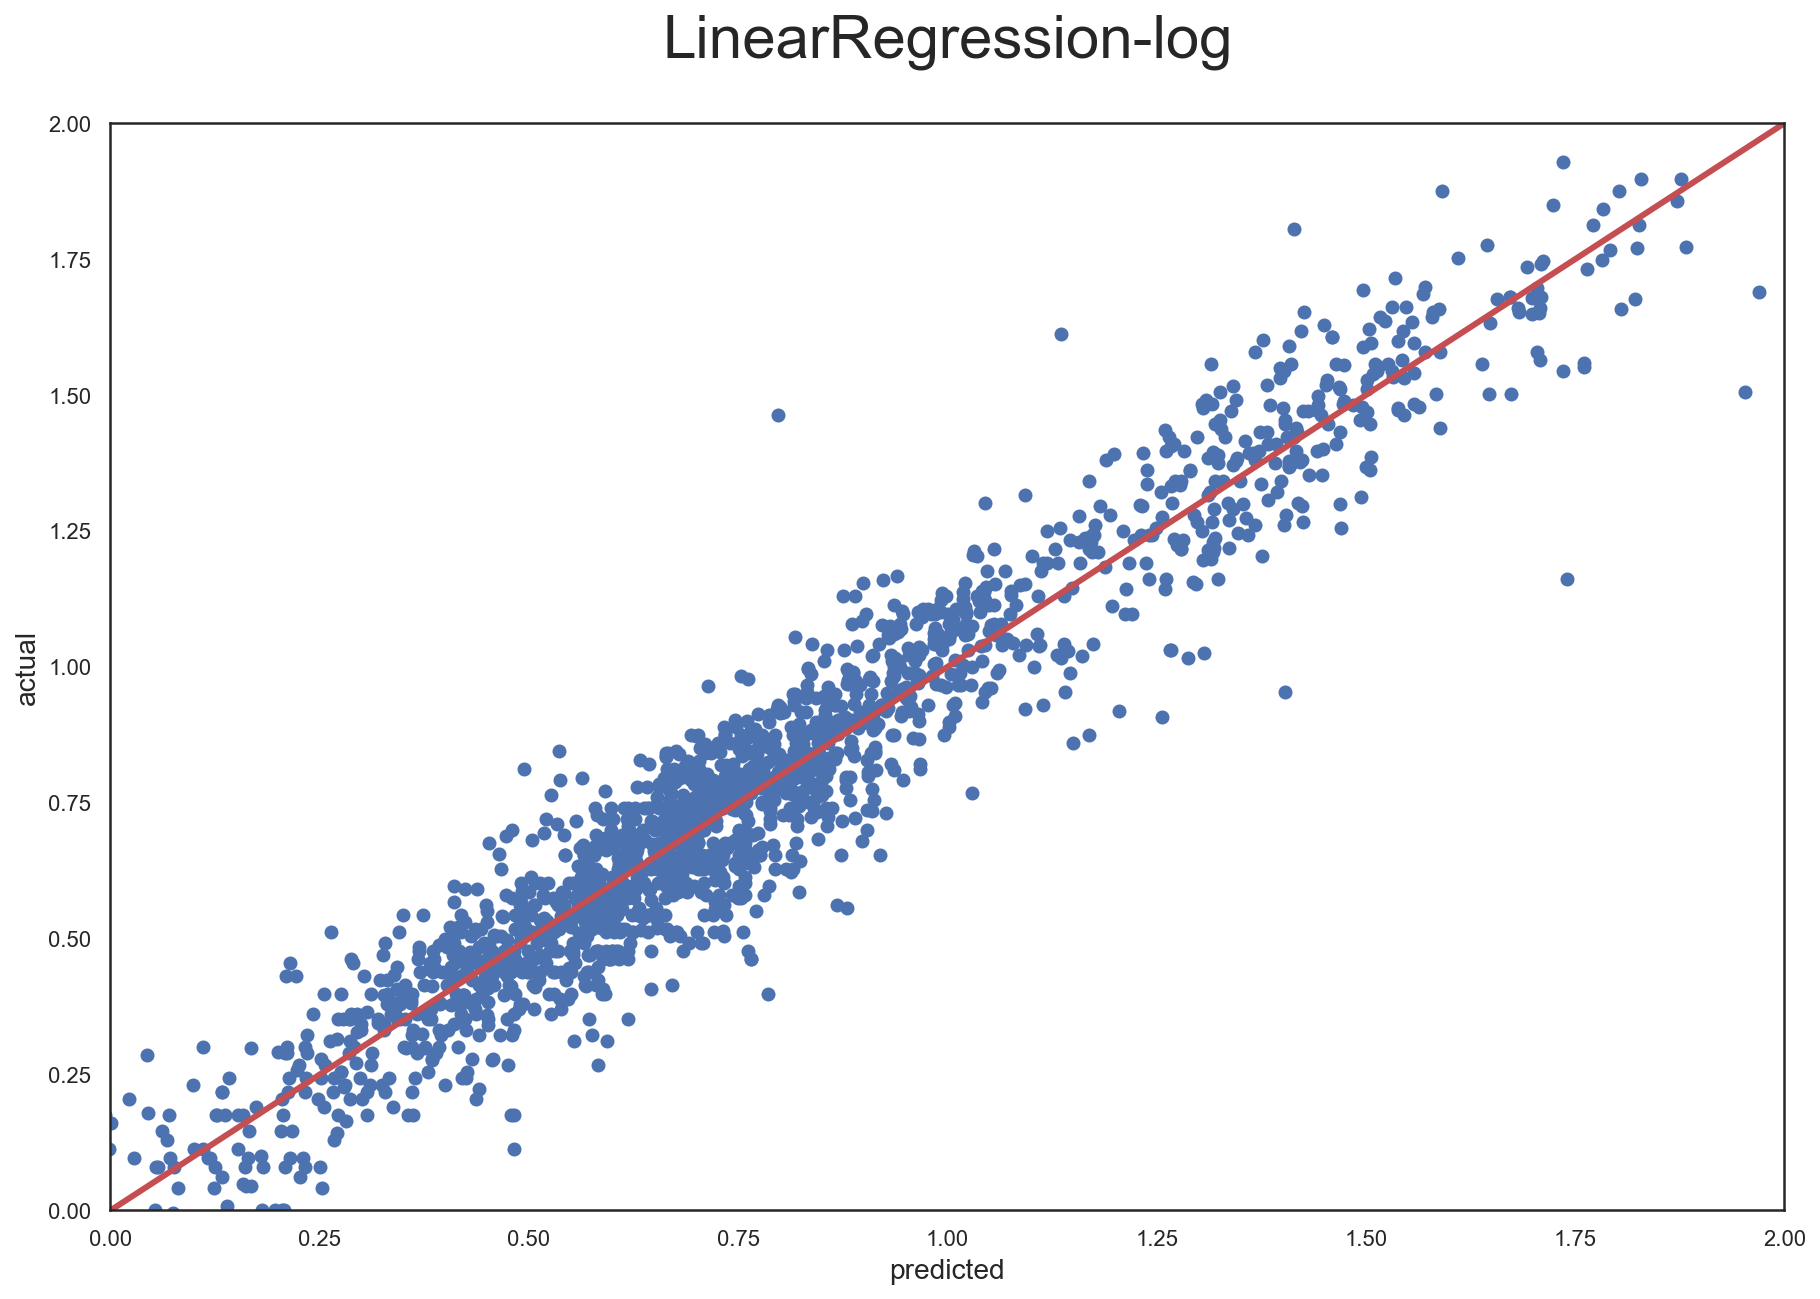

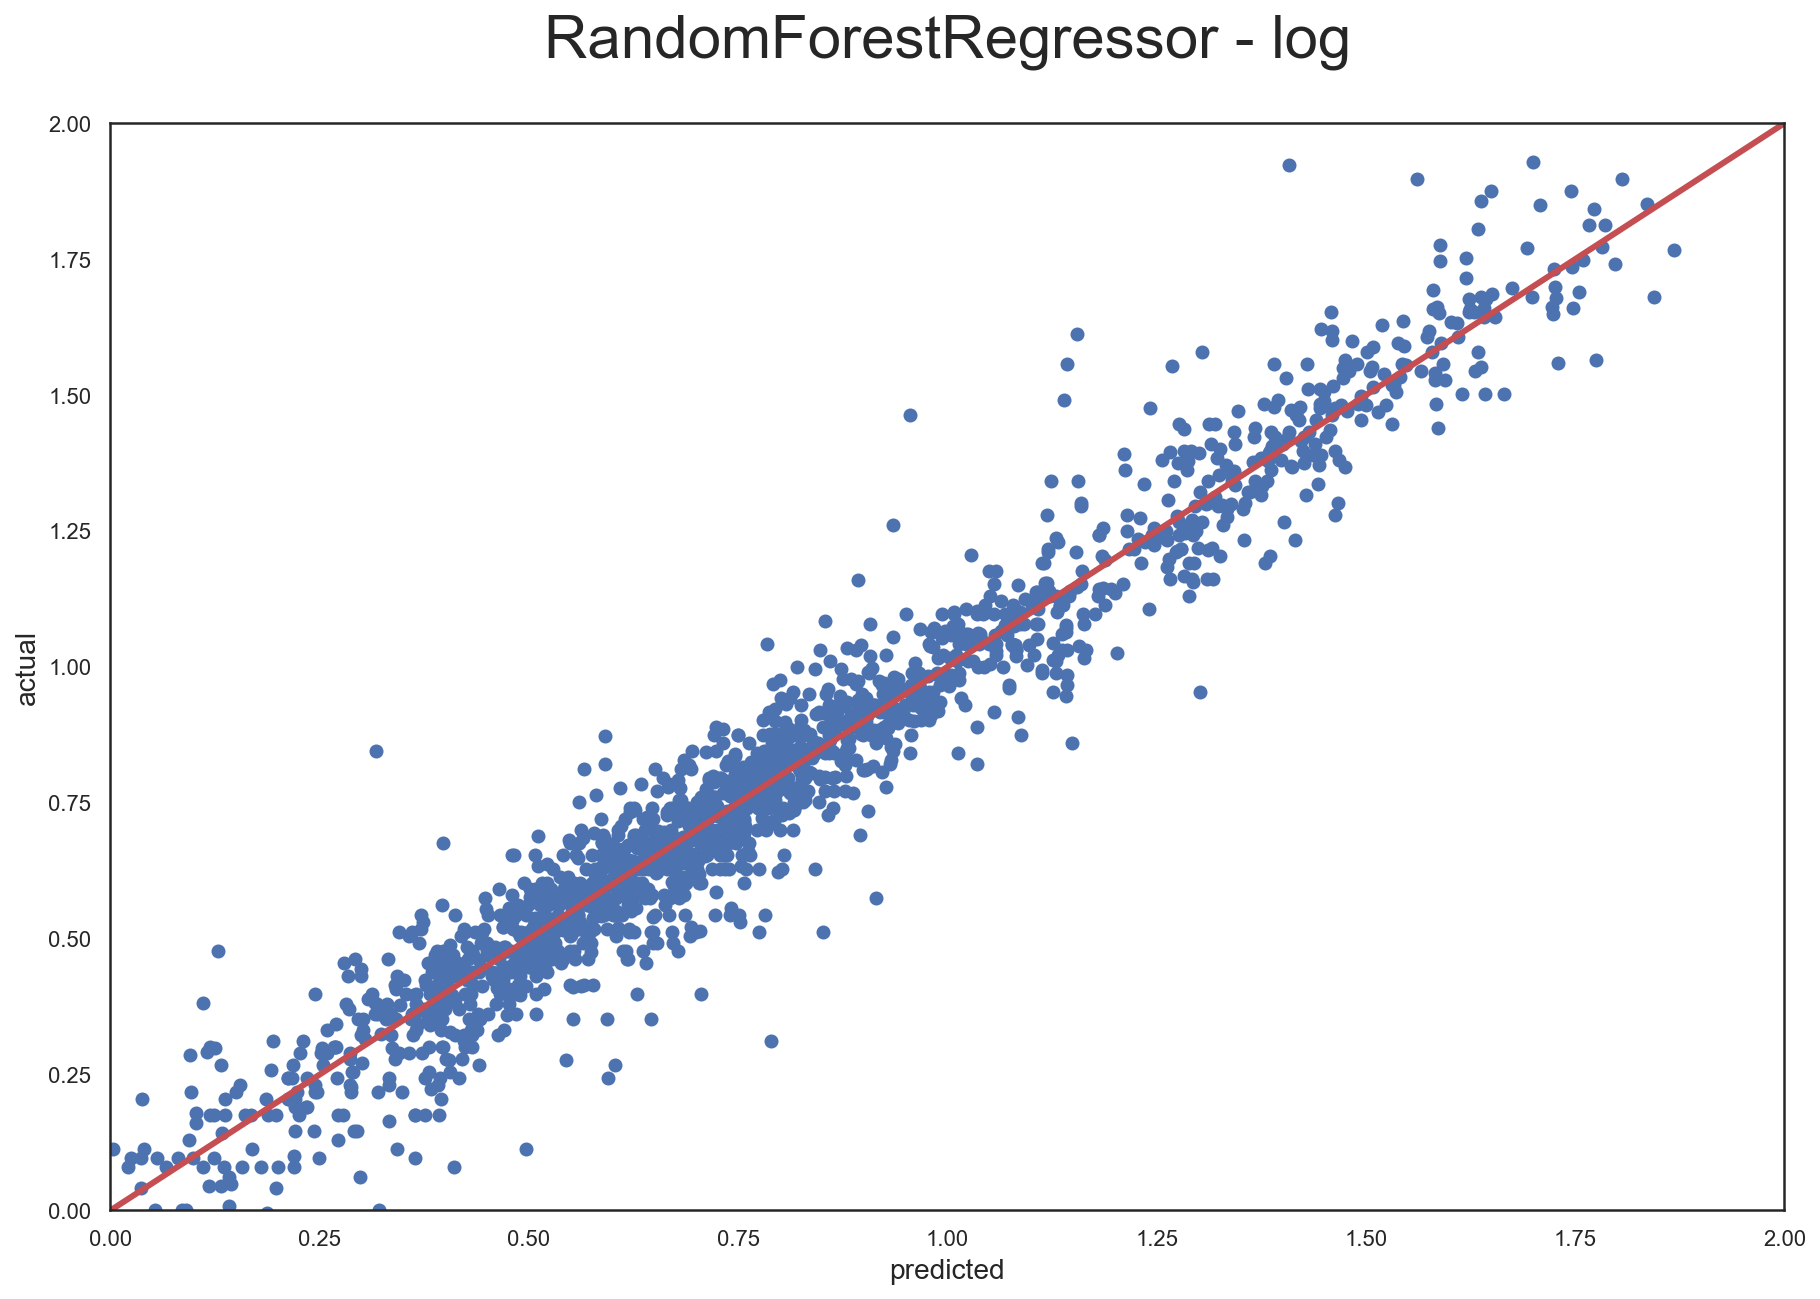

In [153]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('LinearRegression', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 2, 0, 2])  
line = plt.plot([0,2], [0,2])
plt.setp(line, color='r', linewidth=3.0)
plt.title('LinearRegression-log', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(15,10))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 2, 0, 2])  
line = plt.plot([0,2], [0,2])
plt.setp(line, color='r', linewidth=3.0)
plt.title('RandomForestRegressor - log', fontsize=30, y=1.05)

plt.show()

# 분석

In [106]:
import statsmodels.api as sm

In [107]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

ols_reg = sm.OLS(y_train, X_train).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     298.2
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        20:08:01   Log-Likelihood:                -13071.
No. Observations:                4211   AIC:                         2.624e+04
Df Residuals:                    4164   BIC:                         2.653e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       1.0230      0.032     32.381      0.000       0.961       1.085
Kilometers_Driven       2.607e-06   8.08e-07      3.228      0.001    1.02e-06    4.19e-06
Mile                      -0.1503      0.034     -4.374      0.000      -0.218      -0.083
Pow                        0.0945      0.003     29.835      0.000       0.088       0.101
Location_Ahmedabad      -213.9756      6.580    -32.518      0.000    -226.876    -201.075
Location_Bangalore      -211.3277      6.571    -32.163      0.000    -224.209    -198.446
Location_Chennai        -212.5741      6.537    -32.519      0.000    -225.390    -199.758
Location_Coimbatore     -212.0483      6.634    -31.962      0.000    -225.055    -199.041
Location_Delhi          -214.3673      6.576    -32.599      0.000    -227.260    -201.475
Location_Hyderabad      -212.0349      6.557    -32.335      0.000    -224.891    -199.179
Location_Jaipur         -212.9402      6.553    -32.495      0.000    -225.788    -200.093
Location_Kochi          -213.6776      6.640    -32.181      0.000    -226.695    -200.660
Location_Kolkata        -214.5876      6.570    -32.661      0.000    -227.469    -201.707
Location_Mumbai         -214.2116      6.580    -32.555      0.000    -227.112    -201.311
Location_Pune           -213.5719      6.559    -32.562      0.000    -226.431    -200.713
Fuel_Type_CNG           -586.3388     18.069    -32.450      0.000    -621.764    -550.914
Fuel_Type_Diesel        -586.2189     18.091    -32.403      0.000    -621.688    -550.750
Fuel_Type_LPG           -585.3717     18.139    -32.271      0.000    -620.935    -549.809
Fuel_Type_Petrol        -587.3877     18.097    -32.458      0.000    -622.867    -551.908
Transmission_Automatic -1172.6109     36.167    -32.422      0.000   -1243.517   -1101.705
Transmission_Manual    -1172.7060     36.124    -32.464      0.000   -1243.527   -1101.885
Brand_Ambassador         -77.8145      5.787    -13.447      0.000     -89.160     -66.469
Brand_Audi               -78.6329      2.544    -30.906      0.000     -83.621     -73.645
Brand_BMW                -80.2507      2.508    -32.001      0.000     -85.167     -75.334
Brand_Bentley            -72.0630      5.803    -12.417      0.000     -83.441     -60.685
Brand_Chevrolet          -88.1009      2.582    -34.128      0.000     -93.162     -83.040
Brand_Datsun             -89.0972      3.237    -27.522      0.000     -95.444     -82.750
Brand_Fiat               -87.5560      2.799    -31.282      0.000     -93.043     -82.069
Brand_Force              -89.4596      5.853    -15.283      0.000    -100.935     -77.984
Brand_Ford               -86.8065      2.590    -33.519      0.000     -91.884     -81.729
Brand_Honda              -88.2018      2.550    -34.595      0.000     -93.200  

In [108]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

ols_reg = sm.OLS(y_train, X_train).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1105.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        20:08:01   Log-Likelihood:                 3591.2
No. Observations:                4211   AIC:                            -7088.
Df Residuals:                    4164   BIC:                            -6790.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       0.0564      0.001     93.418      0.000       0.055       0.058
Kilometers_Driven      -1.757e-08   1.54e-08     -1.138      0.255   -4.78e-08    1.27e-08
Mile                      -0.0111      0.001    -16.948      0.000      -0.012      -0.010
Pow                        0.0027   6.06e-05     45.314      0.000       0.003       0.003
Location_Ahmedabad       -11.7161      0.126    -93.113      0.000     -11.963     -11.469
Location_Bangalore       -11.6617      0.126    -92.817      0.000     -11.908     -11.415
Location_Chennai         -11.7169      0.125    -93.735      0.000     -11.962     -11.472
Location_Coimbatore      -11.6852      0.127    -92.109      0.000     -11.934     -11.437
Location_Delhi           -11.7549      0.126    -93.483      0.000     -12.001     -11.508
Location_Hyderabad       -11.6759      0.125    -93.115      0.000     -11.922     -11.430
Location_Jaipur          -11.7563      0.125    -93.821      0.000     -12.002     -11.511
Location_Kochi           -11.7430      0.127    -92.488      0.000     -11.992     -11.494
Location_Kolkata         -11.8165      0.126    -94.054      0.000     -12.063     -11.570
Location_Mumbai          -11.7405      0.126    -93.310      0.000     -11.987     -11.494
Location_Pune            -11.7425      0.125    -93.625      0.000     -11.988     -11.497
Fuel_Type_CNG            -32.2661      0.346    -93.385      0.000     -32.944     -31.589
Fuel_Type_Diesel         -32.1480      0.346    -92.928      0.000     -32.826     -31.470
Fuel_Type_LPG            -32.3050      0.347    -93.135      0.000     -32.985     -31.625
Fuel_Type_Petrol         -32.2905      0.346    -93.313      0.000     -32.969     -31.612
Transmission_Automatic   -64.4817      0.692    -93.239      0.000     -65.838     -63.126
Transmission_Manual      -64.5278      0.691    -93.416      0.000     -65.882     -63.174
Brand_Ambassador          -4.4664      0.111    -40.363      0.000      -4.683      -4.249
Brand_Audi                -4.2775      0.049    -87.921      0.000      -4.373      -4.182
Brand_BMW                 -4.2998      0.048    -89.666      0.000      -4.394      -4.206
Brand_Bentley             -4.4047      0.111    -39.692      0.000      -4.622      -4.187
Brand_Chevrolet           -4.6605      0.049    -94.412      0.000      -4.757      -4.564
Brand_Datsun              -4.6764      0.062    -75.543      0.000      -4.798      -4.555
Brand_Fiat                -4.6315      0.054    -86.535      0.000      -4.736      -4.527
Brand_Force               -4.4530      0.112    -39.784      0.000      -4.672      -4.234
Brand_Ford                -4.5436      0.050    -91.748      0.000      -4.641      -4.447
Brand_Honda               -4.4889      0.049    -92.076      0.000      -4.584  

In [109]:
# OLS
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

ols_reg = sm.OLS(y_train, X_train).fit()
pred_test = ols_reg.predict(X_test)

print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
print('r2_score: {}'.format(r2_score(y_test, pred_test)))

explained_variance_score: 0.8492123241574221
mean_squared_errors: 0.022928380245494748
r2_score: 0.849142936113837


In [110]:
# LinearRegression
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred_test = reg.predict(X_test)

print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
print('r2_score: {}'.format(r2_score(y_test, pred_test)))

explained_variance_score: 0.9246493048682116
mean_squared_errors: 0.011452974939501334
r2_score: 0.9246452582504397


# 가격 예측

In [111]:
def get_car_price(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred = reg.predict(car)
    return(pred)

In [112]:
def get_car_price_rf(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)

    pred = rf_reg.predict(car)
    return(pred)

## 1. 마루티

In [132]:
get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1).columns

Index(['Year', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Owner',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [133]:
# 4.85
Mcar = np.array([[2017, 28344, 22, 1197, 81.8, 1,
                 0,0,0,
                 0,1,0,
                 0,0,0,
                 0,0,0,
                 1,0,1]])

In [134]:
# Linear_Regression
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = get_Brand_df('Maruti')['Price']

get_car_price(Mcar)

array([5.1829899])

In [135]:
# RandomForest_Regressor
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = get_Brand_df('Maruti')['Price']

get_car_price_rf(Mcar)

array([6.2779])

In [159]:
# LinearRegression - log
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Maruti')['Price'])

math.pow(10,get_car_price(Mcar))

5.087567340177431

In [160]:
# RandomForestRegressor - log
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Maruti')['Price'])

math.pow(10,get_car_price_rf(Mcar))

6.231135791151171

In [118]:
get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1).columns

Index(['Year', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Owner',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

## 2. 현대

In [119]:
# 5.55
Hcar = np.array([[2017, 36643, 24, 1186, 73.97, 1,
                 0,0,0,
                 0,0,0,
                 0,0,0,
                 1,0,1,
                 0,0,1]])

In [161]:
# LinearRegression - log
X = get_Brand_df('Hyundai').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Hyundai')['Price'])

math.pow(10,get_car_price(Hcar))

6.0163774263473915

In [163]:
# RandomForestRegressor - log
X = get_Brand_df('Hyundai').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Hyundai')['Price'])

math.pow(10,get_car_price_rf(Hcar))

4.633866393591652

In [164]:
# log모델
X = get_Brand_df('Hyundai').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Hyundai')['Price'])

get_car_price(Hcar)

array([0.77933507])

In [123]:
math.pow(10,0.77933507)

6.01637738337543

# 어느지역에서 팔아야 가격을 잘받을까

In [124]:
X = get_Brand_df('Hyundai').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = get_Brand_df('Hyundai')['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

ols_reg = sm.OLS(y_train, X_train).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     176.4
Date:                Wed, 19 May 2021   Prob (F-statistic):          7.90e-255
Time:                        20:08:09   Log-Likelihood:                -1384.9
No. Observations:                 768   AIC:                             2808.
Df Residuals:                     749   BIC:                             2896.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       0.5116      0.023     22.654      0.000       0.467       0.556
Kilometers_Driven      -4.643e-06    1.7e-06     -2.736      0.006   -7.97e-06   -1.31e-06
Mile                      -0.3580      0.037     -9.567      0.000      -0.431      -0.285
Eng                       -0.0029      0.001     -3.388      0.001      -0.005      -0.001
Pow                        0.0738      0.008      9.471      0.000       0.058       0.089
Owner                     -0.3117      0.138     -2.253      0.025      -0.583      -0.040
Location_Ahmedabad       -84.7694      3.787    -22.382      0.000     -92.205     -77.334
Location_Bangalore       -84.2938      3.786    -22.263      0.000     -91.727     -76.861
Location_Chennai         -84.8627      3.783    -22.433      0.000     -92.289     -77.436
Location_Coimbatore      -83.9779      3.823    -21.964      0.000     -91.484     -76.472
Location_Delhi           -85.3982      3.800    -22.476      0.000     -92.857     -77.939
Location_Hyderabad       -84.7457      3.761    -22.535      0.000     -92.128     -77.363
Location_Jaipur          -85.2363      3.793    -22.470      0.000     -92.683     -77.790
Location_Kochi           -85.0731      3.824    -22.249      0.000     -92.579     -77.567
Location_Kolkata         -86.1599      3.769    -22.858      0.000     -93.560     -78.760
Location_Mumbai          -85.1556      3.785    -22.496      0.000     -92.587     -77.724
Location_Pune            -85.0416      3.781    -22.492      0.000     -92.464     -77.619
Fuel_Type_Diesel        -466.3106     20.826    -22.391      0.000    -507.195    -425.427
Fuel_Type_Petrol        -468.4035     20.821    -22.497      0.000    -509.278    -427.529
Transmission_Automatic  -467.2185     20.824    -22.436      0.000    -508.100    -426.337
Transmission_Manual     -467.4956     20.822    -22.452      0.000    -508.372    -426.619
==============================================================================
Omnibus:                      109.879   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.026
Skew:                           0.664   Prob(JB):                     4.47e-81
Kurtosis:                       6.131   Cond. No.                     7.52e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [125]:
ols_reg.params[6:17].sort_values(ascending=False).index[0]

'Location_Coimbatore'

In [126]:
pd.DataFrame(ols_reg.params[6:17], columns=['coef']).sort_values(by='coef', ascending=False)

coef
Location_Coimbatore -83.977905
Location_Bangalore  -84.293791
Location_Hyderabad  -84.745682
Location_Ahmedabad  -84.769374
Location_Chennai    -84.862664
Location_Pune       -85.041621
Location_Kochi      -85.073059
Location_Mumbai     -85.155582
Location_Jaipur     -85.236325
Location_Delhi      -85.398246
Location_Kolkata    -86.159877

In [174]:
car_t['Brand'].value_counts().index[:10]

Index(['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen',
       'Ford', 'Mahindra', 'BMW', 'Audi'],
      dtype='object')

In [ ]:
'\033[91m' + '\033[1m' + i + '\033[0m'

In [180]:
def where_we_should_sell(brand):

    X = get_Brand_df(brand).drop(['Price', 'Car_name', 'Brand'], axis=1)
    y = np.log10(get_Brand_df(brand)['Price'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    ols_reg = sm.OLS(y_train, X_train).fit()

    print('\033[91m' + '\033[1m' + brand  + '\033[0m' + '  you should sell your car at :' + ols_reg.params[6:17].sort_values(ascending=False).index[0])

In [181]:
for i in car_t['Brand'].value_counts().index[:10]:
    where_we_should_sell(i)

Maruti  you should sell your car at :Location_Bangalore
Hyundai  you should sell your car at :Location_Bangalore
Honda  you should sell your car at :Location_Bangalore
Toyota  you should sell your car at :Location_Hyderabad
Mercedes-Benz  you should sell your car at :Location_Chennai
Volkswagen  you should sell your car at :Location_Bangalore
Ford  you should sell your car at :Location_Ahmedabad
Mahindra  you should sell your car at :Location_Bangalore
BMW  you should sell your car at :Location_Hyderabad
Audi  you should sell your car at :Location_Pune


In [187]:
def where_we_should_sell_rf(brand):

    X = get_Brand_df(brand).drop(['Price', 'Car_name', 'Brand', 'Eng'], axis=1)
    y = np.log10(get_Brand_df(brand)['Price'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    value = rf.feature_importances_
    value_s = pd.Series(value, index=X_train.columns)

    print('\033[91m' + '\033[1m' + brand  + '\033[0m' + '  you should sell your car at :' , value_s[6:15].sort_values(ascending=False).index[0])

In [192]:
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand', 'Eng'], axis=1)
y = np.log10(get_Brand_df('Maruti')['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

value = rf.feature_importances_
value_s = pd.Series(value, index=X_train.columns)
value_s

Year                      0.660548
Kilometers_Driven         0.030993
Mile                      0.018044
Pow                       0.235771
Owner                     0.003770
Location_Ahmedabad        0.000603
Location_Bangalore        0.002450
Location_Chennai          0.001327
Location_Coimbatore       0.007069
Location_Delhi            0.003042
Location_Hyderabad        0.007399
Location_Jaipur           0.003744
Location_Kochi            0.001841
Location_Kolkata          0.008255
Location_Mumbai           0.002748
Location_Pune             0.002044
Fuel_Type_Diesel          0.001515
Fuel_Type_Petrol          0.001605
Transmission_Automatic    0.003592
Transmission_Manual       0.003637
dtype: float64

In [188]:
for i in car_t['Brand'].value_counts().index[:10]:
    where_we_should_sell_rf(i)

Maruti  you should sell your car at : Location_Kolkata
Hyundai  you should sell your car at : Location_Kolkata
Honda  you should sell your car at : Location_Kolkata
Toyota  you should sell your car at : Location_Mumbai
Mercedes-Benz  you should sell your car at : Location_Mumbai
Volkswagen  you should sell your car at : Location_Kolkata
Ford  you should sell your car at : Location_Kolkata
Mahindra  you should sell your car at : Location_Coimbatore
BMW  you should sell your car at : Location_Kolkata
Audi  you should sell your car at : Location_Hyderabad
